# Loading packages

In [1]:
library(tidyverse)
install.packages("GGally")
library(GGally)
library(readr)
library(stringr)
install.packages("modeest")
library(modeest)
install.packages("gridExtra")
library(grid)
library(gridExtra)
install.packages("ggthemes")
library(ggthemes)
install.packages("shiny")
library(shiny)
install.packages("ggcorrplot")
library(ggcorrplot)
install.packages("car")
library(car)
install.packages("ggfortify")
library(ggfortify)
install.packages("randomForest")
library(randomForest)
library(scales)
install.packages("fastDummies")
library(fastDummies)
install.packages("caret")
library(caret)
install.packages("remotes")
remotes::install_github("ltorgo/DMwR2", ref = "develop")
install.packages("DMwR2")
library(DMwR2)
install.packages("mice")
library(mice)
library(reshape2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘rmutil’, ‘clue’, ‘fBasics’, ‘stable’, ‘stabledist’, ‘statip’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The f


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpRJGWRn/remotesaa674c2baa/ltorgo-DMwR2-c19cb08/DESCRIPTION’ ... OK
* preparing ‘DMwR2’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘DMwR2_0.0.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘DMwR2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ucminf’, ‘ordinal’, ‘pan’, ‘jomo’, ‘glmnet’, ‘mitml’



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




# Loading data

In [ ]:
Car_df = read_csv("https://raw.githubusercontent.com/NitoBoritto/R_New_York_Car_Project/main/New_York_cars.csv")
Car_rates = read_csv("https://raw.githubusercontent.com/NitoBoritto/R_New_York_Car_Project/main/Car_Rates.csv")

Rows: 175490 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (21): new&used, name, Exterior color, Interior color, Drivetrain, MPG, F...
dbl  (3): money, Mileage, Year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4243 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Car_name, Brand, Model
dbl (9): Num_of_reviews, General_rate, Comfort, Interior design, Performance...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
Car_df %>% head(3)

In [ ]:
Car_df %>% str()

In [ ]:
Car_rates %>% head()

In [ ]:
Car_rates %>% str()

# Preprocessing
# Ahmed Walid

## Checking Duplicates

In [ ]:
Dups_Car = Car_df %>%
  duplicated() %>%
  sum()
sprintf("Duplicates in Car dataset before: %d", Dups_Car)

Dups_rate = Car_rates %>%
  duplicated() %>%
  sum()
sprintf("Duplicates in Rate dataset: %d", Dups_rate)

[1] "Duplicates in Car dataset before: 302"

[1] "Duplicates in Rate dataset: 0"

In [ ]:
# Deleting empty rows
Car_df = Car_df %>% distinct()

Dups_Car_00 = Car_df %>%
  duplicated() %>%
  sum()
sprintf("Duplicates in Car dataset after: %d", Dups_Car_00)

[1] "Duplicates in Car dataset after: 0"

## `name` Column

No nulls

In [ ]:
name_nulls = Car_df$name %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", name_nulls)

[1] "Nulls: 0"

In [ ]:
Car_df$name %>% unique()

[1] "2023 Acura Integra Base"                                                                               
    [2] "2023 Acura Mdx A-Spec"                                                                                 
    [3] "2023 Acura Integra A-Spec Technology"                                                                  
    [4] "2023 Acura Tlx A-Spec"                                                                                 
    [5] "2023 Acura Mdx Technology"                                                                             
    [6] "2023 Acura Rdx A-Spec"                                                                                 
    [7] "2023 Acura Mdx Base"                                                                                   
    [8] "2023 Acura Tlx Type S"                                                                                 
    [9] "2023 Acura Rdx A-Spec Advance"                                                                         
   [10] "2023 Acura Rdx A-Spec Advance Package"                                                                 
   [11] "2023 Acura Mdx Type S W/Advance Package"                                                               
   [12] "2023 Acura Integra W/A-Spec Tech Package"                                                              
   [13] "2023 Acura Integra W/A-Spec Package"                                                                   
   [14] "2023 Acura Mdx Advance"                                                                                
   [15] "2023 Acura Rdx Base"                                                                                   
   [16] "2023 Acura Tlx Advance"                                                                                
   [17] "2023 Acura Tlx Technology"                                                                             
   [18] "2023 Acura Rdx Technology Package"                                                                     
   [19] "2023 Acura Tlx Type S W/Performance Tire"                                                              
   [20] "2023 Acura Integra A-Spec"                                                                             
   [21] "2023 Acura Rdx Advance Package"                                                                        
   [22] "2023 Acura Mdx"                                                                                        
   [23] "2023 Acura Rdx W/Technology Package"                                                                   
   [24] "2023 Acura Mdx Type S"                                                                                 
   [25] "2023 Acura Rdx W/Advance Package"                                                                      
   [26] "2023 Acura Mdx W/A-Spec Package"                                                                       
   [27] "2023 Acura Rdx W/A-Spec Package"                                                                       
   [28] "2023 Acura Mdx Type S W/Advance"                                                                       
   [29] "2023 Acura Rdx W/A-Spec Advance Package"                                                               
   [30] "2023 Acura Rdx 4Dr Sh-Awd"                                                                             
   [31] "2023 Acura Tlx W/A-Spec Package"                                                                       
   [32] "2023 Acura Tlx Base"                                                                                   
   [33] "2023 Acura Mdx W/Advance Package"                                                                      
   [34] "2023 Acura Mdx W/Technology Package"                                                                   
   [35] "2023 Acura Tlx"                                                                                        
   [36] "2023 Acura Mdx Advance Package"         

In [ ]:
Car_rates$Car_name %>% unique()

[1] "2023     Acura     Integra."                          
   [2] "2023     Acura     MDX."                              
   [3] "2023     Acura     TLX."                              
   [4] "2023     Acura     RDX."                              
   [5] "2022     Acura     TLX."                              
   [6] "2022     Acura     MDX."                              
   [7] "2022     Acura     RDX."                              
   [8] "2022     Acura     ILX."                              
   [9] "2022     Acura     NSX."                              
  [10] "2021     Acura     ILX."                              
  [11] "2021     Acura     TLX."                              
  [12] "2021     Acura     RDX."                              
  [13] "2021     Acura     NSX."                              
  [14] "2020     Acura     ILX."                              
  [15] "2020     Acura     RLX Sport Hybrid."                 
  [16] "2020     Acura     MDX."                              
  [17] "2020     Acura     TLX."                              
  [18] "2020     Acura     MDX Sport Hybrid."                 
  [19] "2020     Acura     RDX."                              
  [20] "2020     Acura     RLX."                              
  [21] "2020     Acura     NSX."                              
  [22] "2019     Acura     MDX Sport Hybrid."                 
  [23] "2019     Acura     RDX."                              
  [24] "2019     Acura     TLX."                              
  [25] "2019     Acura     RLX Sport Hybrid."                 
  [26] "2019     Acura     ILX."                              
  [27] "2019     Acura     MDX."                              
  [28] "2019     Acura     NSX."                              
  [29] "2019     Acura     RLX."                              
  [30] "2018     Acura     TLX."                              
  [31] "2018     Acura     RLX."                              
  [32] "2018     Acura     RDX."                              
  [33] "2018     Acura     MDX."                              
  [34] "2018     Acura     ILX."                              
  [35] "2018     Acura     MDX Sport Hybrid."                 
  [36] "2018     Acura     RLX Sport Hybrid."                 
  [37] "2018     Acura     NSX."                              
  [38] "2017     Acura     ILX."                              
  [39] "2017     Acura     MDX."                              
  [40] "2017     Acura     RDX."                              
  [41] "2017     Acura     NSX."                              
  [42] "2017     Acura     TLX."                              
  [43] "2017     Acura     RLX."                              
  [44] "2017     Acura     RLX Sport Hybrid."                 
  [45] "2017     Acura     MDX Sport Hybrid."                 
  [46] "2016     Acura     MDX."                              
  [47] "2016     Acura     ILX."                              
  [48] "2016     Acura     RDX."                              
  [49] "2016     Acura     TLX."                              
  [50] "2016     Acura     RLX."                              
  [51] "2015     Acura     MDX."                              
  [52] "2015     Acura     RLX."                              
  [53] "2015     Acura     TLX."                              
  [54] "2015     Acura     RDX."                              
  [55] "2015     Acura     ILX."                              
  [56] "2014     Acura     MDX."                              
  [57] "2014     Acura     ILX."                              
  [58] "2014     Acura     TL."                               
  [59] "2014     Acura     RLX."                              
  [60] "2014     Acura     RDX."                              
  [61] "2014     Acura     TSX."                              
  [62] "2013     Acura     RDX."                              
  [63] "2013     Acura     TSX."                              
  [64] "2013     Acura     TL."   

In [ ]:
Car_df = Car_df %>%
  mutate(
    # Step 1: Extract the primary model name from the Model column
    Primary_Model = word(Model, 1), # Extracts the first word as the primary model
    # Step 2 & 3: Combine Year, brand, and primary model name, then trim whitespace
    Car_df_join_name = paste(as.character(Year), brand, Primary_Model, sep = " ") %>%
                       str_trim(),
    # Step 4: Append a single period at the end
    Car_df_join_name = paste0(Car_df_join_name, ".")
  )

print("First few rows of Car_df with the new Car_df_join_name:")
Car_df %>% select(name, Model, Car_df_join_name) %>% head()

[1] "First few rows of Car_df with the new Car_df_join_name:"


name                                 Model                    
1 2023 Acura Integra Base              Integra Base             
2 2023 Acura Mdx A-Spec                Mdx A-Spec               
3 2023 Acura Integra A-Spec Technology Integra A-Spec Technology
4 2023 Acura Tlx A-Spec                Tlx A-Spec               
5 2023 Acura Tlx A-Spec                Tlx A-Spec               
6 2023 Acura Mdx Technology            Mdx Technology           
  Car_df_join_name   
1 2023 Acura Integra.
2 2023 Acura Mdx.    
3 2023 Acura Integra.
4 2023 Acura Tlx.    
5 2023 Acura Tlx.    
6 2023 Acura Mdx.

In [ ]:
Car_rates = Car_rates %>%
  mutate(
    Car_name_cleaned = Car_name %>%
                       str_replace_all(" +", " ") %>% # Replace multiple spaces with single space
                       str_trim() %>% # Trim leading/trailing whitespace
                       str_replace("\\.$|^$", "") %>% # Remove any existing period at the end
                       paste0(".") # Append a single period at the end
  )

# Display the original Car_name and the new Car_name_cleaned for verification
print("First few rows of Car_rates with the original and cleaned Car_name:")
Car_rates %>%
  select(Car_name, Car_name_cleaned) %>%
  head()

[1] "First few rows of Car_rates with the original and cleaned Car_name:"


Car_name                    Car_name_cleaned   
1 2023     Acura     Integra. 2023 Acura Integra.
2 2023     Acura     MDX.     2023 Acura MDX.    
3 2023     Acura     TLX.     2023 Acura TLX.    
4 2023     Acura     RDX.     2023 Acura RDX.    
5 2022     Acura     TLX.     2022 Acura TLX.    
6 2022     Acura     MDX.     2022 Acura MDX.

In [ ]:
Car_df_merged = Car_df %>%
  left_join(Car_rates, by = c("Car_df_join_name" = "Car_name_cleaned"), suffix = c("_car", "_rate"))

Car_df_merged = Car_df_merged %>%
  select(
    -Year_rate, -Brand, -Model_rate, -Car_name, # Columns from Car_rates to remove
    -name, # Intermediate columns from Car_df (Primary_Model not suffixed as no conflict)
    -`Interior color`, -`Exterior color`, -Convenience, -Entertainment, # Other Car_df columns to remove (not suffixed)
    -Exterior, -Safety, -Seating
  ) %>%
  rename(
    Year = Year_car, # Rename Year from Car_df (suffixed as Year_car) back to Year
    Model = Model_car, # Rename Model from Car_df (suffixed as Model_car) back to Model
    name = Car_df_join_name
  )

Car_df_merged %>% head()

print("Dimensions of the merged DataFrame:")
Car_df_merged %>% dim()

new&used money Drivetrain MPG   Fuel type Transmission      
1 New      33095 Fwd        30–37 Gasoline  Automatic Cvt     
2 New      61745 Awd        19–25 Gasoline  10-Speed Automatic
3 New      38095 Fwd        26–36 Gasoline  6-Speed Manual    
4 New      47995 Fwd        22–30 Gasoline  10-Speed Automatic
5 New      47995 Fwd        22–30 Gasoline  10-Speed Automatic
6 New      58245 Awd        19–25 Gasoline  10-Speed Automatic
  Engine                     Mileage Accidents or damage Clean title ⋯
1 1.5L I4 16V Gdi Dohc Turbo  5      NA                  NA          ⋯
2 3.5L V6 24V Gdi Sohc        0      NA                  NA          ⋯
3 1.5L I4 16V Gdi Dohc Turbo  5      NA                  NA          ⋯
4 2.0L I4 16V Gdi Dohc Turbo 11      NA                  NA          ⋯
5 2.0L I4 16V Gdi Dohc Turbo  2      NA                  NA          ⋯
6 3.5L V6 24V Gdi Sohc        4      NA                  NA          ⋯
  Primary_Model name                Num_of_reviews General_rate Comfort
1 Integra       2023 Acura Integra.  5             4.6          4.4    
2 Mdx           2023 Acura Mdx.     NA              NA           NA    
3 Integra       2023 Acura Integra.  5             4.6          4.4    
4 Tlx           2023 Acura Tlx.     NA              NA           NA    
5 Tlx           2023 Acura Tlx.     NA              NA           NA    
6 Mdx           2023 Acura Mdx.     NA              NA           NA    
  Interior design Performance Value for the money Exterior styling Reliability
1 4.4             4.6         4.2                  5               4.8        
2  NA              NA          NA                 NA                NA        
3 4.4             4.6         4.2                  5               4.8        
4  NA              NA          NA                 NA                NA        
5  NA              NA          NA                 NA                NA        
6  NA              NA          NA                 NA                NA

[1] "Dimensions of the merged DataFrame:"


[1] 175188     26

## `brand` Column

No nulls

In [ ]:
brand_nulls = Car_df_merged$brand %>%
  is.na %>%
  sum()

sprintf("Nulls: %d", brand_nulls)

[1] "Nulls: 0"

In [ ]:
brand_unique = Car_df_merged$brand %>%
  unique() %>%
  length()
cat("There are", brand_unique, "brands of cars in NY")

There are 30 brands of cars in NY

In [ ]:
Column_names = Car_df_merged %>% colnames()

Car_df_merged %>%
  semi_join(Car_rates, by = c("brand" = "Brand")) %>%
  count()

n     
1 136446

Checking data inconsistency between 2 tables

In [ ]:
print('Brands in Car_df not matching Car_rates (anti_join):')
Car_df_merged %>%
  anti_join(Car_rates, by = c("brand" = "Brand")) %>%
  pull(brand) %>%
  unique()

[1] "Brands in Car_df not matching Car_rates (anti_join):"


[1] "Bmw"           "Gmc"           "Infiniti"      "Land_Rover"   
[5] "Mercedes_Benz" "Ram"

In [ ]:
print('Brands in Car_rates not matching Car_df (anti_join):')
Car_rates %>%
  anti_join(Car_df_merged, by = c("Brand" = "brand")) %>%
  pull(Brand) %>%
  unique()

[1] "Brands in Car_rates not matching Car_df (anti_join):"


[1] "BMW"           "GMC"           "INFINITI"      "Land"         
[5] "Mercedes-Benz" "RAM"

In [ ]:
# Unifying brand names
Car_df_merged = Car_df_merged %>%
  mutate(brand = str_replace_all(brand,
                  c("Bmw" = "BMW",
                  "Gmc" = "GMC",
                  "Infiniti" = "INFINITI",
                  "Land_Rover" = "Land-Rover",
                  "Mercedes_Benz" = "Mercedes-Benz",
                  "Ram" = "RAM")))


Car_rates = Car_rates %>%
  mutate(Brand = str_replace(Brand, "Land", "Land-Rover"))

In [ ]:
n_car = Car_df_merged %>%
  semi_join(Car_rates, by = c("brand" = "Brand")) %>%
  nrow()

sprintf('Rows in Car_df matching Car_rates by brand: %d', n_car)

[1] "Rows in Car_df matching Car_rates by brand: 175188"

In [ ]:
n_rates = Car_rates %>%
  semi_join(Car_df_merged, by = c("Brand" = "brand")) %>%
  nrow()

sprintf('Rows in Car_rates matching Car_df by brand: %d', n_rates)

[1] "Rows in Car_rates matching Car_df by brand: 4243"

## `new&used` Column

No nulls

In [ ]:
new_used_nulls =Car_df_merged$`new&used` %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", new_used_nulls)

[1] "Nulls: 0"

A ton of inconsistent data

In [ ]:
Car_df_merged$`new&used` %>% table()

.
        Acura Certified           Bmw Certified         Buick Certified 
                    416                     580                     498 
     Cadillac Certified     Chevrolet Certified      Chrysler Certified 
                    608                     316                     298 
        Dodge Certified          Ford Certified           Gmc Certified 
                    323                     354                     375 
        Honda Certified      Infiniti Certified          Jeep Certified 
                    615                     705                     427 
          Kia Certified Mercedes-Benz Certified    Mitsubishi Certified 
                    358                     778                       4 
                    New        Nissan Certified       Porsche Certified 
                  28978                     501                     659 
          Ram Certified        Subaru Certified        Toyota Certified 
                    236                     445  

In [ ]:
# Setting up mode
mode_val = mfv(Car_df_merged$`new&used`)

# Imputation
Car_df_merged = Car_df_merged %>%
  mutate(`new&used` = ifelse(!`new&used` %in% c("Used", "New"), mode_val, `new&used`))

new_used_vals = Car_df_merged$`new&used` %>% unique()
cat("Column after impuration: [", paste(new_used_vals, collapse = ", "), "]")

Column after impuration: [ New, Used ]

## `money` column

No nulls

In [ ]:
money_nulls = Car_df_merged$money %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", money_nulls)

[1] "Nulls: 0"

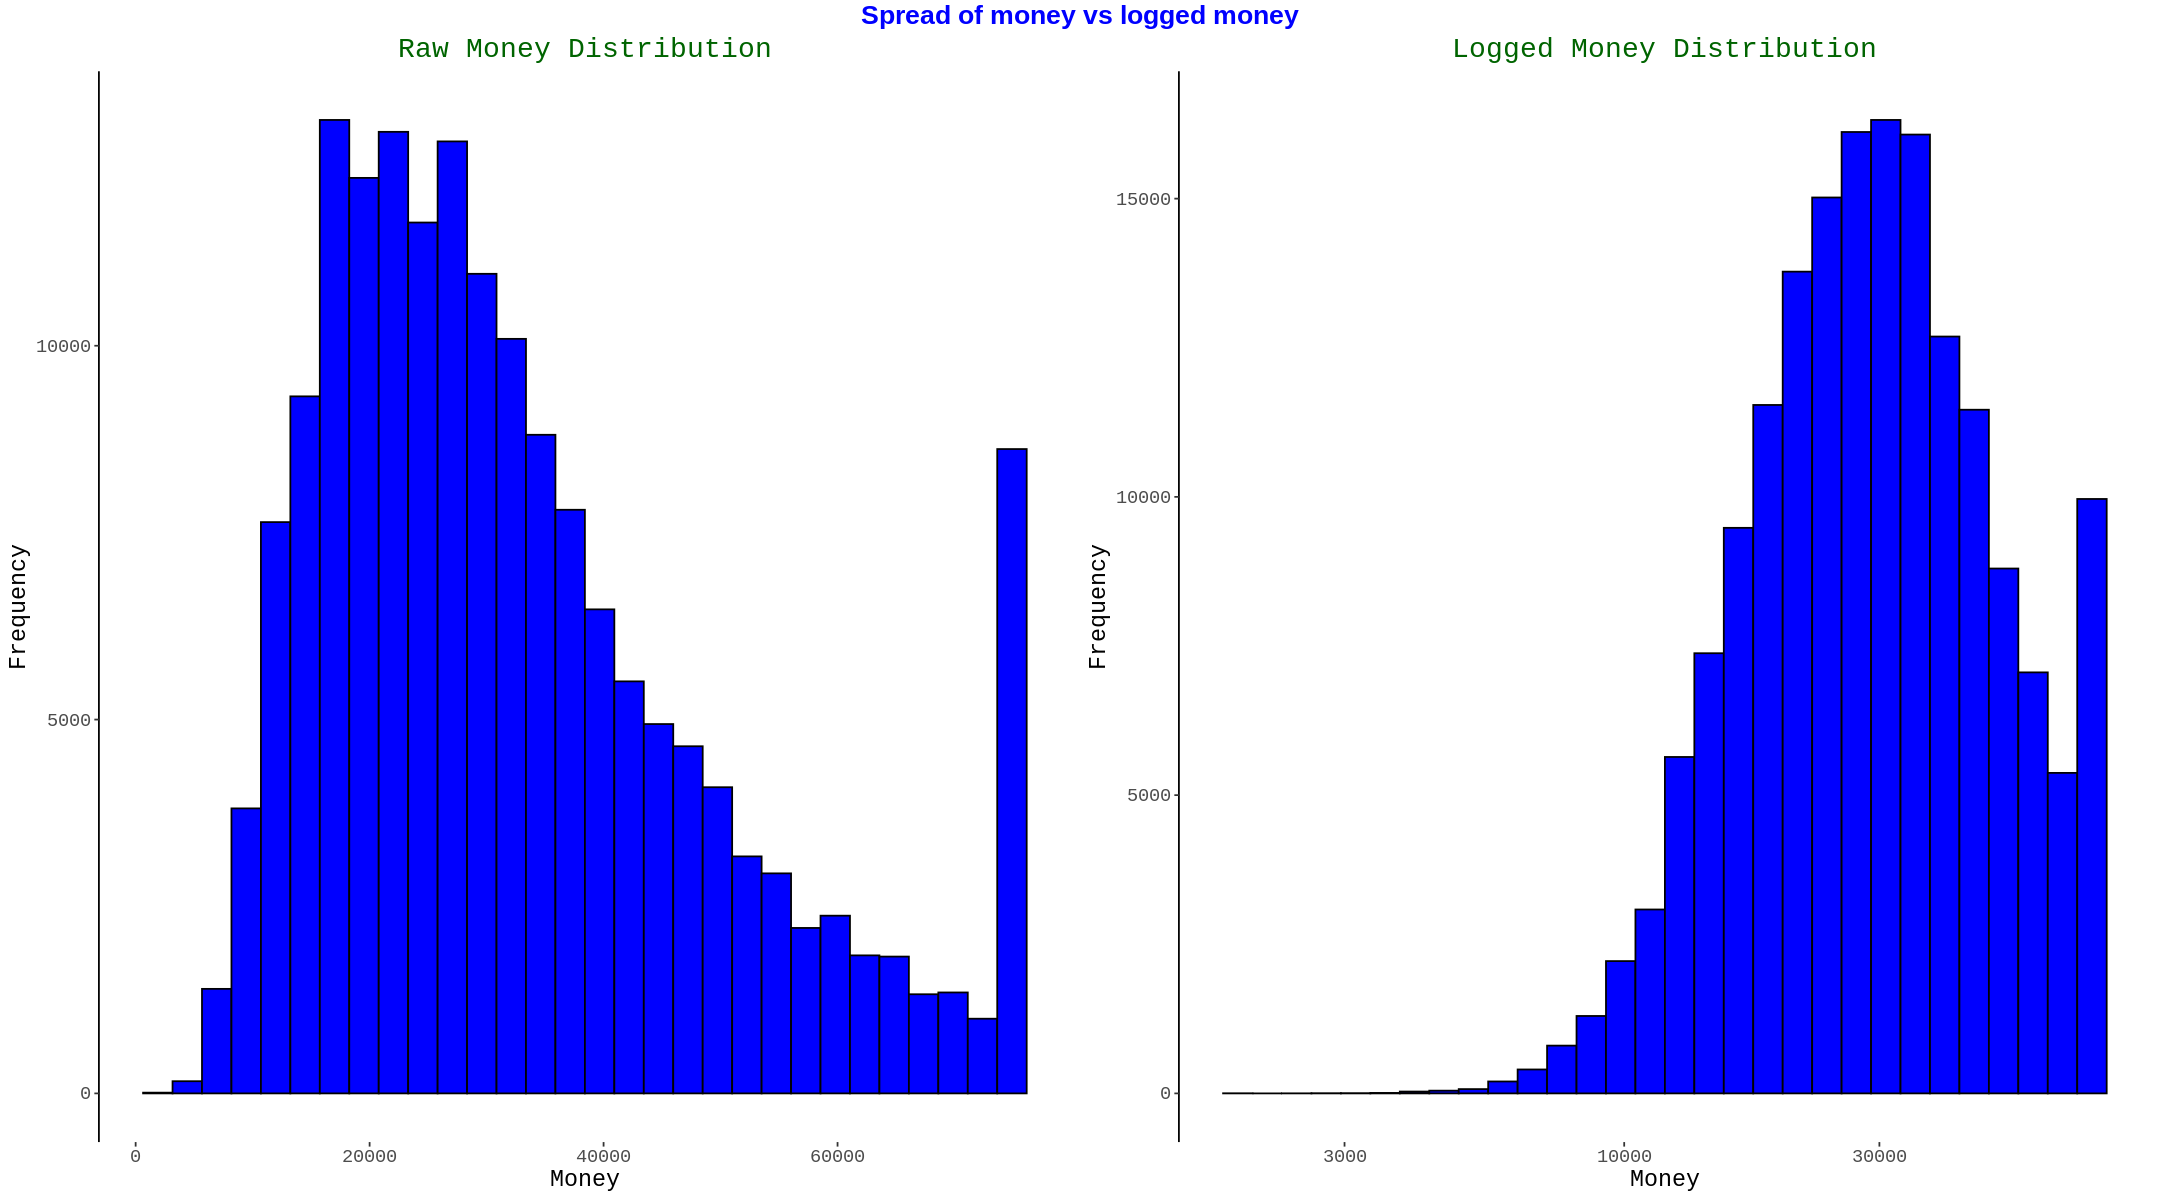

In [ ]:
options(repr.plot.width = 18, repr.plot.height = 10)

theme_nito = theme(plot.title = element_text(hjust = 0.5, color = "darkgreen"),
    text = element_text(family = "garamond", size = 14),
	  rect = element_blank(),
	  panel.grid = element_blank(),
	  axis.line = element_line(color = "black"))


money_charts = Car_df_merged %>%
  ggplot(aes(money)) + theme_nito +
  theme(axis.line.x = element_blank())

raw_money = money_charts +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  labs(title = "Raw Money Distribution",
     y = "Frequency",
     x = "Money")


logged_money = money_charts +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  scale_x_log10() +
  labs(title = "Logged Money Distribution",
     y = "Frequency",
     x = "Money")

grid.arrange(raw_money, logged_money, ncol = 2,
             top = textGrob("Spread of money vs logged money",
                            gp = gpar(fontsize = 16, col = "blue", fontface = "bold")))

## `Drivetrain` column

552 Nulls

In [ ]:
drive_nulls = Car_df_merged$Drivetrain %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", drive_nulls)

[1] "Nulls: 552"

In [ ]:
# Identifying unqiue vals
drivetrain_vals = Car_df_merged$Drivetrain %>% unique()
print(Car_df$Drivetrain %>% unique())

Car_df_merged$Drivetrain %>% table()

[1] "Fwd" "Awd" "Rwd" NA    "4Wd"


.
  4Wd   Awd   Fwd   Rwd 
38161 62143 53799 20533 

In [ ]:
mode_drive_train = mfv(Car_df_merged$Drivetrain)

# Filtering for not null
drivetrain_notnull = Car_df_merged$Drivetrain[] %>%
  na.omit() %>%
  unique()

# Mode imputation
Car_df_merged = Car_df_merged %>%
  mutate(Drivetrain = ifelse(!Drivetrain %in% drivetrain_notnull, mode_drive_train, Drivetrain))

Car_df_merged$Drivetrain %>% table()

.
  4Wd   Awd   Fwd   Rwd 
38161 62695 53799 20533 

## `Fuel type` column

In [ ]:
fuel_type_nulls = Car_df_merged$`Fuel type` %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", fuel_type_nulls)

[1] "Nulls: 1341"

In [ ]:
print("Unique Fuel Types before encoding:")
original_fuel_types = Car_df_merged$`Fuel type` %>%
  unique()

original_fuel_types %>% print()

Car_df_merged$`Fuel type` %>% table()

[1] "Unique Fuel Types before encoding:"
 [1] "Gasoline"                      "Hybrid"                       
 [3] NA                              "Gasoline/Mild Electric Hybrid"
 [5] "E85 Flex"                      "Xib"                          
 [7] "Diesel"                        "Plug-In Hybrid"               
 [9] "Gasolin"                       "Compressed Natural Gas"       
[11] "Plug-In Electric/Gas"          "Other"                        
[13] "Gas"                           "Unspecified"                  
[15] "Biodiesel"                     "Hydrogen"                     
[17] "Regular Unleaded"              "Premium Unleaded"             


.
                    Biodiesel        Compressed Natural Gas 
                            1                            12 
                       Diesel                      E85 Flex 
                         5599                          5155 
                          Gas                       Gasolin 
                            2                            10 
                     Gasoline Gasoline/Mild Electric Hybrid 
                       156202                           264 
                       Hybrid                      Hydrogen 
                         6505                             1 
                        Other          Plug-In Electric/Gas 
                            2                             1 
               Plug-In Hybrid              Premium Unleaded 
                            8                             7 
             Regular Unleaded                   Unspecified 
                            2                             4 
                      

In [ ]:
Car_df_merged = Car_df_merged %>%
  mutate(Fuel_type_encoded = case_when(
    `Fuel type` == "Diesel" ~ 1,
    `Fuel type` %in% c("Gasoline", "Gasolin") ~ 2,
    `Fuel type` == "E85 Flex" ~ 3,
    `Fuel type` == "Hybrid" ~ 4,
    !is.na(`Fuel type`) ~ 0,
    is.na(`Fuel type`) ~ NA_real_
  ))

print("Car_df_merged head with Fuel_type_encoded:")
Car_df_merged %>% select(`Fuel type`, Fuel_type_encoded) %>% head()

[1] "Car_df_merged head with Fuel_type_encoded:"


Fuel type Fuel_type_encoded
1 Gasoline  2                
2 Gasoline  2                
3 Gasoline  2                
4 Gasoline  2                
5 Gasoline  2                
6 Gasoline  2

In [ ]:
fuel_encode_unique = Car_df_merged$Fuel_type_encoded %>%
  unique() %>%
  sort()
cat("Unique values in Fuel_type_encoded after initial encoding: [",
    paste(fuel_encode_unique, collapse = ", "), "]")


na_count_encoded = Car_df_merged$Fuel_type_encoded %>%
  is.na() %>%
  sum()
sprintf("Number of NA values in Fuel_type_encoded: %d", na_count_encoded)

Unique values in Fuel_type_encoded after initial encoding: [ 0, 1, 2, 3, 4 ]

[1] "Number of NA values in Fuel_type_encoded: 1341"

In [ ]:
# Prepare data for kNN imputation:
# - Convert Fuel_type_encoded to factor for categorical imputation
# - Convert Drivetrain to factor as it's a categorical predictor
Car_df_for_imputation = Car_df_merged %>%
  mutate(
    Drivetrain = as.factor(Drivetrain),
    Fuel_type_encoded = as.factor(as.character(Fuel_type_encoded)) # Convert to character then factor to preserve integer levels
  ) %>%
  select(money, Mileage, Year, Drivetrain, Fuel_type_encoded)

set.seed(42)

# Perform kNN imputation. Only Fuel_type_encoded has NAs among selected columns.
imputed_data_full = knnImputation(Car_df_for_imputation, k = 5, meth = "median")

# Update the original Car_df_merged with the imputed values
Car_df_merged$Fuel_type_encoded = as.numeric(as.character(imputed_data_full$Fuel_type_encoded))


na_count_after_imputation = Car_df_merged$Fuel_type_encoded %>%
  is.na() %>%
  sum()
sprintf("Number of NA values in Fuel_type_encoded after KNN imputation: %d", na_count_after_imputation)

unique_fuel_after_imputation = Car_df_merged$Fuel_type_encoded %>%
  unique() %>%
  sort()
cat("Unique values in Fuel_type_encoded after KNN imputation: [",
    paste(unique_fuel_after_imputation, collapse = ", "), "]")


[1] "Number of NA values in Fuel_type_encoded after KNN imputation: 0"

Unique values in Fuel_type_encoded after KNN imputation: [ 0, 1, 2, 3, 4 ]

In [ ]:
# Decode the numerical values back to descriptive string labels
Car_df_merged = Car_df_merged %>%
  mutate(Fuel_type_decoded = case_when(
    Fuel_type_encoded == 0 ~ "Other",
    Fuel_type_encoded == 1 ~ "Diesel",
    Fuel_type_encoded == 2 ~ "Gasoline",
    Fuel_type_encoded == 3 ~ "E85 Flex",
    Fuel_type_encoded == 4 ~ "Hybrid",
  ))

print("Car_df_merged head with Fuel_type_decoded:")
Car_df_merged %>% select(`Fuel type`, Fuel_type_encoded, Fuel_type_decoded) %>% head()

[1] "Car_df_merged head with Fuel_type_decoded:"


Fuel type Fuel_type_encoded Fuel_type_decoded
1 Gasoline  2                 Gasoline         
2 Gasoline  2                 Gasoline         
3 Gasoline  2                 Gasoline         
4 Gasoline  2                 Gasoline         
5 Gasoline  2                 Gasoline         
6 Gasoline  2                 Gasoline

In [ ]:
print("Frequency table for Fuel_type_decoded:")
Car_df_merged$Fuel_type_decoded %>% table()

[1] "Frequency table for Fuel_type_decoded:"


.
  Diesel E85 Flex Gasoline   Hybrid    Other 
    5607     5173   157520     6512      376 

In [ ]:
Car_df_merged = Car_df_merged %>%
  select(-Fuel_type_encoded, -`Fuel type`) %>%
  rename(Fuel_type = Fuel_type_decoded)

# Verify that the column has been removed
print("Columns in Car_df_merged after removing Fuel_type_encoded:")
Car_df_merged %>%
  colnames() %>%
  print()

[1] "Columns in Car_df_merged after removing Fuel_type_encoded:"
 [1] "new&used"            "money"               "Drivetrain"         
 [4] "MPG"                 "Transmission"        "Engine"             
 [7] "Mileage"             "Accidents or damage" "Clean title"        
[10] "1-owner vehicle"     "Personal use only"   "brand"              
[13] "Year"                "Model"               "currency"           
[16] "Primary_Model"       "name"                "Num_of_reviews"     
[19] "General_rate"        "Comfort"             "Interior design"    
[22] "Performance"         "Value for the money" "Exterior styling"   
[25] "Reliability"         "Fuel_type"          


## `Transmission` column

755 nulls

In [ ]:
trans_nulls = Car_df_merged$Transmission %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", trans_nulls)

[1] "Nulls: 755"

In [ ]:
print("Unique Transmission Types before encoding:")
Car_df_merged$Transmission %>%
  unique()

[1] "Unique Transmission Types before encoding:"


[1] "Automatic Cvt"                                                   
  [2] "10-Speed Automatic"                                              
  [3] "6-Speed Manual"                                                  
  [4] "Automatic"                                                       
  [5] "Variable"                                                        
  [6] "10-Speed A/T"                                                    
  [7] "10 Speed Automatic"                                              
  [8] "6-Speed M/T"                                                     
  [9] "Continuously Variable"                                           
 [10] "Manual"                                                          
 [11] "8-Speed Automatic With Auto-Shift"                               
 [12] "9-Speed Automatic With Auto-Shift"                               
 [13] "8-Speed Dual-Clutch"                                             
 [14] "8-Speed Automatic"                                               
 [15] "7-Speed Automatic With Auto-Shift"                               
 [16] "9-Speed Automatic"                                               
 [17] "9-Speed A/T"                                                     
 [18] "8-Speed A/T"                                                     
 [19] "9 Speed Automatic"                                               
 [20] "9 Speed Dual Clutch"                                             
 [21] "8 Speed Dual Clutch"                                             
 [22] "6-Speed Automatic"                                               
 [23] "6 Speed Automatic"                                               
 [24] "9 Speed Automatic W/Paddle Shifters"                             
 [25] "9-Speed"                                                         
 [26] "9-Speed Shiftable Automatic"                                     
 [27] "6-Speed A/T"                                                     
 [28] "Auto, 6-Spd Seq Sptshft"                                         
 [29] "7-Speed Dct Automatic"                                           
 [30] "8-Speed"                                                         
 [31] "Other"                                                           
 [32] "Auto, 9-Spd Seq Sptshft"                                         
 [33] "Automatic 9-Speed"                                               
 [34] "5-Speed Automatic"                                               
 [35] "Auto, 6-Spd Sportshift"                                          
 [36] "Automatic 5-Speed"                                               
 [37] "Auto, 6-Spd W/Sptshft"                                           
 [38] "5-Speed A/T"                                                     
 [39] "5-Speed Automatic With Sequential Sportshift"                    
 [40] "6-Speed Shiftable Automatic"                                     
 [41] "Automatic With Tiptronic"                                        
 [42] "7-Speed Automatic"                                               
 [43] "1-Speed Automatic"                                               
 [44] "7-Speed Automatic S Tronic"                                      
 [45] "7-Speed A/T"                                                     
 [46] "8-Speed Automatic With Tiptronic"                                
 [47] "8 Speed Automatic W/Tiptronic"                                   
 [48] "7 Speed S Tronic Dual Clutch Auto"                               
 [49] "8-Speed Shiftable Automatic"                                     
 [50] "8 Speed Automatic Tiptronic"                                     
 [51] "8 Speed Tiptronic Automatic"                                     
 [52] "7 Spd S Tronic Dual Clutch Automatic"                            
 [53] "7 Speed S Tronic Automatic"                                      
 [54] "7-Speed Double Clutch"                                           
 [55] "6-Speed Automatic With Auto-Shift"                   

In [ ]:
Car_df_merged = Car_df_merged %>%
  mutate(Transmission_encoded_temp = case_when(
    str_detect(str_to_lower(Transmission), "manual") ~ 1,
    str_detect(str_to_lower(Transmission), "automatic|auto|autostick|tiptronic|pdk|dct|geartronic|sportmatic|shiftronic") ~ 2,
    str_detect(str_to_lower(Transmission), "variable|cvt|xtronic|lineartronic|ivt|ecvt") ~ 3,
    !is.na(Transmission) ~ 0, # Map other non-NA strings to 0
    is.na(Transmission) ~ NA_real_
  ))

print("Car_df_merged head with Transmission_encoded_temp:")
Car_df_merged %>%
  select(Transmission, Transmission_encoded_temp) %>%
  head()

[1] "Car_df_merged head with Transmission_encoded_temp:"


Transmission       Transmission_encoded_temp
1 Automatic Cvt      2                        
2 10-Speed Automatic 2                        
3 6-Speed Manual     1                        
4 10-Speed Automatic 2                        
5 10-Speed Automatic 2                        
6 10-Speed Automatic 2

In [ ]:
Car_df_merged = Car_df_merged %>%
  mutate(Transmission_for_imputation = ifelse(
    Transmission_encoded_temp == 0 | is.na(Transmission_encoded_temp),
    NA_real_,
    Transmission_encoded_temp
  ))

Car_df_merged %>%
  select(Transmission, Transmission_encoded_temp, Transmission_for_imputation) %>%
  head()

print("Unique values in Transmission_for_imputation:")
Car_df_merged$Transmission_for_imputation %>%
  unique() %>%
  sort()

na_count_imputation = Car_df_merged$Transmission_for_imputation %>%
  is.na() %>%
  sum()
sprintf("Number of NA values in Transmission_for_imputation: %d", na_count_imputation)

Transmission       Transmission_encoded_temp Transmission_for_imputation
1 Automatic Cvt      2                         2                          
2 10-Speed Automatic 2                         2                          
3 6-Speed Manual     1                         1                          
4 10-Speed Automatic 2                         2                          
5 10-Speed Automatic 2                         2                          
6 10-Speed Automatic 2                         2

[1] "Unique values in Transmission_for_imputation:"


[1] 1 2 3

[1] "Number of NA values in Transmission_for_imputation: 7476"

In [ ]:
Car_df_for_transmission_imputation = Car_df_merged %>%
  mutate(
    Drivetrain = as.factor(Drivetrain),
    Fuel_type = as.factor(Fuel_type),
    Transmission_for_imputation = as.factor(as.character(Transmission_for_imputation))
  ) %>%
  select(money, Mileage, Year, Drivetrain, Fuel_type, Transmission_for_imputation)

set.seed(42)

imputed_transmission_data = knnImputation(Car_df_for_transmission_imputation, k = 5, meth = "median")

Car_df_merged$Transmission_imputed = as.numeric(as.character(imputed_transmission_data$Transmission_for_imputation))

na_count_after_imputation = Car_df_merged$Transmission_imputed %>%
  is.na() %>%
  sum()
sprintf("Number of NA values in Transmission_imputed after KNN imputation: %d", na_count_after_imputation)

unique_transmission_after_imputation = Car_df_merged$Transmission_imputed %>%
  unique() %>%
  sort()
cat("Unique values in Transmission_imputed after KNN imputation: [",
    paste(unique_transmission_after_imputation, collapse = ", "), "]")

[1] "Number of NA values in Transmission_imputed after KNN imputation: 0"

Unique values in Transmission_imputed after KNN imputation: [ 1, 2, 3 ]

In [ ]:
Car_df_merged = Car_df_merged %>%
  mutate(Transmission_decoded = case_when(
    Transmission_imputed == 1 ~ "Manual",
    Transmission_imputed == 2 ~ "Automatic",
    Transmission_imputed == 3 ~ "Variable",
  ))

print("Car_df_merged head with Transmission_imputed and Transmission_decoded:")
Car_df_merged %>%
  select(Transmission_imputed, Transmission_decoded) %>%
  head()

[1] "Car_df_merged head with Transmission_imputed and Transmission_decoded:"


Transmission_imputed Transmission_decoded
1 2                    Automatic           
2 2                    Automatic           
3 1                    Manual              
4 2                    Automatic           
5 2                    Automatic           
6 2                    Automatic

In [ ]:
Car_df_merged = Car_df_merged %>%
  select(-Transmission, -Transmission_encoded_temp, -Transmission_for_imputation, -Transmission_imputed) %>%
  rename(Transmission = Transmission_decoded)

print("Columns in Car_df_merged after updating Transmission and removing intermediate columns:")
Car_df_merged %>%
  colnames() %>%
  print()

print("Frequency table for the updated Transmission column:")
Car_df_merged$Transmission %>%
  table()

[1] "Columns in Car_df_merged after updating Transmission and removing intermediate columns:"
 [1] "new&used"            "money"               "Drivetrain"         
 [4] "MPG"                 "Engine"              "Mileage"            
 [7] "Accidents or damage" "Clean title"         "1-owner vehicle"    
[10] "Personal use only"   "brand"               "Year"               
[13] "Model"               "currency"            "Primary_Model"      
[16] "name"                "Num_of_reviews"      "General_rate"       
[19] "Comfort"             "Interior design"     "Performance"        
[22] "Value for the money" "Exterior styling"    "Reliability"        
[25] "Fuel_type"           "Transmission"       
[1] "Frequency table for the updated Transmission column:"


.
Automatic    Manual  Variable 
   168605      4429      2154 

## `Engine` column

330 nulls

In [ ]:
engine_nulls = Car_df_merged$Engine %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", engine_nulls)

[1] "Nulls: 330"

In [ ]:
print("Unique values in the 'Engine' column:")
Car_df$Engine %>% unique() %>% print()

[1] "Unique values in the 'Engine' column:"
   [1] "1.5L I4 16V Gdi Dohc Turbo"                                                                                                                               
   [2] "3.5L V6 24V Gdi Sohc"                                                                                                                                     
   [3] "2.0L I4 16V Gdi Dohc Turbo"                                                                                                                               
   [4] "3.0L V6 24V Gdi Dohc Turbo"                                                                                                                               
   [5] "Intercooled Turbo Premium Unleaded I-4 1.5 L/91"                                                                                                          
   [6] "Intercooled Turbo Premium Unleaded V-6 3.0 L/183"                                                                                    

In [ ]:
Car_df_merged = Car_df_merged %>%
  filter(!is.na(Engine))

engine_nulls_after = Car_df_merged$Engine %>%
  is.na() %>%
  sum()

sprintf("Nulls in Engine column after removal: %d", engine_nulls_after)

[1] "Nulls in Engine column after removal: 0"

In [ ]:
Car_df_merged = Car_df_merged %>%
  mutate(
    # Refine regex to capture Engine Size (e.g., 1.5L, 3.5L, 2.0 Liter)
    Engine_Size = as.numeric(str_extract(`Engine`, "\\d+\\.\\d+(?=\\s*(L|Liter))|\\d+(?=\\s*(L|Liter))")),
    # Extract Cylinder Configuration (e.g., I4, V6, H6, 4-Cylinder)
    Cylinder_Configuration = case_when(
      str_detect(`Engine`, "(?i)I-?3|3.?Cylinder") ~ "I3",
      str_detect(`Engine`, "(?i)I-?4|4.?Cylinder") ~ "I4",
      str_detect(`Engine`, "(?i)I-?5|5.?Cylinder") ~ "I5",
      str_detect(`Engine`, "(?i)I-?6|6.?Cylinder") ~ "I6",
      str_detect(`Engine`, "(?i)V-?6") ~ "V6",
      str_detect(`Engine`, "(?i)V-?8") ~ "V8",
      str_detect(`Engine`, "(?i)V-?10") ~ "V10",
      str_detect(`Engine`, "(?i)V-?12") ~ "V12",
      str_detect(`Engine`, "(?i)H-?4|Flat.?4") ~ "H4",
      str_detect(`Engine`, "(?i)H-?6|Flat.?6") ~ "H6",
      TRUE ~ "Other/Unknown"
    )
  )

# Count missing values for new columns
print("Missing values in new columns:")
Car_df_merged %>%
  summarise(
    NA_Engine_Size = sum(is.na(Engine_Size)),
    NA_Cylinder_Configuration = sum(is.na(Cylinder_Configuration))
  ) %>% print()

[1] "Missing values in new columns:"
# A tibble: 1 × 2
  NA_Engine_Size NA_Cylinder_Configuration
           <int>                     <int>
1          15620                         0


In [ ]:
Car_df_merged = Car_df_merged %>%
  mutate(
    Has_Turbo = ifelse(str_detect(str_to_lower(Engine), "turbo|twin turbo"), 1, 0),
    Has_GDI = ifelse(str_detect(str_to_lower(Engine), "gdi|direct injection|pdi"), 1, 0),
    Has_DOHC = ifelse(str_detect(str_to_lower(Engine), "dohc"), 1, 0),
    Has_Supercharged = ifelse(str_detect(str_to_lower(Engine), "supercharged"), 1, 0)
  )

# Display the first few rows with the new columns
print("Car_df_merged head with extracted engine technology indicators:")
Car_df_merged %>%
  select(Engine, Engine_Size, Cylinder_Configuration, Has_Turbo, Has_GDI, Has_DOHC, Has_Supercharged) %>%
  head()

# Count missing values for new columns
print("Missing values in new technology columns:")
Car_df_merged %>%
  summarise(
    NA_Has_Turbo = sum(is.na(Has_Turbo)),
    NA_Has_GDI = sum(is.na(Has_GDI)),
    NA_Has_DOHC = sum(is.na(Has_DOHC)),
    NA_Has_Supercharged = sum(is.na(Has_Supercharged))
  ) %>%
  print()


[1] "Car_df_merged head with extracted engine technology indicators:"


Engine                     Engine_Size Cylinder_Configuration Has_Turbo
1 1.5L I4 16V Gdi Dohc Turbo 1.5         I4                     1        
2 3.5L V6 24V Gdi Sohc       3.5         V6                     0        
3 1.5L I4 16V Gdi Dohc Turbo 1.5         I4                     1        
4 2.0L I4 16V Gdi Dohc Turbo 2.0         I4                     1        
5 2.0L I4 16V Gdi Dohc Turbo 2.0         I4                     1        
6 3.5L V6 24V Gdi Sohc       3.5         V6                     0        
  Has_GDI Has_DOHC Has_Supercharged
1 1       1        0               
2 1       0        0               
3 1       1        0               
4 1       1        0               
5 1       1        0               
6 1       0        0

[1] "Missing values in new technology columns:"
# A tibble: 1 × 4
  NA_Has_Turbo NA_Has_GDI NA_Has_DOHC NA_Has_Supercharged
         <int>      <int>       <int>               <int>
1            0          0           0                   0


In [ ]:
Car_df_for_engine_imputation = Car_df_merged %>%
  mutate(
    Drivetrain = as.factor(Drivetrain),
    Fuel_type = as.factor(Fuel_type),
    Transmission = as.factor(Transmission),
    Cylinder_Configuration = as.factor(Cylinder_Configuration)
  ) %>%
  select(money, Mileage, Year, Engine_Size, Drivetrain, Fuel_type, Transmission, Cylinder_Configuration)

print("Structure of Car_df_for_engine_imputation:")
Car_df_for_engine_imputation %>% str()

n_nulls_engine_size = Car_df_for_engine_imputation %>%
  filter(is.na(Engine_Size)) %>%
  count() %>%
  pull(n)
sprintf("Row count of NA in Engine_Size: %d", n_nulls_engine_size)


[1] "Structure of Car_df_for_engine_imputation:"
tibble [174,858 × 8] (S3: tbl_df/tbl/data.frame)
 $ money                 : num [1:174858] 33095 61745 38095 47995 47995 ...
 $ Mileage               : num [1:174858] 5 0 5 11 2 4 19 2 2 20 ...
 $ Year                  : num [1:174858] 2023 2023 2023 2023 2023 ...
 $ Engine_Size           : num [1:174858] 1.5 3.5 1.5 2 2 3.5 3.5 1.5 2 3.5 ...
 $ Drivetrain            : Factor w/ 4 levels "4Wd","Awd","Fwd",..: 3 2 3 3 3 2 2 3 3 2 ...
 $ Fuel_type             : Factor w/ 5 levels "Diesel","E85 Flex",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Transmission          : Factor w/ 3 levels "Automatic","Manual",..: 1 1 2 1 1 1 1 2 1 1 ...
 $ Cylinder_Configuration: Factor w/ 11 levels "H4","H6","I3",..: 4 10 4 4 4 10 10 4 4 10 ...


[1] "Row count of NA in Engine_Size: 15620"

In [ ]:
set.seed(42)
imputed_engine_data = knnImputation(Car_df_for_engine_imputation, k = 5, meth = "median")

# Update the original Car_df_merged with the imputed values
Car_df_merged$Engine_Size = imputed_engine_data$Engine_Size

na_count_after_imputation = Car_df_merged$Engine_Size %>% is.na() %>% sum()
sprintf("Number of NA values in Engine_Size after KNN imputation: %d", na_count_after_imputation)

print("Car_df_merged head with imputed Engine_Size:")
Car_df_merged %>% select(Engine_Size, Cylinder_Configuration) %>% head()

[1] "Number of NA values in Engine_Size after KNN imputation: 0"

[1] "Car_df_merged head with imputed Engine_Size:"


Engine_Size Cylinder_Configuration
1 1.5         I4                    
2 3.5         V6                    
3 1.5         I4                    
4 2.0         I4                    
5 2.0         I4                    
6 3.5         V6

In [ ]:
Car_df_merged = Car_df_merged %>% select(-Engine)

print("Columns in Car_df_merged after removing the 'Engine' column:")
Car_df_merged %>%
  colnames() %>%
  print()

[1] "Columns in Car_df_merged after removing the 'Engine' column:"
 [1] "new&used"               "money"                  "Drivetrain"            
 [4] "MPG"                    "Mileage"                "Accidents or damage"   
 [7] "Clean title"            "1-owner vehicle"        "Personal use only"     
[10] "brand"                  "Year"                   "Model"                 
[13] "currency"               "Primary_Model"          "name"                  
[16] "Num_of_reviews"         "General_rate"           "Comfort"               
[19] "Interior design"        "Performance"            "Value for the money"   
[22] "Exterior styling"       "Reliability"            "Fuel_type"             
[25] "Transmission"           "Engine_Size"            "Cylinder_Configuration"
[28] "Has_Turbo"              "Has_GDI"                "Has_DOHC"              
[31] "Has_Supercharged"      


## `Accidents or damage` column

52164 nulls

In [ ]:
accidents_null = Car_df_merged$`Accidents or damage` %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", accidents_null)

[1] "Nulls: 52164"

In [ ]:
Car_df_merged$`Accidents or damage` %>% table()

.
At Least 1 Accident Or Damage Reported                          None Reported 
                                 32658                                  90036 

In [ ]:
# Encoding accidents as 1, the rest 0
Car_df_merged = Car_df_merged %>%
  mutate(`Accidents or damage` = as.integer(ifelse(`Accidents or damage` == "None Reported" | is.na(`Accidents or damage`) , 0, 1)))

print("After encoding and handling missing values:")
Car_df_merged$`Accidents or damage` %>% table()

[1] "After encoding and handling missing values:"


.
     0      1 
142200  32658 

## `Clean Title`

157340 nulls god damn

In [ ]:
clean_null = Car_df_merged$`Clean title` %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", clean_null)

[1] "Nulls: 156751"

In [ ]:
Car_df$`Clean title` %>% table()

.
   No   Yes 
  294 17856 

In [ ]:
# Encoding clean title as 1, the rest 0
Car_df_merged = Car_df_merged %>%
  mutate(`Clean title` = as.integer(ifelse(`Clean title` == "No" | is.na(`Clean title`) , 0, 1)))

print("After encoding and handling missing values:")
Car_df_merged$`Clean title` %>% table()

[1] "After encoding and handling missing values:"


.
     0      1 
157044  17814 

## `1-owner vechile` column

52799 nulls

In [ ]:
owner_null = Car_df_merged$`1-owner vehicle` %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", owner_null)

[1] "Nulls: 52386"

In [ ]:
Car_df_merged$`1-owner vehicle` %>% table()

.
   No   Yes 
61003 61469 

In [ ]:
# Encoding 1-owner as 1, the rest 0
Car_df_merged = Car_df_merged %>%
  mutate(`1-owner vehicle` = as.integer(ifelse(`1-owner vehicle` == "No" | is.na(`1-owner vehicle`) , 0, 1)))

print("After encoding and handling missing values:")
Car_df_merged$`1-owner vehicle` %>% table()

[1] "After encoding and handling missing values:"


.
     0      1 
113389  61469 

## `Personal use only` column

52575 nulls

In [ ]:
personal_null = Car_df_merged$`Personal use only` %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", personal_null)

[1] "Nulls: 52165"

In [ ]:
Car_df_merged$`Personal use only` %>% table()

.
   No   Yes 
39313 83380 

In [ ]:
# Encoding personal use as 1, the rest 0
Car_df_merged = Car_df_merged %>%
  mutate(`Personal use only` = as.integer(ifelse(`Personal use only` == "No" | is.na(`Personal use only`) , 0, 1)))

print("After encoding and handling missing values:")
Car_df_merged$`Personal use only` %>% table()

[1] "After encoding and handling missing values:"


.
    0     1 
91478 83380 

## `Model` column

The focus for this column is to match it with rates dataset to join them later

In [ ]:
model_nulls = Car_df_merged$Model %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", model_nulls)

[1] "Nulls: 0"

## `Mileage` column

In [ ]:
mileage_nulls = Car_df_merged$Mileage %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", mileage_nulls)

[1] "Nulls: 47"

In [ ]:
# Calculate the mean of the non-missing Mileage values
mean_mileage = Car_df_merged$Mileage %>%
  na.omit() %>% # Remove NAs to calculate mean
  mean()

sprintf("Mean Mileage: %.2f", mean_mileage)

# Impute NA values in 'Mileage' with the calculated mean
Car_df_merged = Car_df_merged %>%
  mutate(Mileage = ifelse(is.na(Mileage), mean_mileage, Mileage))

# Verify that there are no more nulls in the 'Mileage' column
mileage_nulls_after_imputation = Car_df_merged$Mileage %>%
  is.na() %>%
  sum()
sprintf("Nulls in Mileage after imputation: %d", mileage_nulls_after_imputation)

[1] "Mean Mileage: 51323.99"

[1] "Nulls in Mileage after imputation: 0"

## `MPG` column

In [ ]:
Car_df_merged$MPG %>%
  is.na() %>%
  sum()

[1] 31654

In [ ]:
Car_df_merged$MPG %>%
  unique()

[1] "30–37" "19–25" "26–36" "22–30" "22–27" "19–24" "21–29" "21–26" "17–21"
 [10] NA      "29–36" "22–31" "22–28" "19–26" "21–27" "24–34" "21"    "21–22"
 [19] "24–0"  "28–29" "20–27" "23–32" "26–27" "23–33" "20–31" "20–30" "20–29"
 [28] "23"    "22–0"  "20–32" "19–27" "25–35" "18–26" "20–28" "21–30" "26"   
 [37] "21–31" "21–34" "24–35" "19–0"  "19–28" "25–36" "21–0"  "18–0"  "18–27"
 [46] "20–0"  "16–21" "39–38" "35–35" "16–23" "17–22" "16–0"  "24–32" "18–22"
 [55] "22–29" "18–25" "15–23" "24–33" "21–28" "28–38" "23–29" "18–23" "23–31"
 [64] "0–0"   "24–31" "18–28" "23–30" "23–28" "14–23" "26–34" "20–25" "0–28" 
 [73] "13–19" "29–38" "28–36" "15–21" "15–22" "76–78" "100–8" "20–26" "18–24"
 [82] "25–34" "24–30" "19–23" "17–26" "78–77" "0–24"  "13–22" "13–20" "27–36"
 [91] "19–29" "13–0"  "27–35" "23–34" "26–35" "27–34" "17–0"  "14–22" "23–27"
[100] "16–26" "16–24" "27–37" "14–24" "14–25" "25–33" "22–22" "16–31" "15–24"
[109] "15–25" "18–29" "17–27" "17–24" "22–32" "12–29" "24"    "32–32" "25–38"
[118] "23–0"  "28–28" "16–22" "31–43" "24–38" "30–30" "16–27" "24–36" "31–0" 
[127] "11–32" "20–33" "13–21" "15–26" "17–28" "16–28" "30–42" "14–20" "20–20"
[136] "27–27" "17–25" "12–19" "25–31" "21–25" "25–32" "15–20" "13–18" "14–19"
[145] "25–29" "17–23" "24–29" "14–0"  "21–32" "16–25" "30–40" "29–29" "23–35"
[154] "21–33" "22–34" "22–33" "32–42" "0–0.0" "55–57" "72–72" "23–36" "107–1"
[163] "26–37" "26–38" "32–45" "14–21" "13–17" "12–17" "34–34" "15–19" "29–31"
[172] "26–29" "29–32" "0–26"  "0–25"  "28–31" "30–32" "25–30" "26–30" "26–26"
[181] "19–30" "25–0"  "15–0"  "28–34" "26–32" "25–28" "14–18" "18–30" "0–23" 
[190] "18–33" "31–31" "24–24" "23–23" "20–23" "29–33" "16–20" "16–18" "19–22"
[199] "18–21" "29–35" "21–23" "22–26" "26–31" "15–14" "17–20" "43370" "14–17"
[208] "25"    "16–19" "15–18" "0–22"  "53830" "64865" "30–38" "15–27" "16"   
[217] "19–19" "0"     "49–43" "22"    "24–26" "29–40" "15–15" "29–39" "27–40"
[226] "19–31" "43–42" "28–37" "28–39" "11–17" "11–16" "30–0"  "31–47" "20–24"
[235] "17–29" "47–46" "13–23" "31–41" "29–41" "22–35" "30–41" "12–15" "30–39"
[244] "27–46" "35–40" "16–29" "38–38" "26–0"  "15–16" "26–39" "46–46" "31–39"
[253] "28–42" "35–93" "32–38" "10–15" "25–37" "28–0"  "35–50" "22–24" "12–28"
[262] "13–27" "19–32" "13–29" "12–7"  "12–31" "36–36" "12–32" "12–0"  "11–29"
[271] "12–21" "13–25" "12–30" "17–11" "13–10" "25–25" "28–41" "10–36" "18–31"
[280] "27–39" "13–24" "19–21" "17–17" "20–18" "18–17" "17–18" "18–18" "40–33"
[289] "20–21" "23–22" "20–19" "12–18" "16–17" "23–26" "24–27" "17–19" "24–28"
[298] "20"    "18–20" "44–37" "27–29" "20–22" "53825" "24–22" "27–33" "43–41"
[307] "43–37" "0–27"  "42–38" "26–40" "26–33" "44–41" "42–37" "0–29"  "0–255"
[316] "40–36" "0–40"  "13–16" "11–15" "19"    "40–81" "11–0"  "12–16" "14–16"
[325] "10–14" "27–38" "14–27" "30–27" "41–36" "11–14" "34–31" "14–14" "22–23"
[334] "35925" "15–11" "26–28" "21–21" "31–38" "40–34" "43–36" "29–37" "27–32"
[343] "46–41" "51–44" "33–42" "48–47" "40–35" "51–45" "55–49" "31–40" "27–31"
[352] "29–42" "0–34"  "48–48" "29–0"  "33–40" "31–36" "30–36" "48–0"  "47–47"
[361] "32–0"  "28–40" "40–40" "49–47" "32–37" "0–31"  "31–42" "28–35" "33–41"
[370] "27–0"  "0–41"  "50–45" "33–0"  "36–39" "44–47" "41–44" "44–44" "39–39"
[379] "41–0"  "31–37" "50–54" "45–51" "49–52" "22–25" "37–36" "33–30" "30–35"
[388] "28–33" "33–43" "54–57" "36–31" "58–60" "0–33"  "53–56" "30–33" "28–32"
[397] "54–56" "55–54" "30–34" "12–26" "39–44" "57–59" "40–46" "32–40" "0–32" 
[406] "38–43" "39–45" "40–44" "39–43" "38–41" "36–40" "0–30"  "24–40" "34–39"
[415] "37–37" "80–72" "21–24" "12–24" "18–19" "15–12" "13–9"  "11–20" "18–13"
[424] "11–28" "11–27" "10–31" "17"    "53–45" "46–40" "51–46" "36–33" "23–25"
[433] "39–35" "53–48" "29–34" "29"    "51–49" "37"    "39–46" "52–49" "30"   
[442] "35–39" "24–0." "0–19"  "41–37" "27–28" "29–28" "41–38" "31–28" "43–44"
[451] "43–45" "43–0"  "40–39" "43–40" "30–28" "32–28" "18"    "35–34" "42–39"
[460] "41–39" "38–37" "2

In [ ]:
Car_df_merged = Car_df_merged %>%
  mutate(MPG_cleaned = case_when(
    str_detect(MPG, "\\d+[-–-]\\d+") ~ (
      as.numeric(str_extract(MPG, "\\d+(?=[-–-])")) +
      as.numeric(str_extract(MPG, "(?<=[-–-])\\d+"))
    ) / 2,
    # Handles single numerical values (e.g., '30')
    str_detect(MPG, "^\\d+$") ~ as.numeric(MPG),
    TRUE ~ NA_real_
  ))

# Handle potential outliers that are parsed as very large numbers
# A common upper limit for MPG is around 100-150 for non-electric cars, marking anything above this as NA
Car_df_merged = Car_df_merged %>%
  mutate(MPG_cleaned = ifelse(MPG_cleaned > 150, NA_real_, MPG_cleaned))

print("Summary of MPG_cleaned after initial extraction and outlier handling:")
Car_df_merged$MPG_cleaned %>% summary()

na_count_mpg_cleaned = Car_df_merged$MPG_cleaned %>% is.na() %>% sum()
sprintf("Number of NA values in MPG_cleaned after initial cleaning: %d", na_count_mpg_cleaned)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `MPG_cleaned = case_when(...)`.
Caused by warning:
! NAs introduced by coercion”


[1] "Summary of MPG_cleaned after initial extraction and outlier handling:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   21.00   23.50   24.36   27.50  127.50   31662 

[1] "Number of NA values in MPG_cleaned after initial cleaning: 31662"

In [ ]:
median_mpg = Car_df_merged$MPG_cleaned %>%
  na.omit() %>%
  median()

sprintf("Median MPG for imputation: %.2f", median_mpg)

Car_df_merged = Car_df_merged %>%
  mutate(MPG_cleaned = ifelse(is.na(MPG_cleaned), median_mpg, MPG_cleaned))

na_count_after_imputation = Car_df_merged$MPG_cleaned %>% is.na() %>% sum()
sprintf("Number of NA values in MPG_cleaned after imputation: %d", na_count_after_imputation)

print("Summary of MPG_cleaned after imputation:")
Car_df_merged$MPG_cleaned %>% summary()

[1] "Median MPG for imputation: 23.50"

[1] "Number of NA values in MPG_cleaned after imputation: 0"

[1] "Summary of MPG_cleaned after imputation:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    21.5    23.5    24.2    26.5   127.5 

In [ ]:
Car_df_merged = Car_df_merged %>%
  select(-MPG) %>%
  rename(MPG = MPG_cleaned)

print("First few rows of Car_df_merged with finalized MPG column:")
Car_df_merged %>% select(MPG) %>% head()

print("Columns in Car_df_merged after finalizing MPG:")
Car_df_merged %>% colnames()

[1] "First few rows of Car_df_merged with finalized MPG column:"


MPG 
1 33.5
2 22.0
3 31.0
4 26.0
5 26.0
6 22.0

[1] "Columns in Car_df_merged after finalizing MPG:"


[1] "new&used"               "money"                  "Drivetrain"            
 [4] "Mileage"                "Accidents or damage"    "Clean title"           
 [7] "1-owner vehicle"        "Personal use only"      "brand"                 
[10] "Year"                   "Model"                  "currency"              
[13] "Primary_Model"          "name"                   "Num_of_reviews"        
[16] "General_rate"           "Comfort"                "Interior design"       
[19] "Performance"            "Value for the money"    "Exterior styling"      
[22] "Reliability"            "Fuel_type"              "Transmission"          
[25] "Engine_Size"            "Cylinder_Configuration" "Has_Turbo"             
[28] "Has_GDI"                "Has_DOHC"               "Has_Supercharged"      
[31] "MPG"

## Saving the dataset before heavy imputation

In [ ]:
write_csv(Car_df_merged, "car_df_merged.csv")

## `Num_reviews`, `General_rate`, `Comfort`, `Interior design` `Performance`, `Value for the money`, `Exterior styling`, `Reliability` columns

In [ ]:
Car_df_merged = read_csv("https://raw.githubusercontent.com/NitoBoritto/R_New_York_Car_Project/main/car_df_merged.csv")

Rows: 174858 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): new&used, Drivetrain, brand, Model, currency, Primary_Model, name,...
dbl (21): money, Mileage, Accidents or damage, Clean title, 1-owner vehicle,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
Car_df_merged = Car_df_merged %>%
  mutate(
    Num_of_reviews = ifelse(Num_of_reviews < 1, NA, Num_of_reviews),
    General_rate = ifelse(General_rate < 0 | General_rate > 5, NA, General_rate),
    Comfort = ifelse(Comfort < 0 | Comfort > 5, NA, Comfort),
    `Interior design` = ifelse(`Interior design` < 0 | `Interior design` > 5, NA, `Interior design`),
    Performance = ifelse(Performance < 0 | Performance > 5, NA, Performance),
    `Value for the money` = ifelse(`Value for the money` < 0 | `Value for the money` > 5, NA, `Value for the money`),
    `Exterior styling` = ifelse(`Exterior styling` < 0 | `Exterior styling` > 5, NA, `Exterior styling`),
    Reliability = ifelse(Reliability < 0 | Reliability > 5, NA, Reliability)
  )

rating_cols = c("Num_of_reviews", "General_rate", "Comfort", "Interior design", "Performance", "Value for the money", "Exterior styling", "Reliability")

cat("\n--- After re-standardization ---\n")
for (col_name in rating_cols) {
  cat(sprintf("\n--- Column: %s ---\n", col_name))

  # Summary statistics
  summary_stats = Car_df_merged %>% pull(!!sym(col_name)) %>% summary()
  print(summary_stats)

  # NA count
  na_count = Car_df_merged %>% pull(!!sym(col_name)) %>% is.na() %>% sum()
  cat(sprintf("Number of NA values: %d\n", na_count))
}


--- After re-standardization ---

--- Column: Num_of_reviews ---
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    12.0    60.0   104.8   150.0   822.0 
Number of NA values: 0

--- Column: General_rate ---
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.600   4.500   4.700   4.628   4.800   5.000 
Number of NA values: 0

--- Column: Comfort ---
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   4.600   4.700   4.691   4.900   5.000 
Number of NA values: 0

--- Column: Interior design ---
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.500   4.500   4.700   4.643   4.800   5.000 
Number of NA values: 0

--- Column: Performance ---
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.500   4.700   4.592   4.800   5.000 
Number of NA values: 0

--- Column: Value for the money ---
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   4.400   4.600   4.482   4.700   5.000 
Number of NA values: 0

--- Column: Exterior styling ---
   Min. 1st Qu.  Med

In [ ]:
predictor_cols = c("money", "Mileage", "Year", "Engine_Size", "Drivetrain",
                   "Fuel_type", "Transmission", "Cylinder_Configuration",
                   "Has_Turbo", "Has_GDI", "Has_DOHC", "Has_Supercharged")

cat("\n--- Imputing Num_of_reviews ---\n")

# Create a focused temporary DataFrame for Num_of_reviews imputation
temp_df_num_reviews = Car_df_merged %>%
  mutate(
    Drivetrain = as.factor(Drivetrain),
    Fuel_type = as.factor(Fuel_type),
    Transmission = as.factor(Transmission),
    Cylinder_Configuration = as.factor(Cylinder_Configuration)
  ) %>%
  select(
    all_of(predictor_cols),
    Num_of_reviews
  )

set.seed(42) # For reproducibility

# Apply knnImputation to the focused DataFrame
imputed_data_num_reviews = knnImputation(temp_df_num_reviews, k = 5, meth = "median")

# Update Car_df_merged$Num_of_reviews
Car_df_merged$Num_of_reviews = imputed_data_num_reviews$Num_of_reviews

# Verify Num_of_reviews imputation
na_count_num_of_reviews = Car_df_merged$Num_of_reviews %>% is.na() %>% sum()
sprintf("Number of NA values in Num_of_reviews after KNN imputation: %d", na_count_num_of_reviews)

cat("Summary statistics for Num_of_reviews after imputation:\n")
Car_df_merged$Num_of_reviews %>% summary()


--- Imputing Num_of_reviews ---


Warning message in knnImputation(temp_df_num_reviews, k = 5, meth = "median"):
“No case has missing values. Stopping as there is nothing to do.”


[1] "Number of NA values in Num_of_reviews after KNN imputation: 0"

Summary statistics for Num_of_reviews after imputation:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    12.0    60.0   104.8   150.0   822.0 

In [ ]:
predictor_cols = c("money", "Mileage", "Year", "Engine_Size", "Drivetrain",
                   "Fuel_type", "Transmission", "Cylinder_Configuration",
                   "Has_Turbo", "Has_GDI", "Has_DOHC", "Has_Supercharged",
                   "Num_of_reviews") # Include Num_of_reviews as a predictor

cat("\n--- Imputing General_rate ---\n")

# Create a focused temporary DataFrame for General_rate imputation
temp_df_general_rate = Car_df_merged %>%
  mutate(
    Drivetrain = as.factor(Drivetrain),
    Fuel_type = as.factor(Fuel_type),
    Transmission = as.factor(Transmission),
    Cylinder_Configuration = as.factor(Cylinder_Configuration)
  ) %>%
  select(
    all_of(predictor_cols),
    General_rate
  )

set.seed(42) # For reproducibility

# Apply knnImputation to the focused DataFrame
imputed_data_general_rate = knnImputation(temp_df_general_rate, k = 5, meth = "median")

# Update Car_df_merged$General_rate
Car_df_merged$General_rate = imputed_data_general_rate$General_rate

# Verify General_rate imputation
na_count_general_rate = Car_df_merged$General_rate %>%
  is.na() %>%
  sum()
sprintf("Number of NA values in General_rate after KNN imputation: %d", na_count_general_rate)

cat("Summary statistics for General_rate after imputation:\n")
Car_df_merged$General_rate %>% summary()


--- Imputing General_rate ---


Warning message in knnImputation(temp_df_general_rate, k = 5, meth = "median"):
“No case has missing values. Stopping as there is nothing to do.”


[1] "Number of NA values in General_rate after KNN imputation: 0"

Summary statistics for General_rate after imputation:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.600   4.500   4.700   4.628   4.800   5.000 

In [ ]:
write_csv(Car_df_merged, "car_df_merged.csv")

Due the massive amount of resources and time needed to use KNN imputation we decided to impute the rest with join multiple regression imputation

In [ ]:
Car_df_merged = read_csv("https://raw.githubusercontent.com/NitoBoritto/R_New_York_Car_Project/main/car_df_merged.csv")

Rows: 174858 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): new&used, Drivetrain, brand, Model, currency, Primary_Model, name,...
dbl (21): money, Mileage, Accidents or damage, Clean title, 1-owner vehicle,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
rating_cols = c(
  "Comfort",
  "Interior design",
  "Performance",
  "Value for the money",
  "Exterior styling",
  "Reliability"
)

predictor_cols = c("money", "Mileage", "Year", "Engine_Size",
                   "Drivetrain", "Fuel_type", "Transmission",
                   "Cylinder_Configuration","Num_of_reviews", "General_rate")

imp_vars <- c(predictor_cols, rating_cols)

imp_df <- Car_df_merged[, imp_vars] # Subset data

imp_df <- imp_df %>% # Convert categoricals
  mutate(across(
    c(Drivetrain, Fuel_type, Transmission, Cylinder_Configuration),
    as.factor
  ))

meth <- make.method(imp_df)
meth[rating_cols] <- "pmm"   # ratings get imputed using pmm (predective mean matching)
# all others left as default by mice

# Predictor matrix
pred <- make.predictorMatrix(imp_df)
diag(pred) <- 0              # so variables don't predict themselves


set.seed(42)

imp <- mice(
  imp_df,
  method = meth,
  predictorMatrix = pred,
  m = 5,
  maxit = 5,
  printFlag = TRUE
)

# ---- Use one completed dataset (ML / prediction) ----
Car_df_merged[, rating_cols] <- complete(imp, 1)[, rating_cols]


for (col in rating_cols) {
  na_count_col = Car_df_merged %>% pull(!!sym(col)) %>% is.na() %>% sum()

  cat(sprintf("Number of NA values in column after joint multiple imputation: %d\n", na_count_col))

  print("Summary statistics for column after imputation:\n")
  summary_stats = Car_df_merged %>% pull(!!sym(col)) %>% summary()
  print(summary_stats)
}

total_nulls = Car_df_merged %>% is.na() %>% sum()

if (total_nulls == 0) {
  print("Dataframe fully cleaned!")
}


 iter imp variable
  1   1
  1   2
  1   3
  1   4
  1   5
  2   1
  2   2
  2   3
  2   4
  2   5
  3   1
  3   2
  3   3
  3   4
  3   5
  4   1
  4   2
  4   3
  4   4
  4   5
  5   1
  5   2
  5   3
  5   4
  5   5
Number of NA values in column after joint multiple imputation: 0
[1] "Summary statistics for column after imputation:\n"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   4.600   4.700   4.691   4.900   5.000 
Number of NA values in column after joint multiple imputation: 0
[1] "Summary statistics for column after imputation:\n"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.500   4.500   4.700   4.643   4.800   5.000 
Number of NA values in column after joint multiple imputation: 0
[1] "Summary statistics for column after imputation:\n"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.500   4.700   4.592   4.800   5.000 
Number of NA values in column after joint multiple imputation: 0
[1] "Summary statistics for column after imputation:\n"
  

In [ ]:
write_csv(Car_df_merged, "car_df_merged.csv")

## Outlier detection & handling

In [ ]:
numerical_cols_for_outliers = c('money', 'Mileage', 'Year', 'Num_of_reviews', 'General_rate', 'Comfort', 'Interior design', 'Performance', 'Value for the money', 'Exterior styling', 'Reliability', 'Engine_Size')

print("Numerical columns identified for outlier analysis:")
print(numerical_cols_for_outliers)

[1] "Numerical columns identified for outlier analysis:"
 [1] "money"               "Mileage"             "Year"               
 [4] "Num_of_reviews"      "General_rate"        "Comfort"            
 [7] "Interior design"     "Performance"         "Value for the money"
[10] "Exterior styling"    "Reliability"         "Engine_Size"        


In [ ]:
outlier_bounds = list()

for (col_name in numerical_cols_for_outliers) {
  Q1 = Car_df_merged %>% pull(!!sym(col_name)) %>% quantile(0.25, na.rm = TRUE)
  Q3 = Car_df_merged %>% pull(!!sym(col_name)) %>% quantile(0.75, na.rm = TRUE)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outlier_bounds = append(outlier_bounds, list(
    list(
      "column" = col_name,
      "Q1" = Q1,
      "Q3" = Q3,
      "IQR" = IQR,
      "lower_bound" = lower_bound,
      "upper_bound" = upper_bound
    )
  ))
}

print("Calculated outlier bounds for each numerical column:")
for (bound_info in outlier_bounds) {
  cat(sprintf(
    "Column: %s, Q1: %.2f, Q3: %.2f, IQR: %.2f, Lower Bound: %.2f, Upper Bound: %.2f\n",
    bound_info$column,
    bound_info$Q1,
    bound_info$Q3,
    bound_info$IQR,
    bound_info$lower_bound,
    bound_info$upper_bound
  ))
}

[1] "Calculated outlier bounds for each numerical column:"
Column: money, Q1: 19990.00, Q3: 41957.75, IQR: 21967.75, Lower Bound: -12961.62, Upper Bound: 74909.38
Column: Mileage, Q1: 15413.25, Q3: 78582.75, IQR: 63169.50, Lower Bound: -79341.00, Upper Bound: 173337.00
Column: Year, Q1: 2016.00, Q3: 2021.00, IQR: 5.00, Lower Bound: 2008.50, Upper Bound: 2028.50
Column: Num_of_reviews, Q1: 12.00, Q3: 150.00, IQR: 138.00, Lower Bound: -195.00, Upper Bound: 357.00
Column: General_rate, Q1: 4.50, Q3: 4.80, IQR: 0.30, Lower Bound: 4.05, Upper Bound: 5.25
Column: Comfort, Q1: 4.60, Q3: 4.90, IQR: 0.30, Lower Bound: 4.15, Upper Bound: 5.35
Column: Interior design, Q1: 4.50, Q3: 4.80, IQR: 0.30, Lower Bound: 4.05, Upper Bound: 5.25
Column: Performance, Q1: 4.50, Q3: 4.80, IQR: 0.30, Lower Bound: 4.05, Upper Bound: 5.25
Column: Value for the money, Q1: 4.40, Q3: 4.70, IQR: 0.30, Lower Bound: 3.95, Upper Bound: 5.15
Column: Exterior styling, Q1: 4.70, Q3: 4.90, IQR: 0.20, Lower Bound: 4.40, Uppe

### Winsorization

In [ ]:
for (bound_info in outlier_bounds) {
  col_name = bound_info$column
  lower_bound = bound_info$lower_bound
  upper_bound = bound_info$upper_bound

  # Apply capping and flooring
  Car_df_merged = Car_df_merged %>%
    mutate(!!sym(col_name) := pmax(pmin(!!sym(col_name), upper_bound), lower_bound))
}

cat("\nSummary statistics after outlier handling (capping and flooring):\n")
key_cols_to_summarize = c("money", "Mileage", "Engine_Size", "Year")
for (col in key_cols_to_summarize) {
  cat(sprintf("\n--- Column: %s ---\n", col))
  Car_df_merged %>% pull(!!sym(col)) %>% summary() %>% print()
}


Summary statistics after outlier handling (capping and flooring):

--- Column: money ---
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1895   19990   28985   32891   41958   74909 

--- Column: Mileage ---
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0   15413   44514   51032   78583  173337 

--- Column: Engine_Size ---
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   3.000   3.107   3.600   6.000 

--- Column: Year ---
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2012    2016    2019    2019    2021    2023 


In [ ]:
write_csv(Car_df_merged, "car_df_merged.csv")

## Dataset after cleaning
ONLY RUN THIS, NOTHING ELSE

In [2]:
Car_df_merged = read_csv("https://raw.githubusercontent.com/NitoBoritto/R_New_York_Car_Project/main/car_df_merged.csv")

Rows: 174858 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): new&used, Drivetrain, brand, Model, currency, Primary_Model, name,...
dbl (21): money, Mileage, Accidents or damage, Clean title, 1-owner vehicle,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# EDA
# Mohanad
# Abdallah

use `+ theme_nito` after every `ggplot()` to style it up

In [12]:
head(Car_df_merged)

new&used money Drivetrain Mileage Accidents or damage Clean title
1 New      33095 Fwd         5      0                   0          
2 New      61745 Awd         0      0                   0          
3 New      38095 Fwd         5      0                   0          
4 New      47995 Fwd        11      0                   0          
5 New      47995 Fwd         2      0                   0          
6 New      58245 Awd         4      0                   0          
  1-owner vehicle Personal use only brand Year ⋯ Reliability Fuel_type
1 0               0                 Acura 2023 ⋯ 4.80        Gasoline 
2 0               0                 Acura 2023 ⋯ 5.00        Gasoline 
3 0               0                 Acura 2023 ⋯ 4.80        Gasoline 
4 0               0                 Acura 2023 ⋯ 4.05        Gasoline 
5 0               0                 Acura 2023 ⋯ 4.05        Gasoline 
6 0               0                 Acura 2023 ⋯ 5.00        Gasoline 
  Transmission Engine_Size Cylinder_Configuration Has_Turbo Has_GDI Has_DOHC
1 Automatic    1.5         I4                     1         1       1       
2 Automatic    3.5         V6                     0         1       0       
3 Manual       1.5         I4                     1         1       1       
4 Automatic    2.0         I4                     1         1       1       
5 Automatic    2.0         I4                     1         1       1       
6 Automatic    3.5         V6                     0         1       0       
  Has_Supercharged MPG 
1 0                33.5
2 0                22.0
3 0                31.0
4 0                26.0
5 0                26.0
6 0                22.0

In [13]:
str(Car_df_merged)

spc_tbl_ [174,858 × 31] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ new&used              : chr [1:174858] "New" "New" "New" "New" ...
 $ money                 : num [1:174858] 33095 61745 38095 47995 47995 ...
 $ Drivetrain            : chr [1:174858] "Fwd" "Awd" "Fwd" "Fwd" ...
 $ Mileage               : num [1:174858] 5 0 5 11 2 4 19 2 2 20 ...
 $ Accidents or damage   : num [1:174858] 0 0 0 0 0 0 0 0 0 0 ...
 $ Clean title           : num [1:174858] 0 0 0 0 0 0 0 0 0 0 ...
 $ 1-owner vehicle       : num [1:174858] 0 0 0 0 0 0 0 0 0 0 ...
 $ Personal use only     : num [1:174858] 0 0 0 0 0 0 0 0 0 0 ...
 $ brand                 : chr [1:174858] "Acura" "Acura" "Acura" "Acura" ...
 $ Year                  : num [1:174858] 2023 2023 2023 2023 2023 ...
 $ Model                 : chr [1:174858] "Integra Base" "Mdx A-Spec" "Integra A-Spec Technology" "Tlx A-Spec" ...
 $ currency              : chr [1:174858] "$" "$" "$" "$" ...
 $ Primary_Model         : chr [1:174858] "Integra" "Mdx" "In

In [14]:
dim(Car_df_merged)

[1] 174858     31

In [15]:
colnames(Car_df_merged)

[1] "new&used"               "money"                  "Drivetrain"            
 [4] "Mileage"                "Accidents or damage"    "Clean title"           
 [7] "1-owner vehicle"        "Personal use only"      "brand"                 
[10] "Year"                   "Model"                  "currency"              
[13] "Primary_Model"          "name"                   "Num_of_reviews"        
[16] "General_rate"           "Comfort"                "Interior design"       
[19] "Performance"            "Value for the money"    "Exterior styling"      
[22] "Reliability"            "Fuel_type"              "Transmission"          
[25] "Engine_Size"            "Cylinder_Configuration" "Has_Turbo"             
[28] "Has_GDI"                "Has_DOHC"               "Has_Supercharged"      
[31] "MPG"

In [16]:
summary(Car_df_merged["money"])

     money      
 Min.   : 1895  
 1st Qu.:19990  
 Median :28985  
 Mean   :32891  
 3rd Qu.:41958  
 Max.   :74909  

##Univariate Analysis

###Price

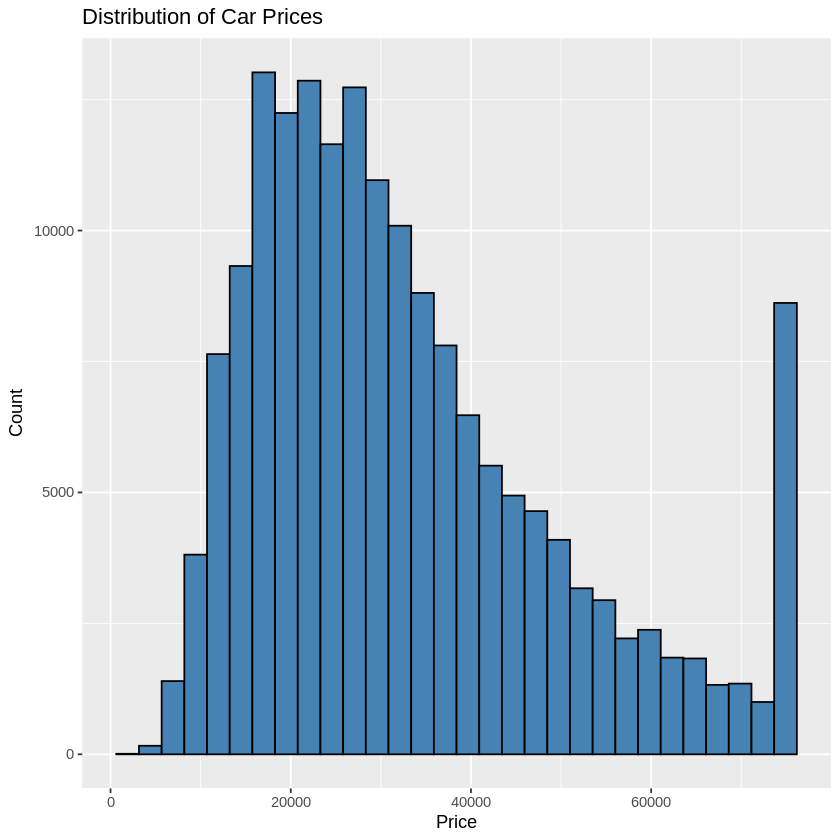

In [17]:
ggplot(Car_df_merged, aes(x = money)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "black") +
  labs(title = "Distribution of Car Prices",
       x = "Price",
       y = "Count")

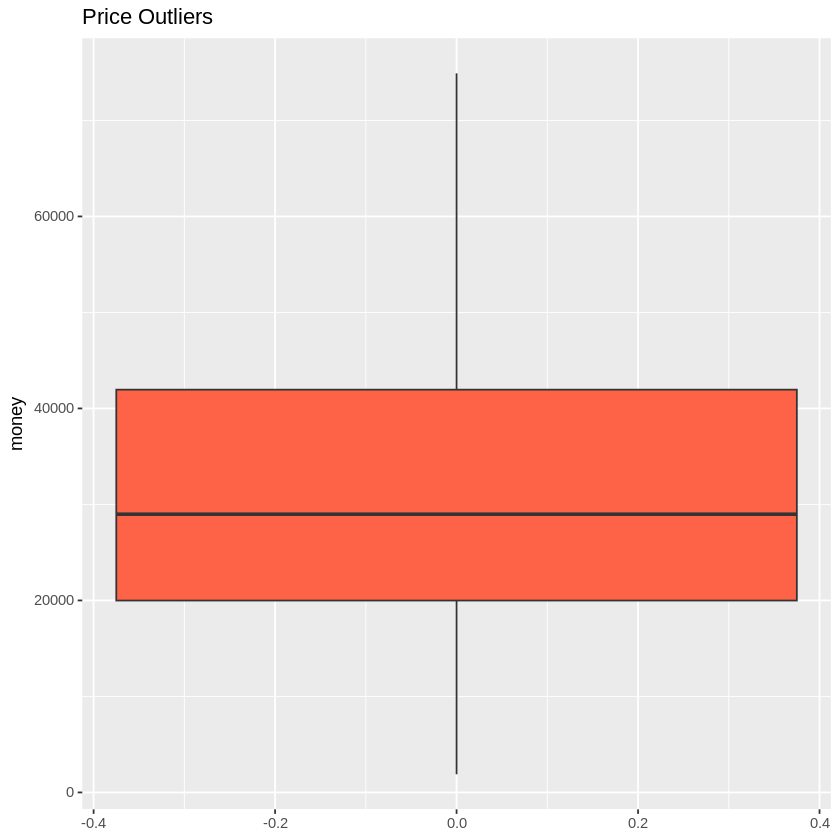

In [18]:
ggplot(Car_df_merged, aes(y = money)) +
  geom_boxplot(fill = "tomato") +
  labs(title = "Price Outliers")

###Mileage

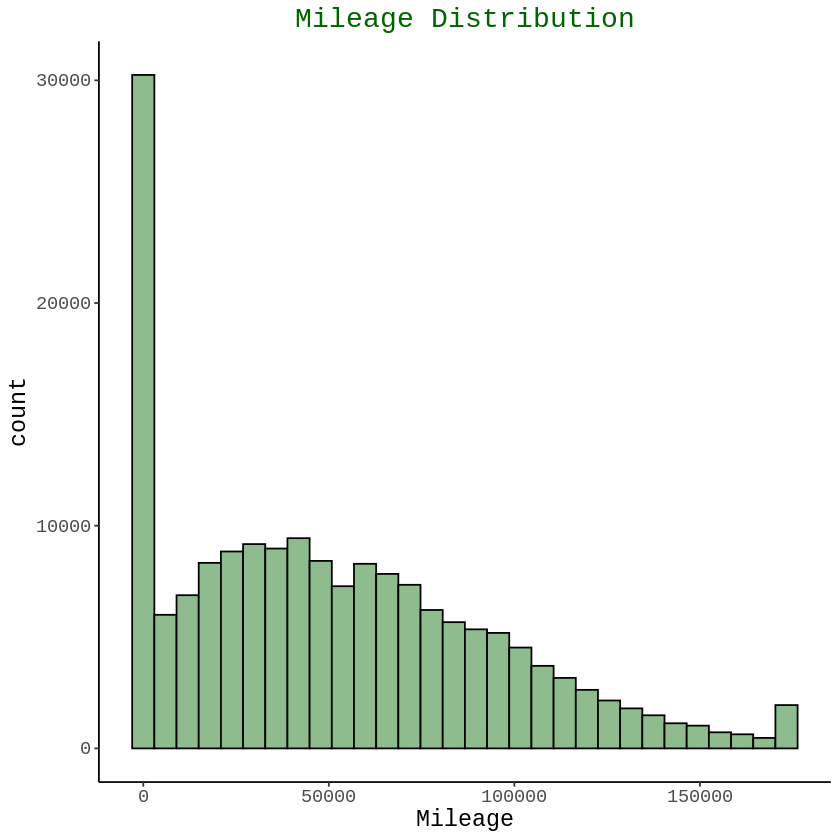

In [19]:
theme_nito = theme(plot.title = element_text(hjust = 0.5, color = "darkgreen"),
    text = element_text(family = "garamond", size = 14),
	  rect = element_blank(),
	  panel.grid = element_blank(),
	  axis.line = element_line(color = "black"))


ggplot(Car_df_merged, aes(x = Mileage)) +
  geom_histogram(bins = 30, fill = "darkseagreen", color = "black") +
  labs(title = "Mileage Distribution") +
  theme_nito

###New vs Used

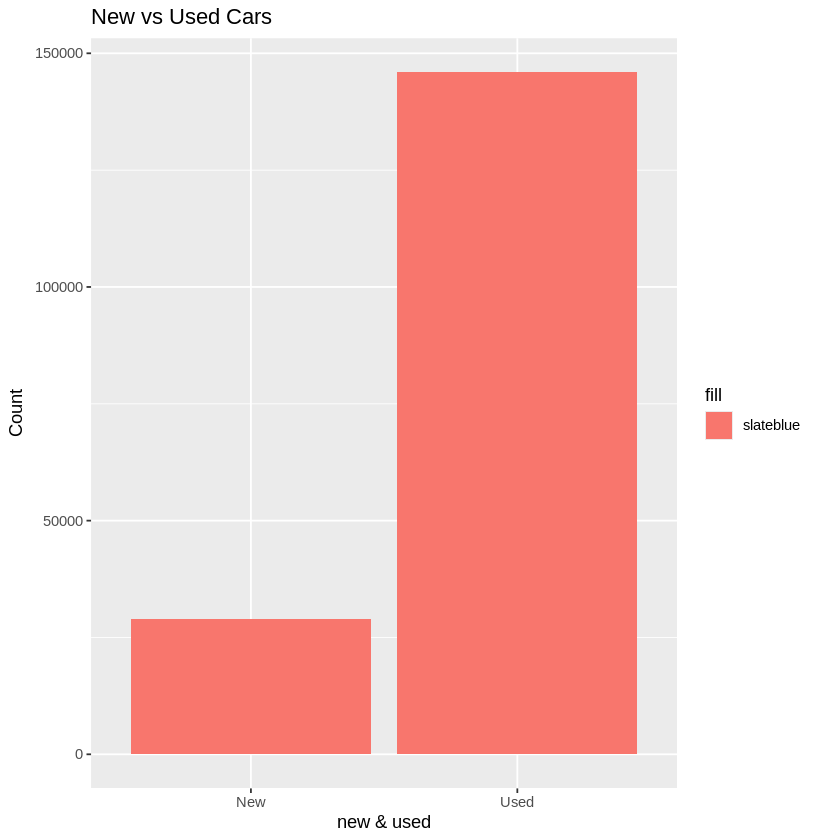

In [47]:
ggplot(Car_df_merged, aes(x = `new&used`, fill = "slateblue")) +
  geom_bar() +
  labs(title = "New vs Used Cars",
       x = "new & used",
       y = "Count")

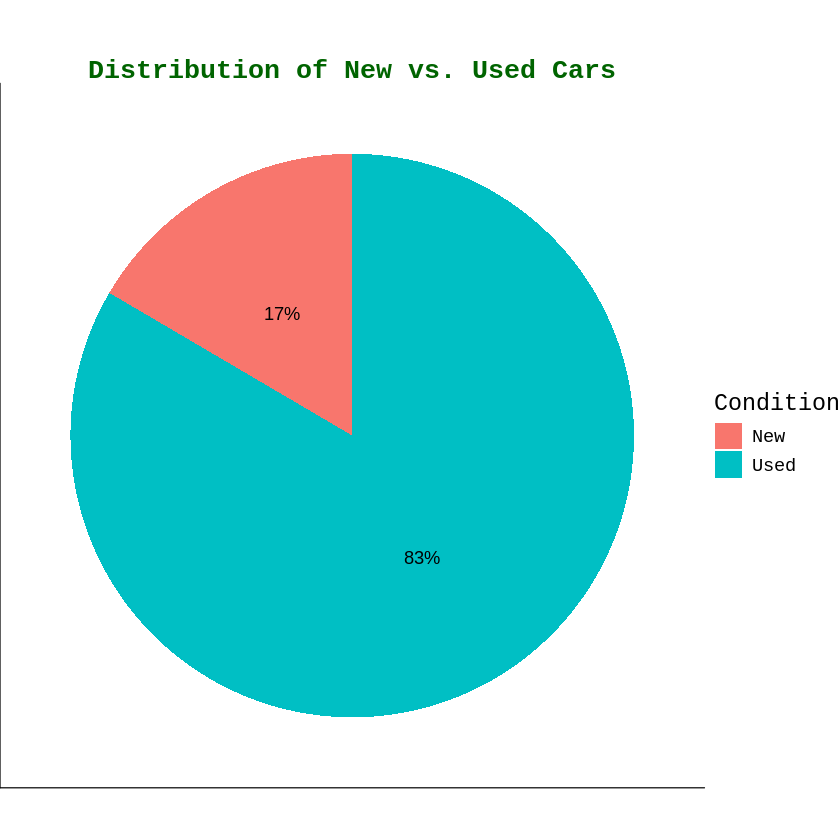

In [21]:

new_used_data <- Car_df_merged %>%
  count(`new&used`) %>%
  mutate(percentage = n / sum(n))

ggplot(new_used_data, aes(x = "", y = percentage, fill = `new&used`)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  geom_text(aes(label = scales::percent(percentage)), position = position_stack(vjust = 0.5)) +
  labs(title = "Distribution of New vs. Used Cars", fill = "Condition") +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5, color = "blue", size = 16, face = "bold"),
        legend.position = "right") + theme_nito

###Fuel Type

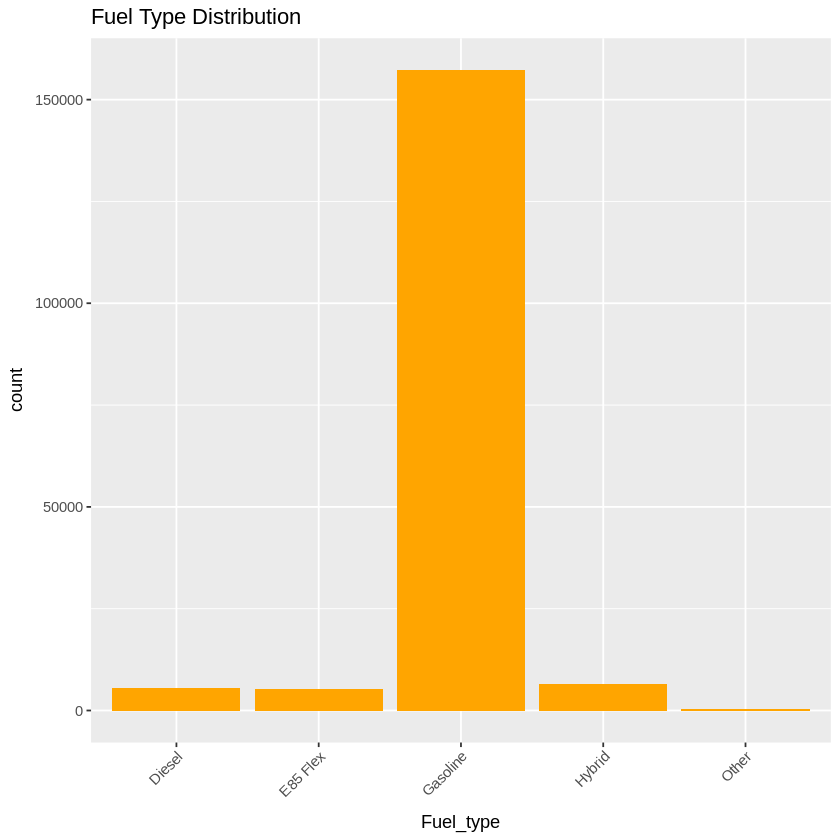

In [22]:
ggplot(Car_df_merged, aes(x = Fuel_type)) +
  geom_bar(fill = "orange") +
  labs(title = "Fuel Type Distribution") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

##Bivariate Analysis

###Mileage vs Price

In [23]:
colnames(Car_df_merged)

[1] "new&used"               "money"                  "Drivetrain"            
 [4] "Mileage"                "Accidents or damage"    "Clean title"           
 [7] "1-owner vehicle"        "Personal use only"      "brand"                 
[10] "Year"                   "Model"                  "currency"              
[13] "Primary_Model"          "name"                   "Num_of_reviews"        
[16] "General_rate"           "Comfort"                "Interior design"       
[19] "Performance"            "Value for the money"    "Exterior styling"      
[22] "Reliability"            "Fuel_type"              "Transmission"          
[25] "Engine_Size"            "Cylinder_Configuration" "Has_Turbo"             
[28] "Has_GDI"                "Has_DOHC"               "Has_Supercharged"      
[31] "MPG"

`geom_smooth()` using formula = 'y ~ x'


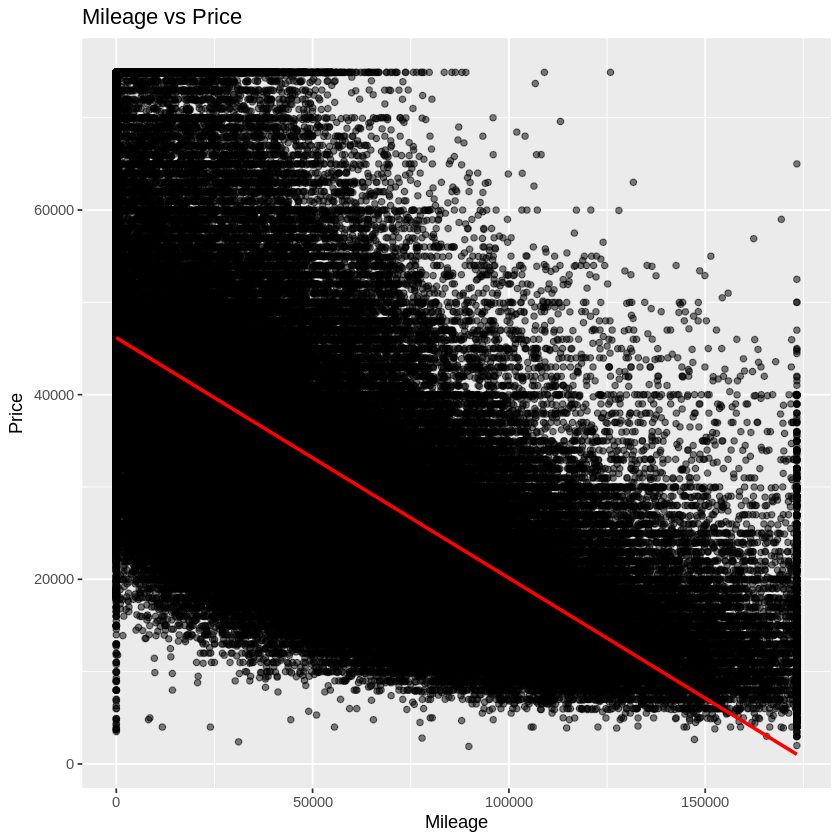

In [24]:
ggplot(Car_df_merged, aes(x = Mileage, y = money)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Mileage vs Price",
       x = "Mileage",
       y = "Price"
       )

###Condition vs Price

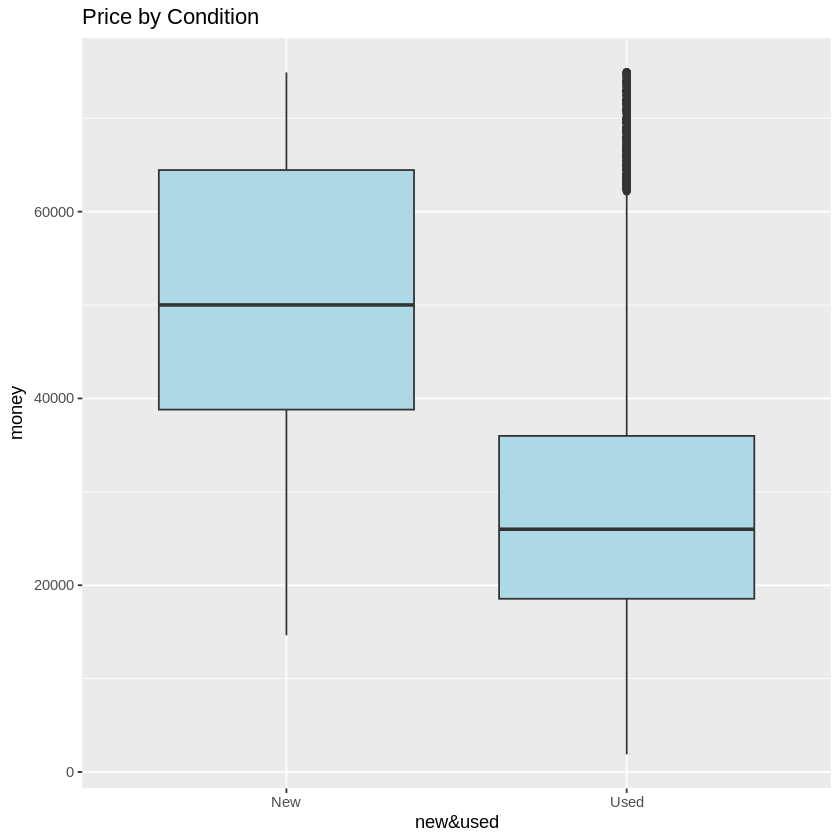

In [48]:
ggplot(Car_df_merged, aes(x = `new&used`, y = money)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Price by Condition")

###Fuel Type vs Price

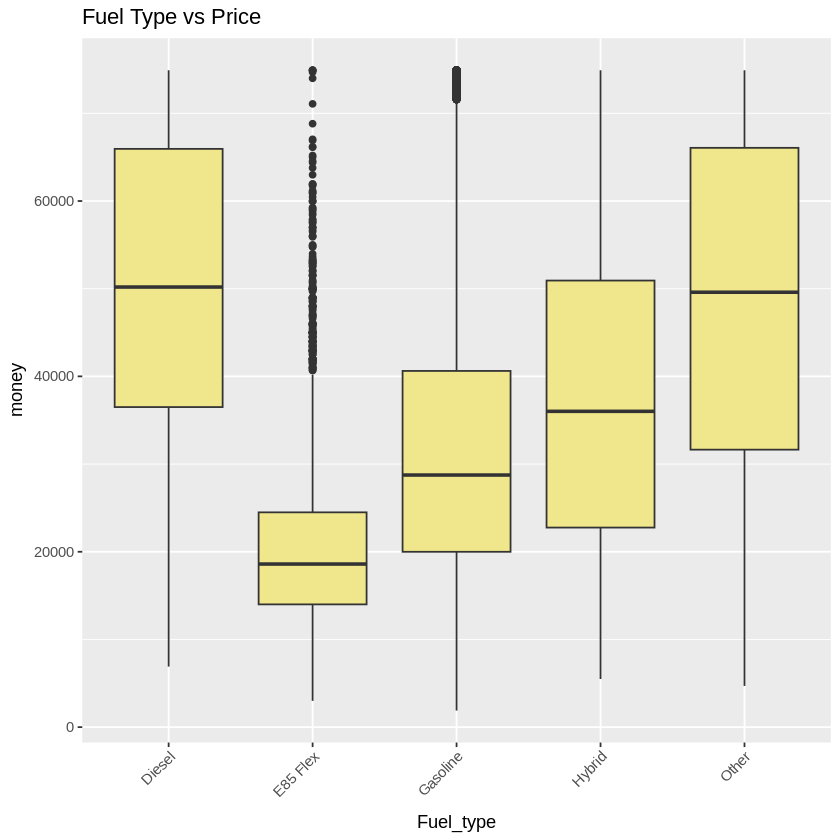

In [26]:
ggplot(Car_df_merged, aes(x = Fuel_type, y = money)) +
  geom_boxplot(fill = "khaki") +
  labs(title = "Fuel Type vs Price") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

###Transmission vs Price

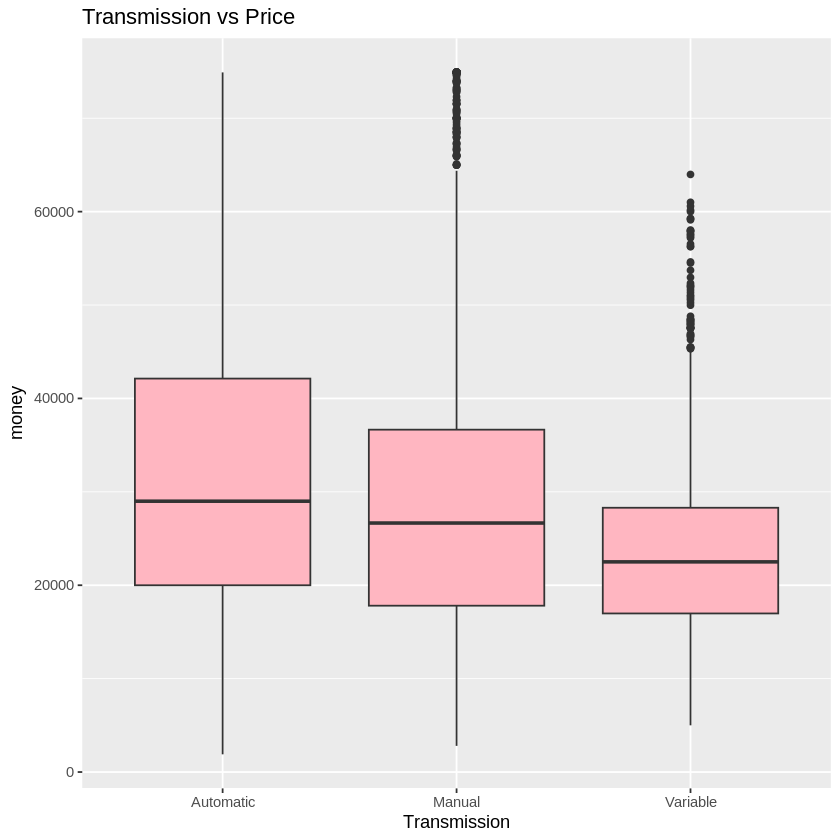

In [27]:
ggplot(Car_df_merged, aes(x = Transmission, y = money)) +
  geom_boxplot(fill = "lightpink") +
  labs(title = "Transmission vs Price")

###Drivetrain Types vs Price

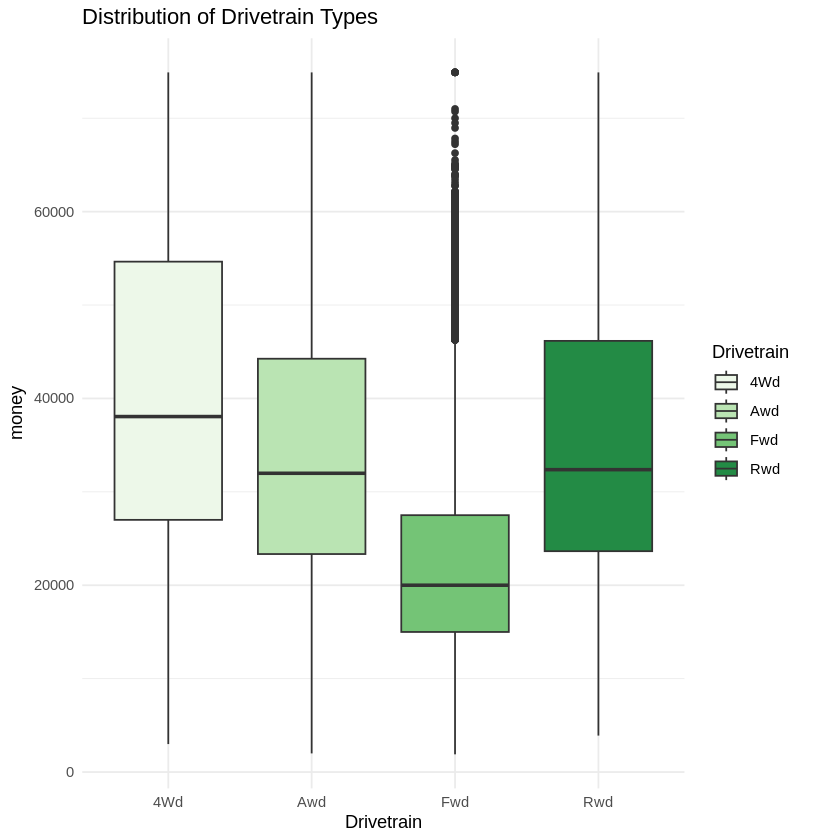

In [28]:
ggplot(Car_df_merged, aes(x = Drivetrain, y = money, fill = Drivetrain)) +
  geom_boxplot() +
  scale_fill_brewer(palette = "Greens") +
  theme_minimal()+
  labs(title = "Distribution of Drivetrain Types")

###Brand vs Price

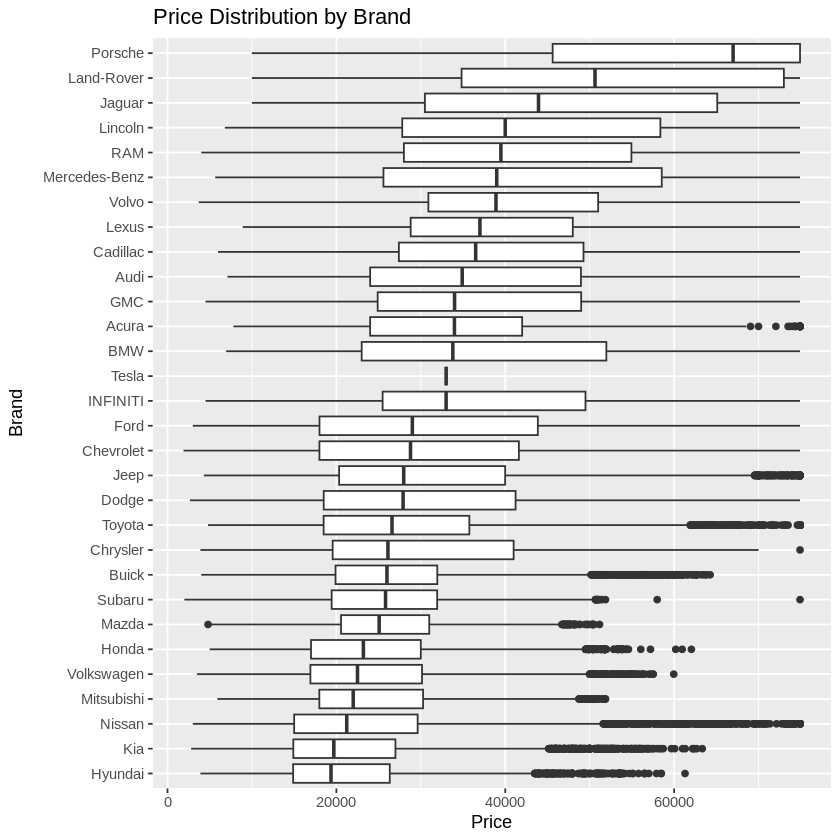

In [29]:
ggplot(Car_df_merged, aes(x = reorder(brand, money, median), y = money)) +
  geom_boxplot() +
  coord_flip() +
  labs(title = "Price Distribution by Brand",
       x = "Brand",
       y = "Price")

##Important Binary Features

###Accidents or Damage

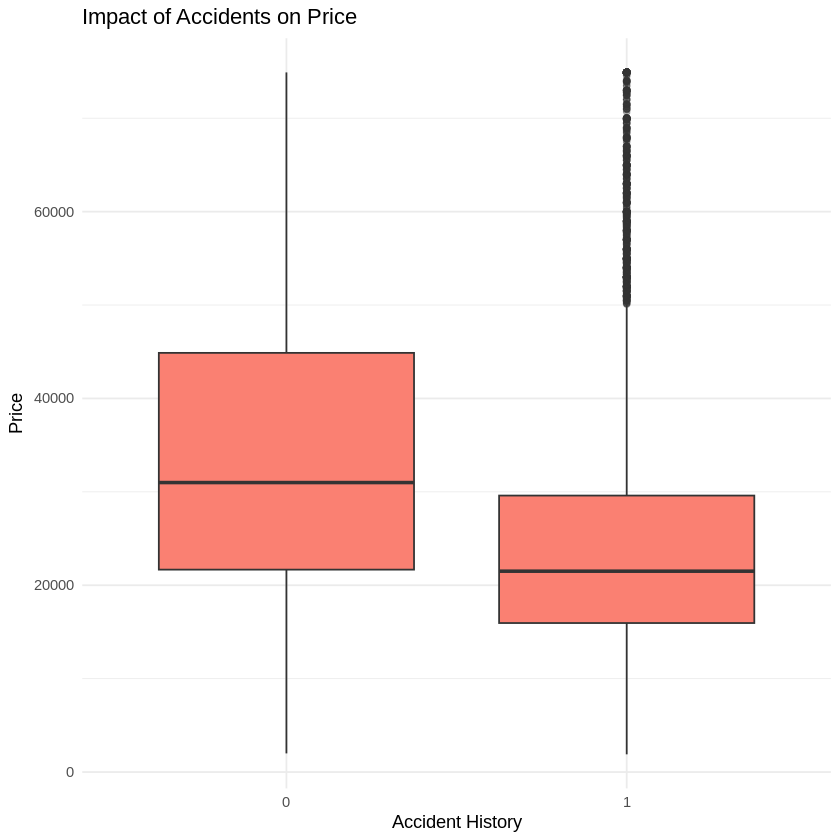

In [49]:
ggplot(Car_df_merged, aes(x = factor(`Accidents or damage`), y = money)) +
  geom_boxplot(fill = "salmon", outlier.alpha = 0.3) +
  theme_minimal() +
  labs(
    title = "Impact of Accidents on Price",
    x = "Accident History",
    y = "Price"
  )

###Clean Title

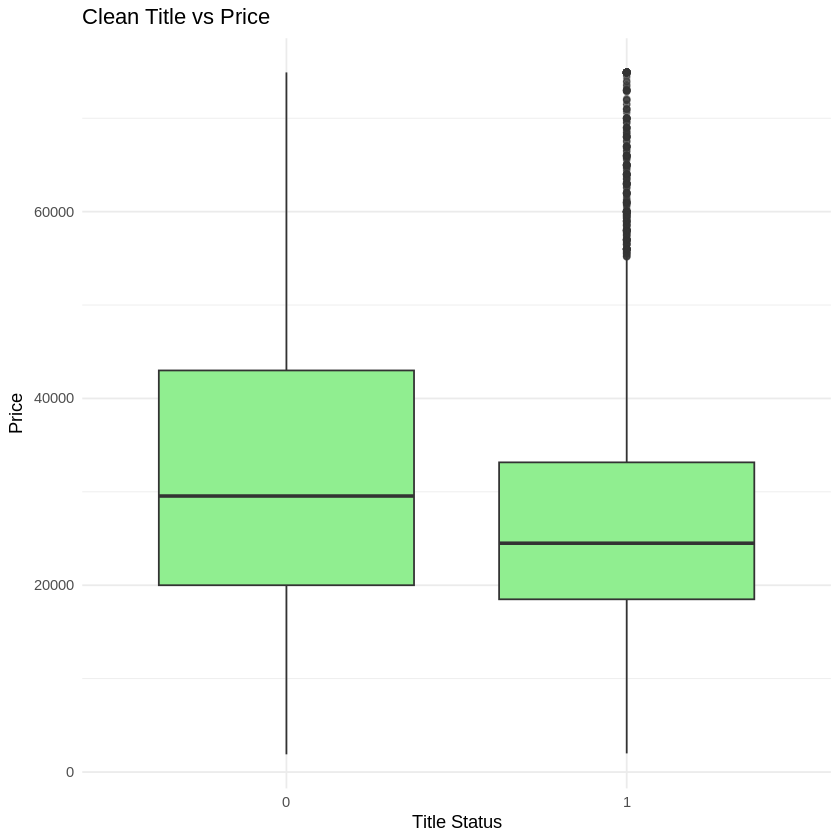

In [50]:
ggplot(Car_df_merged, aes(x = factor(`Clean title`), y = money)) +
  geom_boxplot(fill = "lightgreen", outlier.alpha = 0.3) +
  theme_minimal() +
  labs(
    title = "Clean Title vs Price",
    x = "Title Status",
    y = "Price"
  )

###One Owner

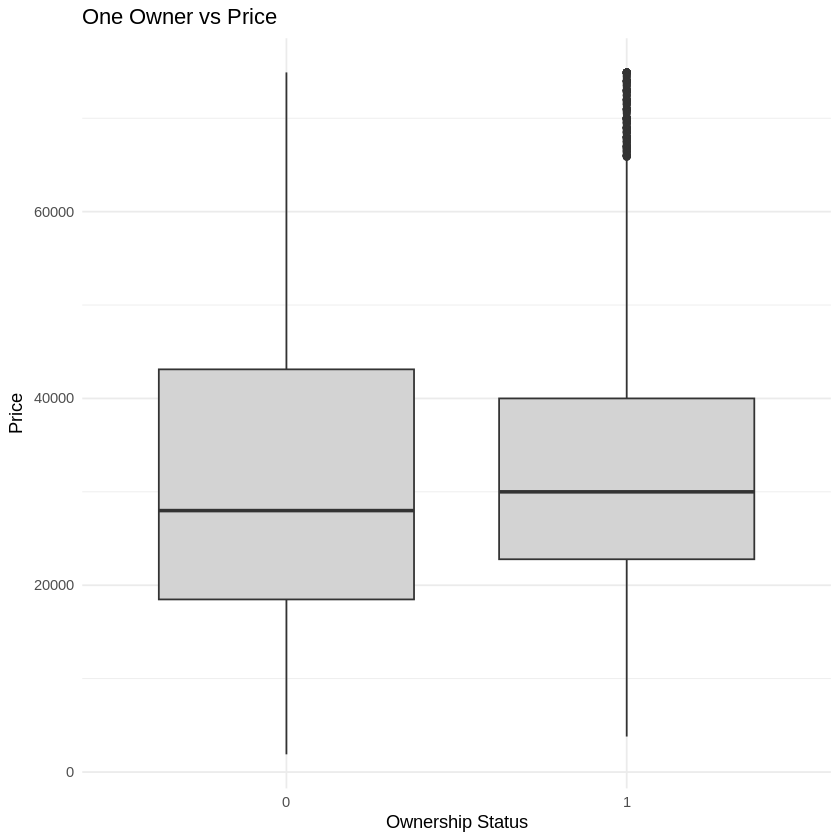

In [52]:
ggplot(Car_df_merged, aes(x = factor(`1-owner vehicle`), y = money)) +
  geom_boxplot(fill = "lightgray", outlier.alpha = 0.3) +
  theme_minimal() +
  labs(
    title = "One Owner vs Price",
    x = "Ownership Status",
    y = "Price"
  )

###Year vs Price

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


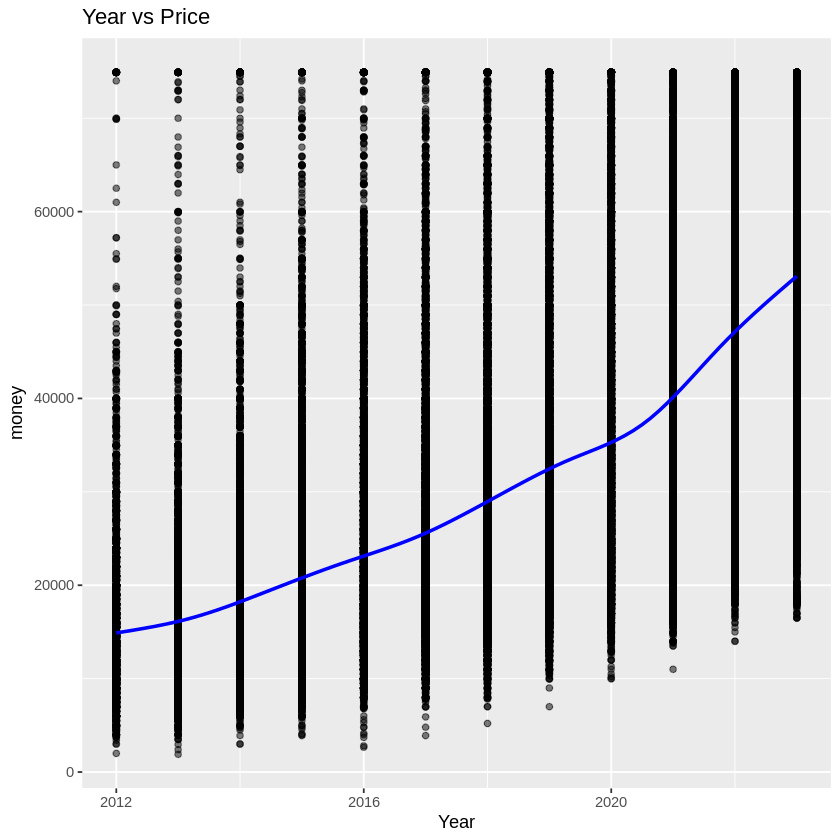

In [33]:
ggplot(Car_df_merged, aes(x = Year, y = money)) +
  geom_point(alpha = 0.5) +
  geom_smooth(se = FALSE, color = "blue") +
  labs(title = "Year vs Price")

##After Using Log

###Log Price

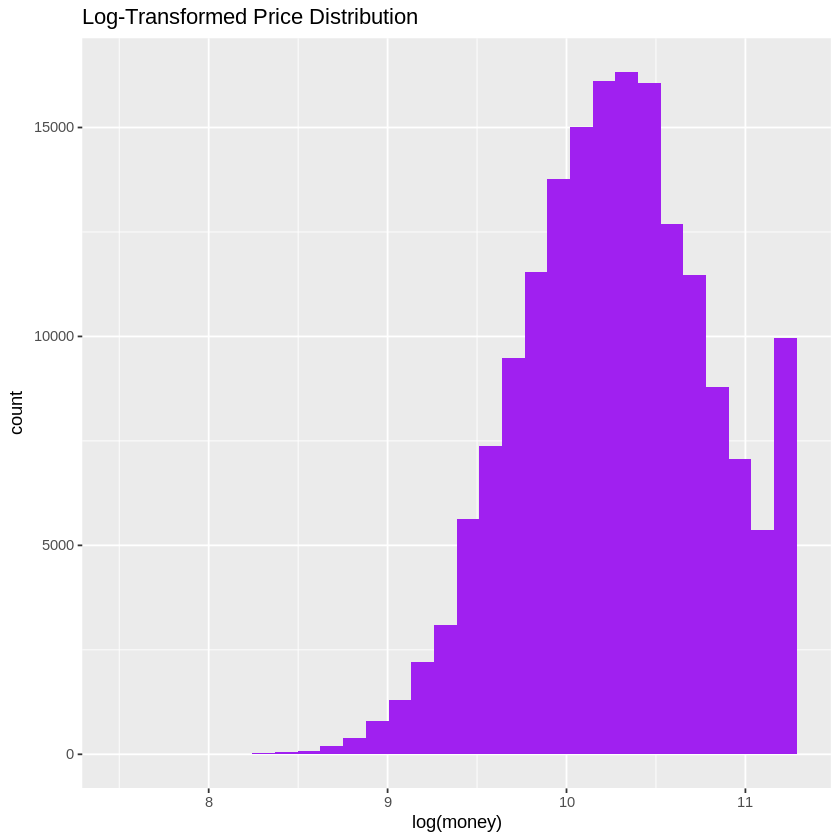

In [34]:
ggplot(Car_df_merged, aes(x = log(money))) +
  geom_histogram(bins = 30, fill = "purple") +
  labs(title = "Log-Transformed Price Distribution")

###Log Mileage

Warning message:
“Removed 5895 rows containing non-finite outside the scale range (`stat_bin()`).”


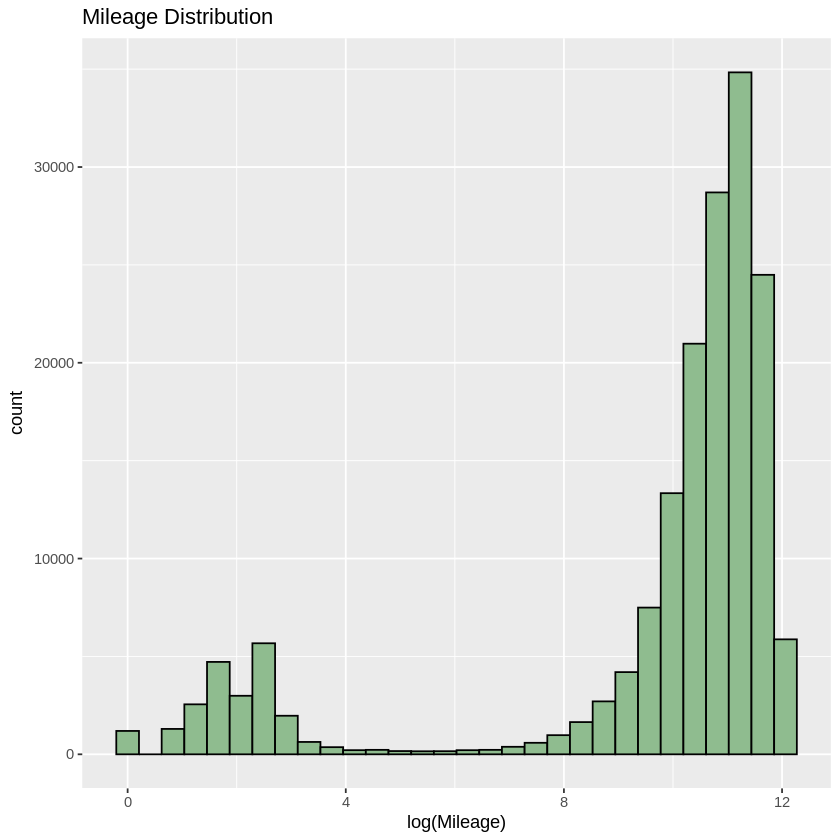

In [35]:
ggplot(Car_df_merged, aes(x = log(Mileage))) +
  geom_histogram(bins = 30, fill = "darkseagreen", color = "black") +
  labs(title = "Mileage Distribution")

###Log Mileage Vs Price

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5895 rows containing non-finite outside the scale range
(`stat_smooth()`).”


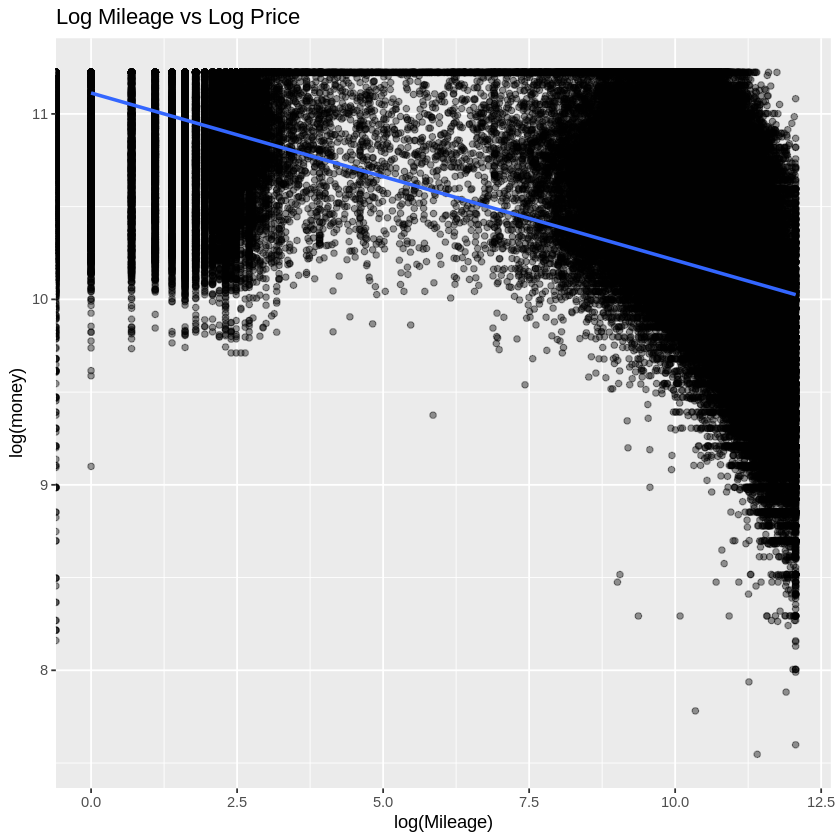

In [36]:
ggplot(Car_df_merged, aes(x = log(Mileage), y = log(money))) +
  geom_point(alpha = 0.4) +
  geom_smooth(method = "lm") +
  labs(title = "Log Mileage vs Log Price")

###new.used vs log Price

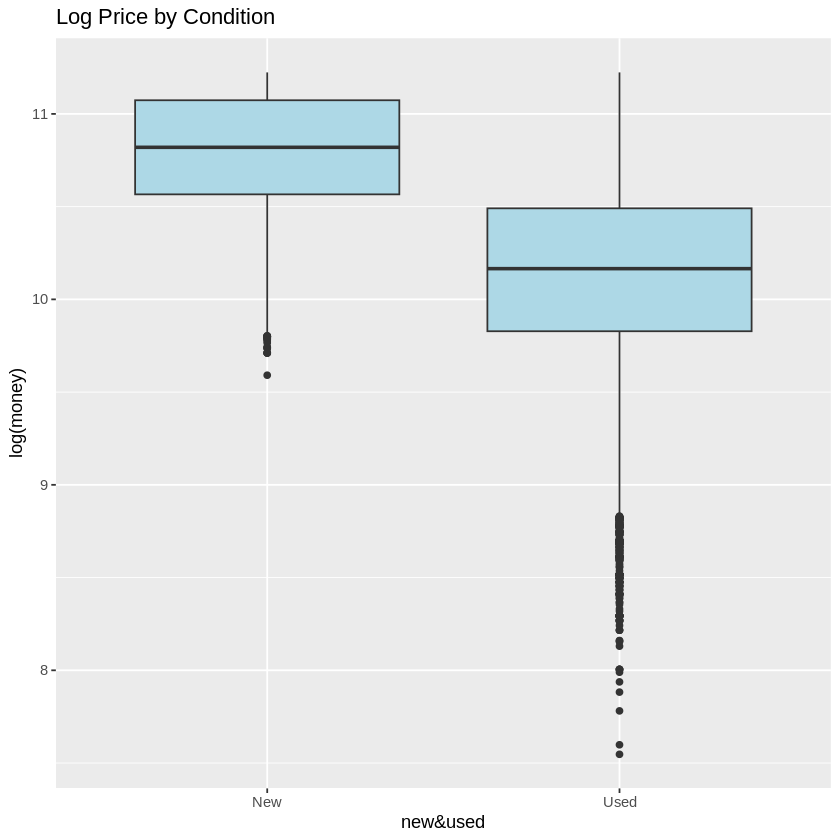

In [53]:
ggplot(Car_df_merged, aes(x = `new&used`, y = log(money))) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Log Price by Condition")

###Fuel Type Vs Log Price

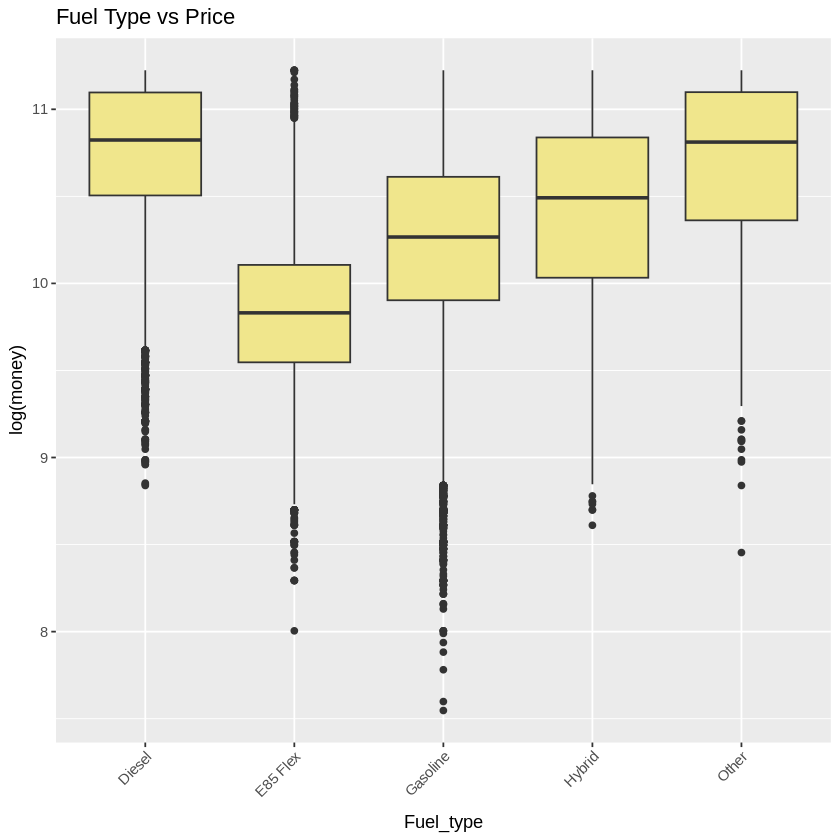

In [38]:
ggplot(Car_df_merged, aes(x = Fuel_type, y = log(money))) +
  geom_boxplot(fill = "khaki") +
  labs(title = "Fuel Type vs Price") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

###Transmission Vs Log Price

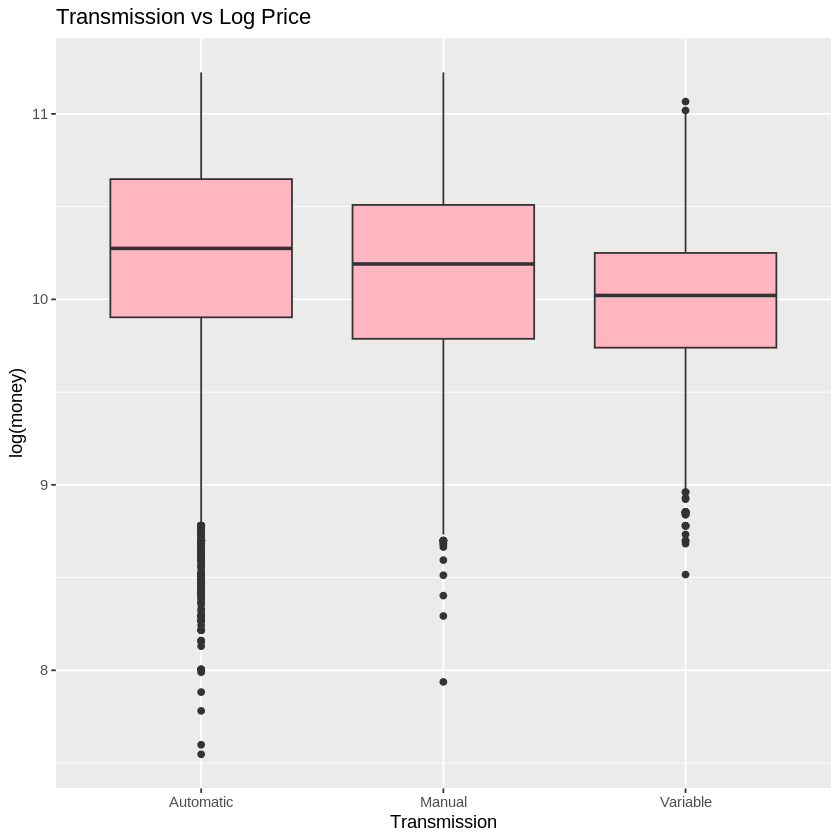

In [39]:
ggplot(Car_df_merged, aes(x = Transmission, y = log(money))) +
  geom_boxplot(fill = "lightpink") +
  labs(title = "Transmission vs Log Price")

###Drivertrain Types Vs Log Price

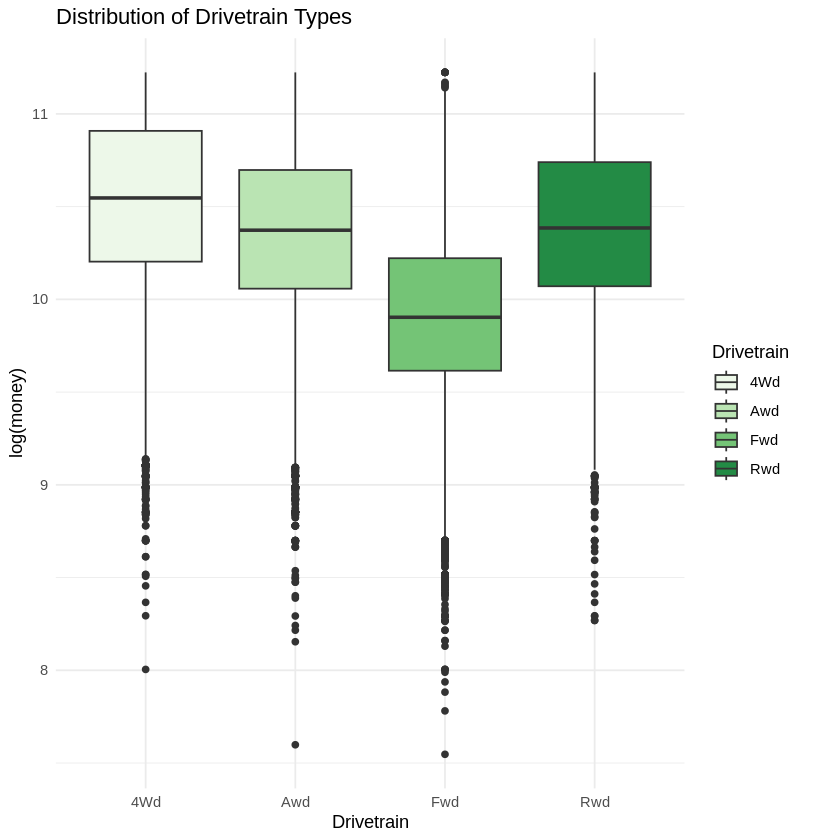

In [40]:
ggplot(Car_df_merged, aes(x = Drivetrain, y = log(money), fill = Drivetrain)) +
  geom_boxplot() +
  scale_fill_brewer(palette = "Greens") +
  theme_minimal()+
  labs(title = "Distribution of Drivetrain Types")

###Brand Vs Log Price

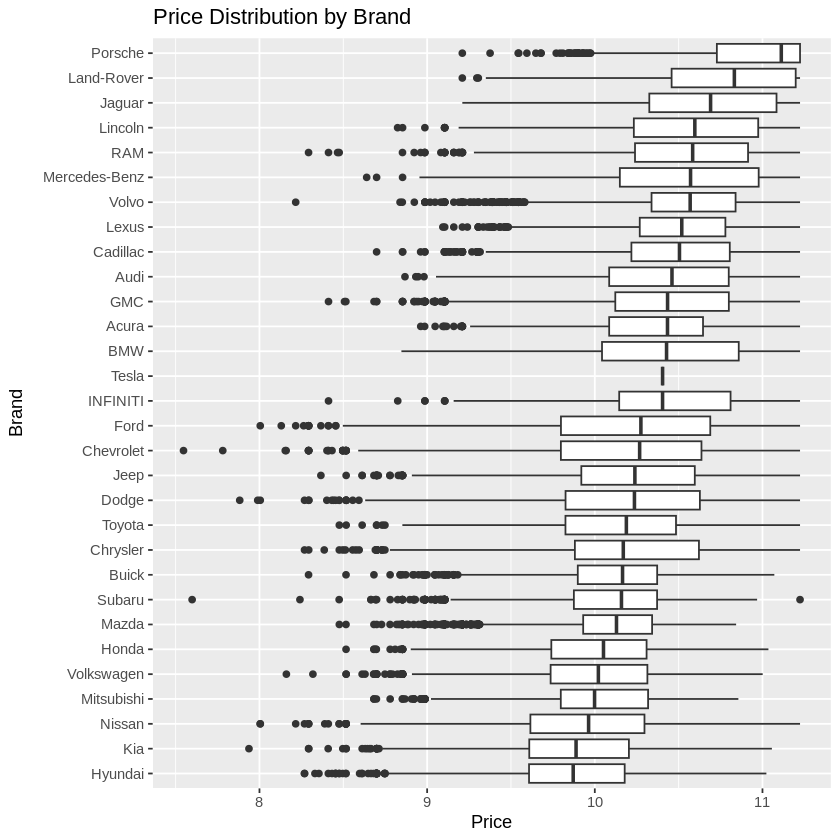

In [41]:
ggplot(Car_df_merged, aes(x = reorder(brand, money, median), y = log(money))) +
  geom_boxplot() +
  coord_flip() +
  labs(title = "Price Distribution by Brand",
       x = "Brand",
       y = "Price")

###Accidents or Damage

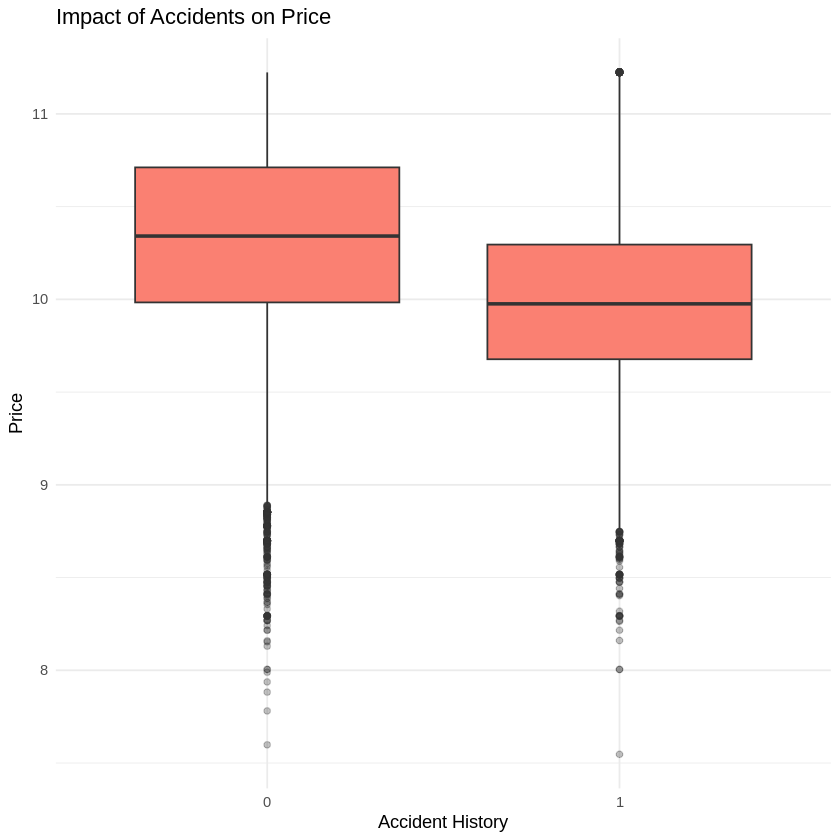

In [54]:
ggplot(Car_df_merged, aes(x = factor(`Accidents or damage`), y = log(money))) +
  geom_boxplot(fill = "salmon", outlier.alpha = 0.3) +
  theme_minimal() +
  labs(
    title = "Impact of Accidents on Price",
    x = "Accident History",
    y = "Price"
  )

###Clean Title

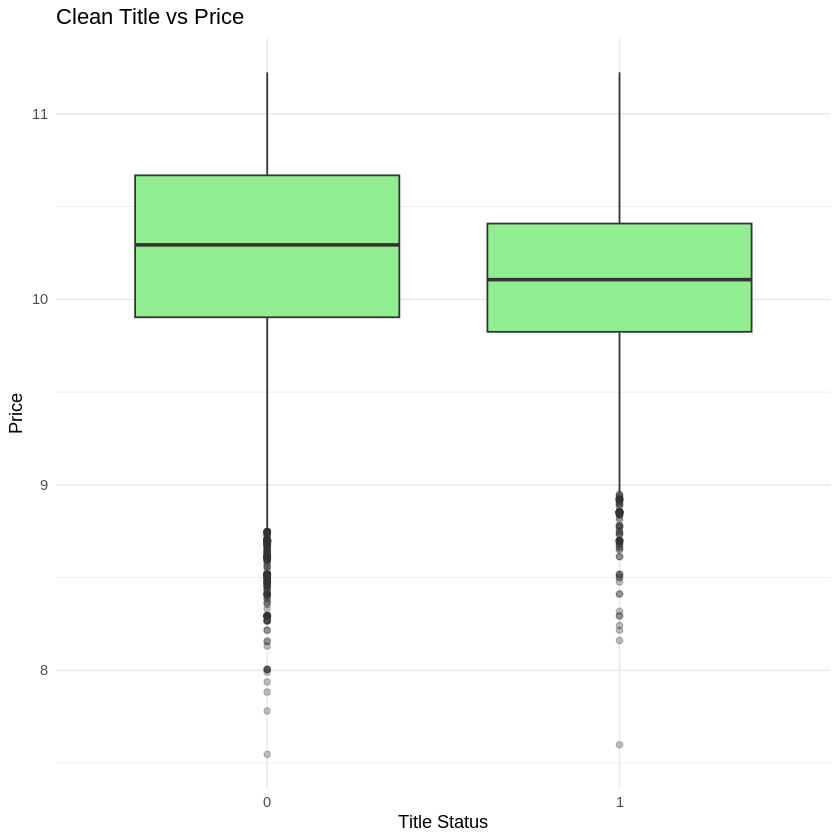

In [55]:
ggplot(Car_df_merged, aes(x = factor(`Clean title`), y = log(money))) +
  geom_boxplot(fill = "lightgreen", outlier.alpha = 0.3) +
  theme_minimal() +
  labs(
    title = "Clean Title vs Price",
    x = "Title Status",
    y = "Price"
  )

###One Owner

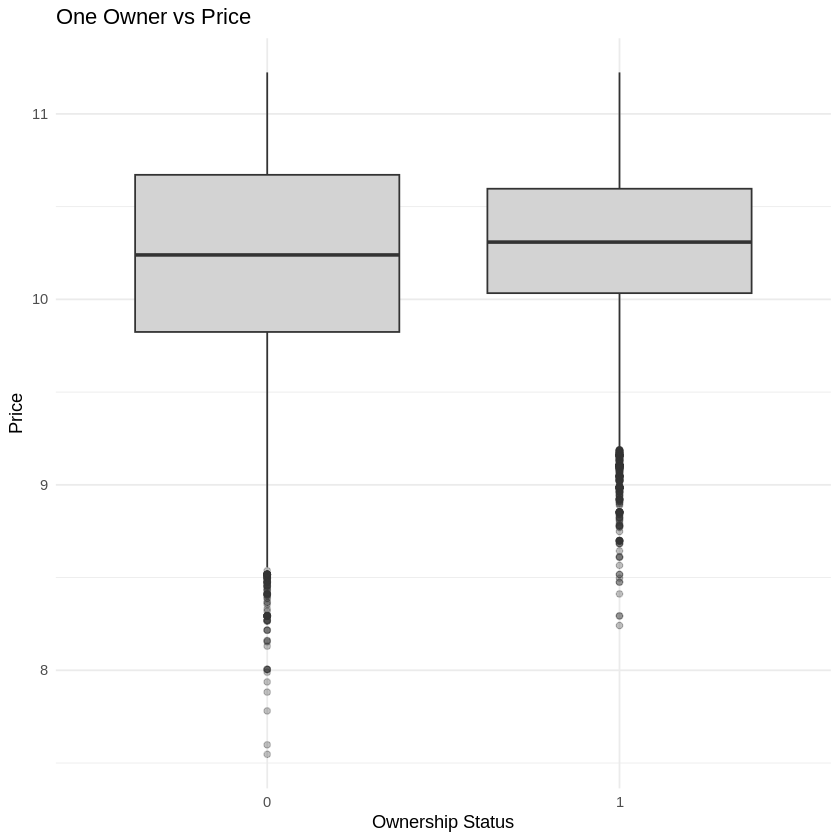

In [56]:
ggplot(Car_df_merged, aes(x = factor(`1-owner vehicle`), y = log(money))) +
  geom_boxplot(fill = "lightgray", outlier.alpha = 0.3) +
  theme_minimal() +
  labs(
    title = "One Owner vs Price",
    x = "Ownership Status",
    y = "Price"
  )

###Year Vs Price

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


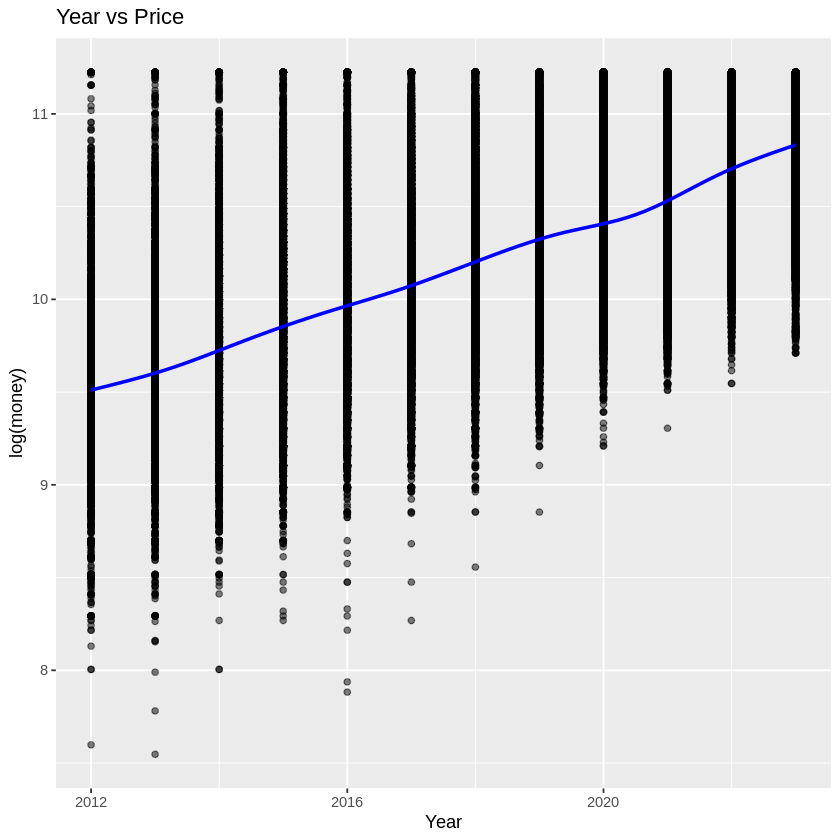

In [45]:
ggplot(Car_df_merged, aes(x = Year, y = log(money))) +
  geom_point(alpha = 0.5) +
  geom_smooth(se = FALSE, color = "blue") +
  labs(title = "Year vs Price")

##Correltion Matrix

###Correlation Matrix between Year, Price, and Mileage


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




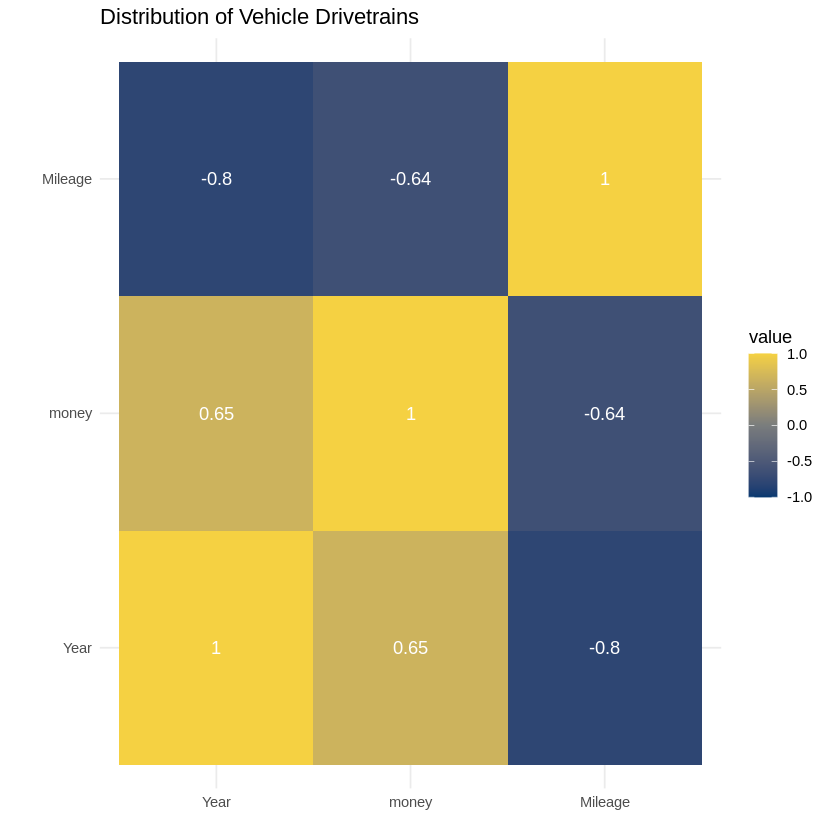

In [57]:


corr_matrix <- cor(Car_df_merged[, c("Year", "money", "Mileage")], use = "complete.obs")

melted_corr <- melt(corr_matrix)

ggplot(data = melted_corr, aes(x=Var1, y=Var2, fill=value)) +
  geom_tile() +
  geom_text(aes(label = round(value, 2)), color = "white") +
  scale_fill_gradient2(low = "#063970", high = "#f5d142", mid = "#7a7d7d",
                       midpoint = 0, limit = c(-1,1)) +
  theme_minimal() +
  labs(title = "Distribution of Vehicle Drivetrains",x = "", y = "")

###Correlation Matrix all Data

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the ggcorrplot package.
  Please report the issue at <https://github.com/kassambara/ggcorrplot/issues>.”


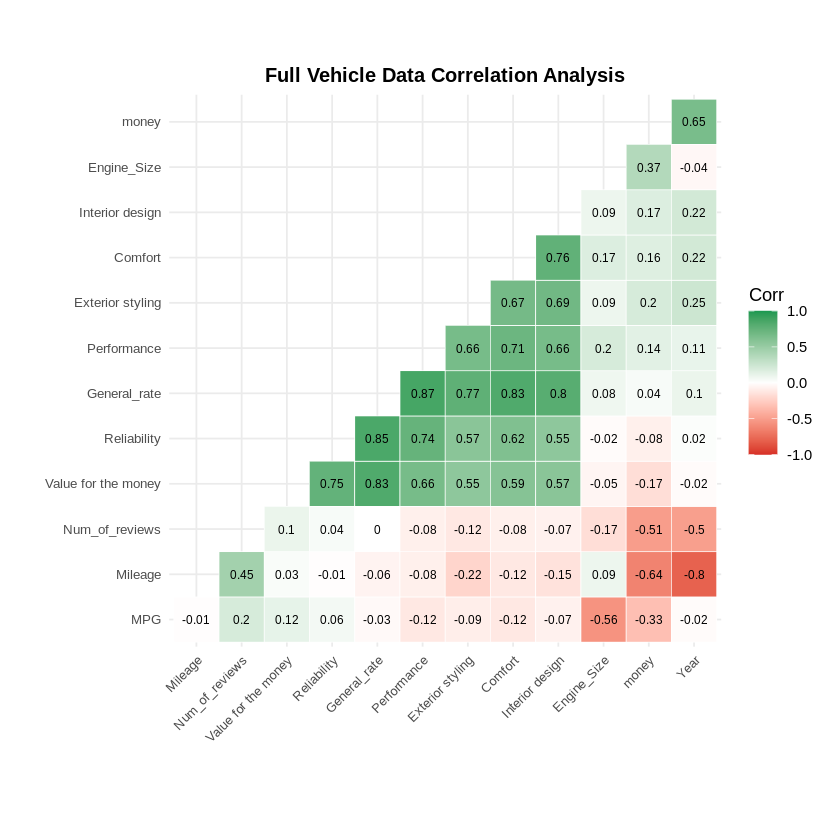

In [61]:
target_cols <- c("money", "Mileage", "Year", "MPG", "Engine_Size",
                 "Num_of_reviews", "General_rate", "Comfort",
                 "Interior design", "Performance", "Value for the money",
                 "Exterior styling", "Reliability")

full_corr <- cor(Car_df_merged[, target_cols], use = "complete.obs")


ggcorrplot(full_corr,
           hc.order = TRUE,
           type = "lower",
           lab = TRUE,
           lab_size = 2.5,
           method = "square",
           colors = c("#d73027", "white", "#1a9850"), # Red (negative) to Green (positive)
           title = "Full Vehicle Data Correlation Analysis",
           outline.col = "white") +
  theme(
    axis.text.x = element_text(size = 8, angle = 45, vjust = 1, hjust = 1),
    axis.text.y = element_text(size = 8),
    plot.title = element_text(size = 12, face = "bold", hjust = 0.5)
  )

##Relationship

###Relationship between Manufacturing Year, Price, and Mileage

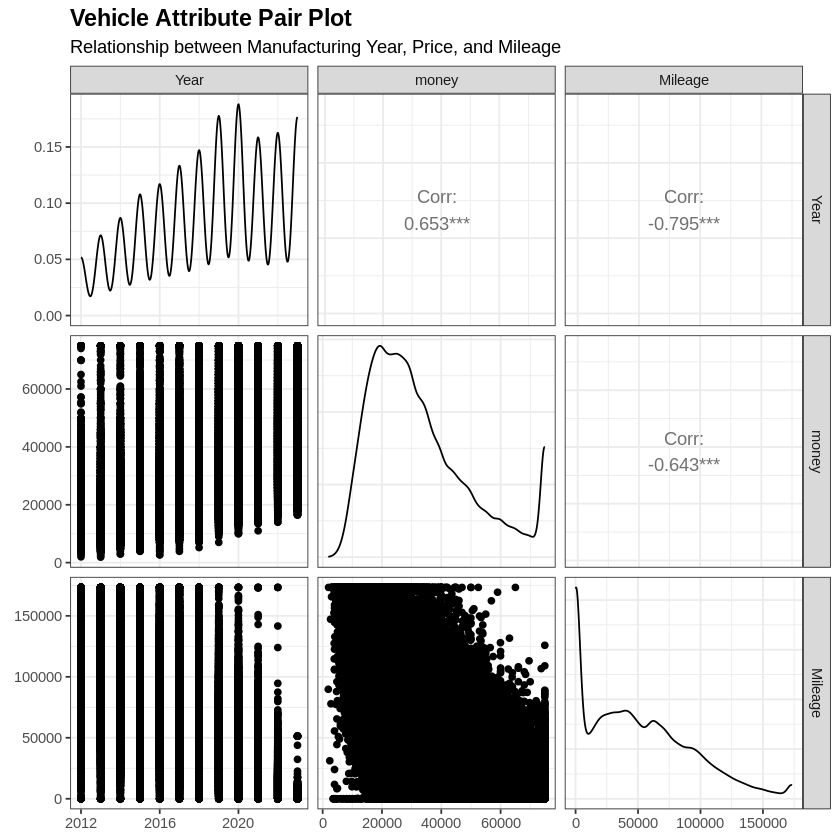

In [63]:
cols_to_plot <- c("Year", "money", "Mileage")

ggpairs(Car_df_merged[, cols_to_plot]) +
  theme_bw() +
  labs(
    title = "Vehicle Attribute Pair Plot",
    subtitle = "Relationship between Manufacturing Year, Price, and Mileage"
  ) +
  theme(plot.title = element_text(face = "bold", size = 14))

# Regression
# Bassem
# Ahmed Mahmoud (Bebo)

##simple_linear regresion

In [64]:
money_Mileage_model <- lm(money ~ Mileage, data = Car_df_merged)

In [65]:
summary(money_Mileage_model)


Call:
lm(formula = money ~ Mileage, data = Car_df_merged)

Residuals:
   Min     1Q Median     3Q    Max 
-42680  -9257  -2565   6546  63951 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.618e+04  4.909e+01   940.8   <2e-16 ***
Mileage     -2.604e-01  7.413e-04  -351.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13080 on 174856 degrees of freedom
Multiple R-squared:  0.4137,	Adjusted R-squared:  0.4137 
F-statistic: 1.234e+05 on 1 and 174856 DF,  p-value: < 2.2e-16


Warning message:
“`fortify(<lm>)` was deprecated in ggplot2 4.0.0.
ℹ Please use `broom::augment(<lm>)` instead.
ℹ The deprecated feature was likely used in the ggfortify package.
  Please report the issue at <https://github.com/sinhrks/ggfortify/issues>.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggfortify package.
  Please report the issue at <https://github.com/sinhrks/ggfortify/issues>.”


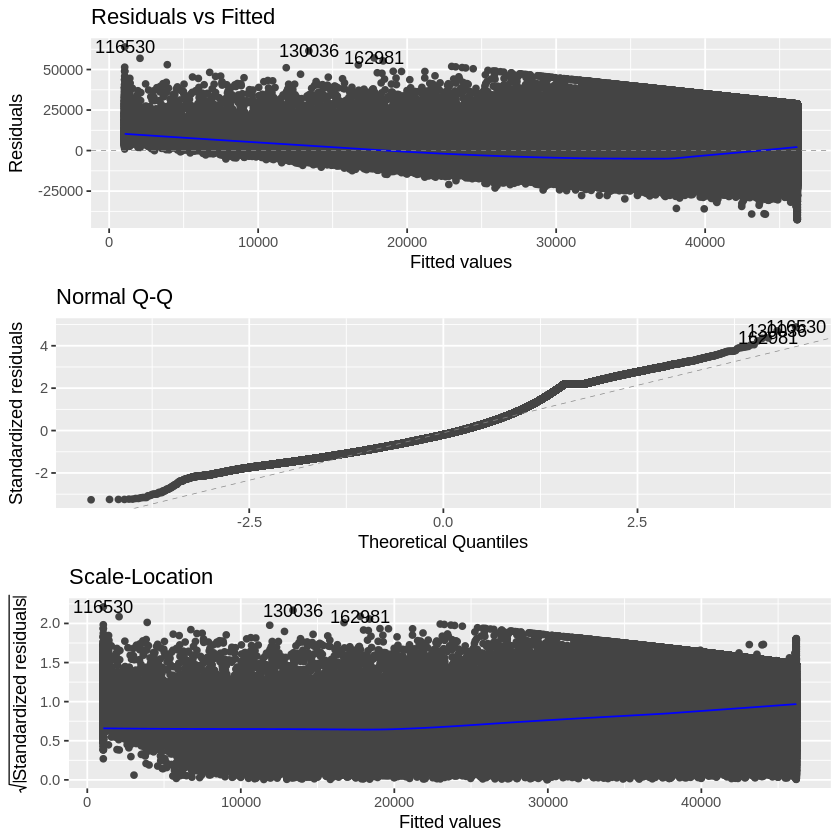

In [66]:

autoplot(money_Mileage_model,which=1:3,nrow=3,ncol=1)

In [67]:
money_Mileage_model_logged <- lm(log(money) ~ Mileage, data = Car_df_merged)
summary(money_Mileage_model_logged)


Call:
lm(formula = log(money) ~ Mileage, data = Car_df_merged)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6618 -0.2640 -0.0192  0.2496  1.8931 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.072e+01  1.394e-03  7688.7   <2e-16 ***
Mileage     -8.818e-06  2.105e-08  -418.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3714 on 174856 degrees of freedom
Multiple R-squared:  0.5009,	Adjusted R-squared:  0.5009 
F-statistic: 1.755e+05 on 1 and 174856 DF,  p-value: < 2.2e-16


##multiple regression

##dummy vriables

In [68]:
Car_df_merged <- dummy_cols(Car_df_merged, select_columns = c("brand", "Transmission", "Fuel_type"),
remove_first_dummy = TRUE,
remove_selected_columns = TRUE)

In [69]:
# Create the tibble by removing the target variable (money)
explanatory_data <- Car_df_merged %>%
  select(-money)
print(explanatory_data)

# A tibble: 174,858 × 62
   `new&used` Drivetrain Mileage `Accidents or damage` `Clean title`
   <chr>      <chr>        <dbl>                 <dbl>         <dbl>
 1 New        Fwd              5                     0             0
 2 New        Awd              0                     0             0
 3 New        Fwd              5                     0             0
 4 New        Fwd             11                     0             0
 5 New        Fwd              2                     0             0
 6 New        Awd              4                     0             0
 7 New        Awd             19                     0             0
 8 New        Fwd              2                     0             0
 9 New        Fwd              2                     0             0
10 New        Awd             20                     0             0
# ℹ 174,848 more rows
# ℹ 57 more variables: `1-owner vehicle` <dbl>, `Personal use only` <dbl>,
#   Year <dbl>, Model <chr>, currency <chr>, Prima

In [70]:
explanatory_data_numeric <- Car_df_merged %>%
  select(where(is.numeric)) %>%  # Keeps only numeric columns
  select(-money)                 # Removes the target variable

# Check which columns were included
colnames(explanatory_data_numeric)

[1] "Mileage"               "Accidents or damage"   "Clean title"          
 [4] "1-owner vehicle"       "Personal use only"     "Year"                 
 [7] "Num_of_reviews"        "General_rate"          "Comfort"              
[10] "Interior design"       "Performance"           "Value for the money"  
[13] "Exterior styling"      "Reliability"           "Engine_Size"          
[16] "Has_Turbo"             "Has_GDI"               "Has_DOHC"             
[19] "Has_Supercharged"      "MPG"                   "brand_Audi"           
[22] "brand_BMW"             "brand_Buick"           "brand_Cadillac"       
[25] "brand_Chevrolet"       "brand_Chrysler"        "brand_Dodge"          
[28] "brand_Ford"            "brand_GMC"             "brand_Honda"          
[31] "brand_Hyundai"         "brand_INFINITI"        "brand_Jaguar"         
[34] "brand_Jeep"            "brand_Kia"             "brand_Land-Rover"     
[37] "brand_Lexus"           "brand_Lincoln"         "brand_Mazda"          
[40] "brand_Mercedes-Benz"   "brand_Mitsubishi"      "brand_Nissan"         
[43] "brand_Porsche"         "brand_RAM"             "brand_Subaru"         
[46] "brand_Tesla"           "brand_Toyota"          "brand_Volkswagen"     
[49] "brand_Volvo"           "Transmission_Manual"   "Transmission_Variable"
[52] "Fuel_type_E85 Flex"    "Fuel_type_Gasoline"    "Fuel_type_Hybrid"     
[55] "Fuel_type_Other"

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


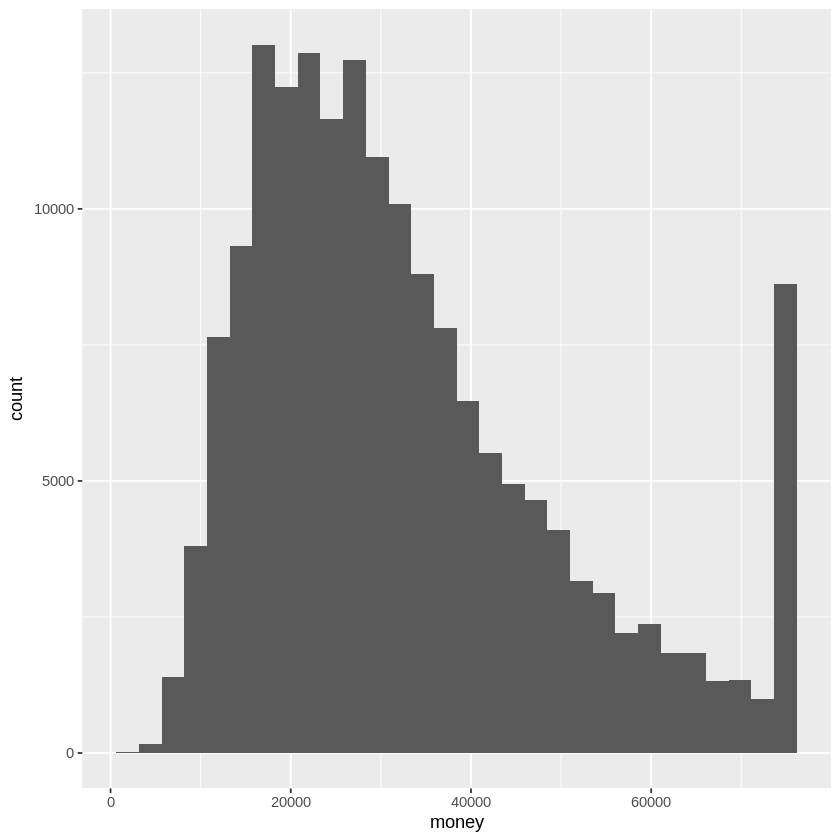

In [71]:
ggplot(data = Car_df_merged, aes(x = money)) +
  geom_histogram()

###Scaling the data (using standardization method)

In [72]:
# 1. Prepare the data by selecting relevant columns
# We use drop_na() because most models will fail if there are missing values
model_ready_data <- Car_df_merged %>%
  select(money, Mileage, Year, Engine_Size, MPG,
         starts_with("brand_"), starts_with("Transmission_"),`Accidents or damage`) %>%
  drop_na()

# 2. Scale only the continuous predictors
# This centers (mean=0) and scales (SD=1) the numbers
Car_df_final <- model_ready_data %>%
  mutate(across(c(Mileage, Year, Engine_Size, MPG), ~ as.vector(scale(.))))

# View the result
head(Car_df_final)

money Mileage   Year     Engine_Size MPG        brand_Audi brand_BMW
1 33095 -1.209341 1.421523 -1.2613474   1.7340412 0          0        
2 61745 -1.209460 1.421523  0.3087793  -0.4108679 0          0        
3 38095 -1.209341 1.421523 -1.2613474   1.2677566 0          0        
4 47995 -1.209199 1.421523 -0.8688157   0.3351874 0          0        
5 47995 -1.209412 1.421523 -0.8688157   0.3351874 0          0        
6 58245 -1.209365 1.421523  0.3087793  -0.4108679 0          0        
  brand_Buick brand_Cadillac brand_Chevrolet ⋯ brand_Porsche brand_RAM
1 0           0              0               ⋯ 0             0        
2 0           0              0               ⋯ 0             0        
3 0           0              0               ⋯ 0             0        
4 0           0              0               ⋯ 0             0        
5 0           0              0               ⋯ 0             0        
6 0           0              0               ⋯ 0             0        
  brand_Subaru brand_Tesla brand_Toyota brand_Volkswagen brand_Volvo
1 0            0           0            0                0          
2 0            0           0            0                0          
3 0            0           0            0                0          
4 0            0           0            0                0          
5 0            0           0            0                0          
6 0            0           0            0                0          
  Transmission_Manual Transmission_Variable Accidents or damage
1 0                   0                     0                  
2 0                   0                     0                  
3 1                   0                     0                  
4 0                   0                     0                  
5 0                   0                     0                  
6 0                   0                     0

###check the scaling

In [73]:
# This will show the mean and SD for your numeric columns
Car_df_final %>%
  summarise(across(c(Mileage, Year, Engine_Size, MPG),
                   list(mean = ~round(mean(.), 2),
                        sd = ~round(sd(.), 2))))

Mileage_mean Mileage_sd Year_mean Year_sd Engine_Size_mean Engine_Size_sd
1 0            1          0         1       0                1             
  MPG_mean MPG_sd
1 0        1

##Model

###model_1

In [74]:
# Build a model with all potential predictors
# 'money' is the target, all others are explanatory
model_1 <- lm(money ~ Mileage  +Year + Engine_Size + MPG +  brand_Toyota + brand_BMW + Transmission_Variable+`Accidents or damage`, data = Car_df_final)

# View the full statistical report
summary(model_1)


Call:
lm(formula = money ~ Mileage + Year + Engine_Size + MPG + brand_Toyota + 
    brand_BMW + Transmission_Variable + `Accidents or damage`, 
    data = Car_df_final)

Residuals:
   Min     1Q Median     3Q    Max 
-36882  -6682  -1442   4767  56298 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           32748.77      27.45 1193.04   <2e-16 ***
Mileage               -6695.48      39.13 -171.10   <2e-16 ***
Year                   5969.12      39.15  152.45   <2e-16 ***
Engine_Size            6158.59      28.68  214.74   <2e-16 ***
MPG                   -2102.82      28.68  -73.33   <2e-16 ***
brand_Toyota           1332.18     109.14   12.21   <2e-16 ***
brand_BMW              7905.52     112.76   70.11   <2e-16 ***
Transmission_Variable -3262.67     214.41  -15.22   <2e-16 ***
`Accidents or damage` -1321.98      63.15  -20.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9816 on 

####to check multy correinality

In [75]:
# Calculate Variance Inflation Factor (VIF)
vif(model_1)

Mileage                  Year           Engine_Size 
             2.778917              2.782049              1.492661 
                  MPG          brand_Toyota             brand_BMW 
             1.492398              1.023537              1.011616 
Transmission_Variable `Accidents or damage` 
             1.012713              1.099135

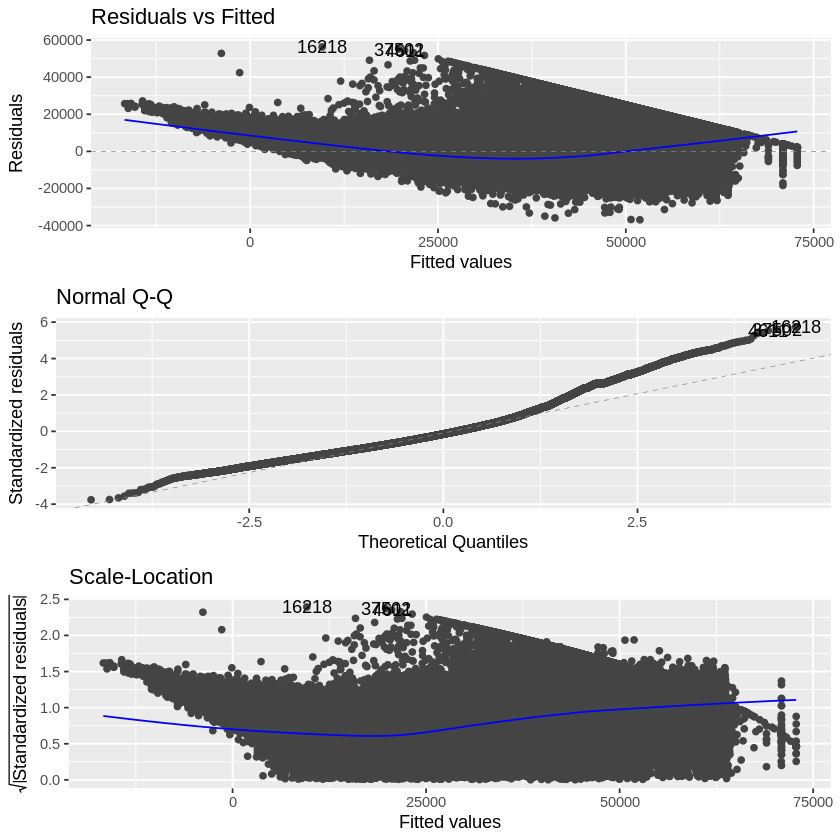

In [76]:
autoplot(model_1,which=1:3,nrow=3,ncol=1)

##model 2( transformation + interaction)

In [77]:


# 1. Transform Raw Data
model_ready <- Car_df_merged %>%
  # Ensure these columns exist
  drop_na(money, Mileage, Year, Engine_Size, MPG) %>%
  mutate(
    log_money = log(money),
    log_mileage = log(Mileage + 1),
    log_engine = log(Engine_Size + 0.1)
  )

# 2. Scale the Continuous Features
final_data <- model_ready %>%
  # FIXED: Removed Age and Age_Sq from the scaling list
  mutate(across(c(log_mileage, log_engine, MPG),
                ~ as.vector(scale(.)))) %>%
  # FIXED: Removed the extra closing parenthesis
  rename_with(~make.names(.))

# 3. Fit Model with Interactions

model_final <- lm(log_money ~
                    log_mileage * brand_BMW +
                    brand_Toyota +
                    log_engine +
                    Transmission_Variable +
                    MPG,
                  data = final_data)

# 4. View results
summary(model_final)


Call:
lm(formula = log_money ~ log_mileage * brand_BMW + brand_Toyota + 
    log_engine + Transmission_Variable + MPG, data = final_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.09399 -0.25253  0.01138  0.25935  2.07268 

Coefficients:
                        Estimate Std. Error   t value Pr(>|t|)    
(Intercept)           10.2577610  0.0009845 10419.022   <2e-16 ***
log_mileage           -0.2851485  0.0009488  -300.542   <2e-16 ***
brand_BMW              0.2628086  0.0045095    58.279   <2e-16 ***
brand_Toyota          -0.0044282  0.0043197    -1.025    0.305    
log_engine             0.1473338  0.0011505   128.063   <2e-16 ***
Transmission_Variable -0.1314786  0.0084951   -15.477   <2e-16 ***
MPG                   -0.0741422  0.0011564   -64.113   <2e-16 ***
log_mileage:brand_BMW -0.0797979  0.0055404   -14.403   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3888 on 174850 degrees of freedom
Multiple R

##feature engineering (model 3)

In [78]:

# 1. Transform Raw Data
model_ready <- Car_df_merged %>%

  drop_na(money, Mileage, Year, Engine_Size, MPG) %>%
  mutate(
    log_money = log(money),
    log_mileage = log(Mileage + 1),
    # Use + 0.1 so that Electric cars (0.0 engine) don't become -Inf
    log_engine = log(Engine_Size + 0.1),
    Age = 2025 - Year, Age_Sq = Age^2 )

# 2. Scale the Continuous Features
final_data <- model_ready %>%
  mutate(across(c(log_mileage, log_engine, Age, Age_Sq, MPG),
                ~ as.vector(scale(.)))) %>%
  rename_with(~make.names(.))

# 3. Fit Model with Interactions

model_final <- lm(log_money ~ log_mileage * brand_BMW + brand_Toyota + log_engine +Transmission_Variable+ Age_Sq + MPG, data = final_data)


# 4. View results
summary(model_final)


Call:
lm(formula = log_money ~ log_mileage * brand_BMW + brand_Toyota + 
    log_engine + Transmission_Variable + Age_Sq + MPG, data = final_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.07562 -0.19307 -0.01463  0.18071  1.99757 

Coefficients:
                        Estimate Std. Error  t value Pr(>|t|)    
(Intercept)           10.2541936  0.0007380 13894.58   <2e-16 ***
log_mileage           -0.1148856  0.0008475  -135.56   <2e-16 ***
brand_BMW              0.2622908  0.0033800    77.60   <2e-16 ***
brand_Toyota           0.0608000  0.0032426    18.75   <2e-16 ***
log_engine             0.1612716  0.0008632   186.84   <2e-16 ***
Transmission_Variable -0.1210381  0.0063675   -19.01   <2e-16 ***
Age_Sq                -0.3104251  0.0008406  -369.30   <2e-16 ***
MPG                   -0.0747559  0.0008668   -86.25   <2e-16 ***
log_mileage:brand_BMW -0.0437692  0.0041539   -10.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Resid

In [79]:
# Calculate Variance Inflation Factor (VIF)
vif(model_final)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



log_mileage             brand_BMW          brand_Toyota 
             1.478692              1.031068              1.024805 
           log_engine Transmission_Variable                Age_Sq 
             1.533738              1.013190              1.454590 
                  MPG log_mileage:brand_BMW 
             1.546683              1.057074

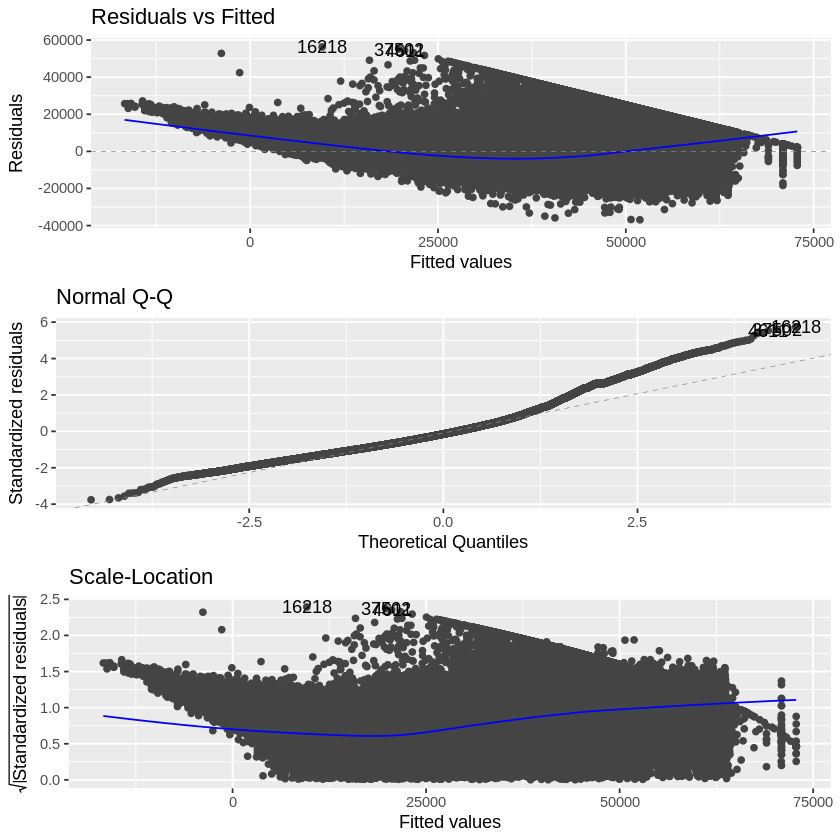

In [80]:
autoplot(model_1,which=1:3,nrow=3,ncol=1)

##random forest model(4)

In [81]:
# 1. Prepare Data and Create Age
rf_data <- Car_df_merged %>%
  distinct() %>% # Prevent record leakage as no car in be in both trianing and test data
  mutate(
    Age = 2025 - Year # Create Age from Year
  ) %>%
  select(money, Mileage, Age, Engine_Size, MPG,
         starts_with("brand_"), starts_with("Transmission_")) %>%
  drop_na()

# Clean column names
names(rf_data) <- make.names(names(rf_data))

# 2. Split Data BEFORE scaling
set.seed(123)
trainIndex <- createDataPartition(rf_data$money, p = .8, list = FALSE)
train_raw <- rf_data[trainIndex, ]
test_raw  <- rf_data[-trainIndex, ]

# 3. Scale Continuous Variables (using Train parameters for Test)

cont_cols <- c("Mileage", "Age", "Engine_Size", "MPG")

# Train Scaling
train_data <- train_raw %>%
  mutate(
    money = log(money), # Log target for better RF performance
    across(all_of(cont_cols), ~ as.vector(scale(.)))
  )

# Extract scaling parameters to prevent leakage
means <- colMeans(train_raw[, cont_cols])
sds   <- apply(train_raw[, cont_cols], 2, sd)

# Test Scaling (Applying train parameters)
test_data <- test_raw %>%
  mutate(
    money = log(money),
    Mileage = (Mileage - means["Mileage"]) / sds["Mileage"],
    Age = (Age - means["Age"]) / sds["Age"],
    Engine_Size = (Engine_Size - means["Engine_Size"]) / sds["Engine_Size"],
    MPG = (MPG - means["MPG"]) / sds["MPG"]
  )

# 4. Build Model
rf_model <- randomForest(money ~ ., data = train_data, ntree = 100, importance = TRUE)
print(rf_model)



Call:
 randomForest(formula = money ~ ., data = train_data, ntree = 100,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 11

          Mean of squared residuals: 0.0190131
                    % Var explained: 93.12


## Review model

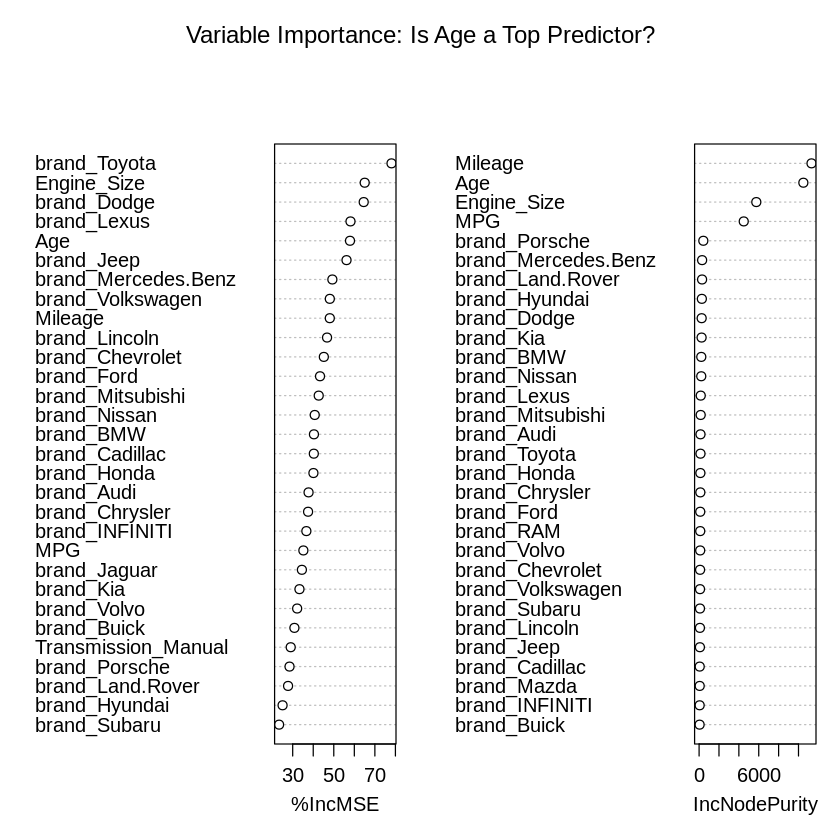

In [82]:
varImpPlot(rf_model, main = "Variable Importance: Is Age a Top Predictor?")

##show Rmse in dollars

--- Real Error Metrics (In Dollars) ---
Average Error (MAE): $ 3116.14 
Root Mean Squared Error (RMSE): $ 4536.75 


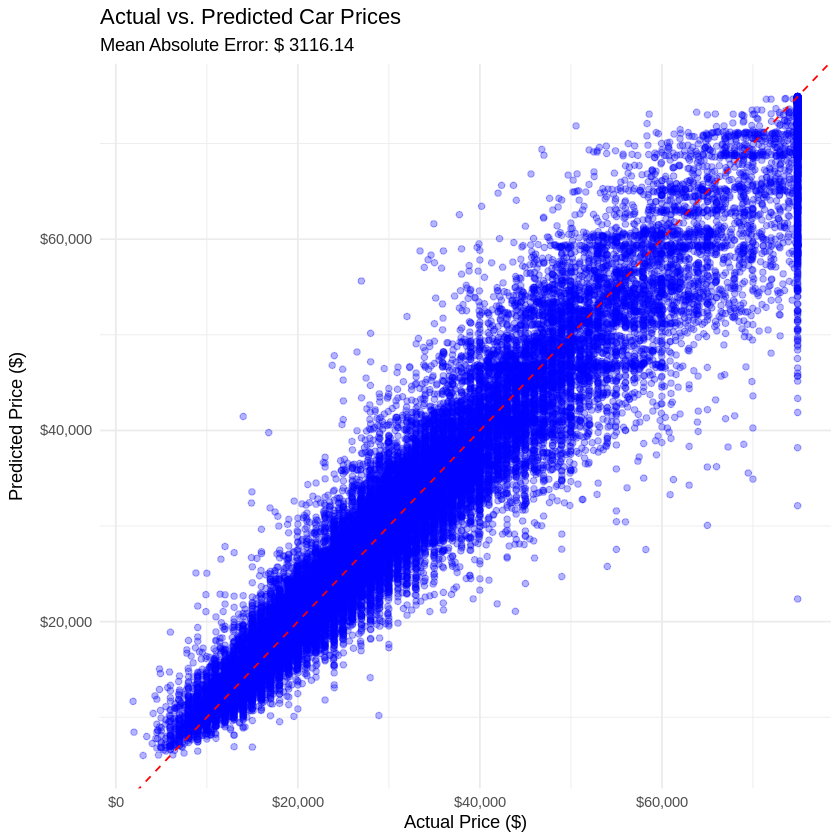

In [83]:
# 1. Predict using the Test set (results will be in log scale)
predictions_log <- predict(rf_model, test_data)

# 2. Transform values from Log scale back to actual Dollars using exp()
predictions_dollars <- exp(predictions_log)
actual_dollars <- exp(test_data$money)

# 3. Calculate Root Mean Squared Error (RMSE) in dollars
rmse_dollars <- sqrt(mean((actual_dollars - predictions_dollars)^2))

# 4. Calculate Mean Absolute Error (MAE) in dollars
# This tells you: On average, how many dollars is the model off by?
mae_dollars <- mean(abs(actual_dollars - predictions_dollars))

# Print the real-world error metrics
cat("--- Real Error Metrics (In Dollars) ---\n")
cat("Average Error (MAE): $", round(mae_dollars, 2), "\n")
cat("Root Mean Squared Error (RMSE): $", round(rmse_dollars, 2), "\n")

# 5. Create a plot to compare Actual vs. Predicted prices
plot_data <- data.frame(Actual = actual_dollars, Predicted = predictions_dollars)

ggplot(plot_data, aes(x = Actual, y = Predicted)) +
  geom_point(alpha = 0.3, color = "blue") +
  # Add a 45-degree dashed red line representing perfect predictions
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  scale_x_continuous(labels = label_dollar()) +
  scale_y_continuous(labels = label_dollar()) +
  labs(
    title = "Actual vs. Predicted Car Prices",
    subtitle = paste("Mean Absolute Error: $", round(mae_dollars, 2)),
    x = "Actual Price ($)",
    y = "Predicted Price ($)"
  ) +
  theme_minimal()

# Dashboard

In [ ]:
ui <- fluidPage(

  titlePanel("Car Data Visualization - Shiny"),

  sidebarLayout(

    sidebarPanel(

      selectInput(
        "x_var",
        "Select X Variable:",
        choices = colnames(Car_df_merged),
        selected = "Mileage"
      ),

      selectInput(
        "y_var",
        "Select Y Variable:",
        choices = colnames(Car_df_merged),
        selected = "money"
      ),

      selectInput(
        "plot_type",
        "Select Plot Type:",
        choices = c("Scatter Plot", "Box Plot", "Histogram")
      ),

      checkboxInput("log_x", "Log X-axis", FALSE),
      checkboxInput("log_y", "Log Y-axis", FALSE)
    ),

    mainPanel(
      plotOutput("plot", height = "500px")
    )
  )
)

server <- function(input, output) {

  output$plot <- renderPlot({

    df <- Car_df_merged %>%
      filter(!is.na(.data[[input$x_var]]),
             !is.na(.data[[input$y_var]]))

    if (input$log_x) {
      df <- df %>% filter(.data[[input$x_var]] > 0)
      df[[input$x_var]] <- log(df[[input$x_var]])
    }

    if (input$log_y) {
      df <- df %>% filter(.data[[input$y_var]] > 0)
      df[[input$y_var]] <- log(df[[input$y_var]])
    }

    if (input$plot_type == "Scatter Plot") {
      ggplot(df, aes(x = .data[[input$x_var]],
                     y = .data[[input$y_var]])) +
        geom_point(alpha = 0.4) +
        geom_smooth(method = "lm", se = TRUE) +
        theme_minimal()

    } else if (input$plot_type == "Box Plot") {
      ggplot(df, aes(x = as.factor(.data[[input$x_var]]),
                     y = .data[[input$y_var]])) +
        geom_boxplot(fill = "lightgreen") +
        theme_minimal()

    } else {
      ggplot(df, aes(x = .data[[input$x_var]])) +
        geom_histogram(bins = 30, fill = "darkgreen") +
        theme_minimal()
    }
  })
}

shinyApp(ui, server)


Listening on http://127.0.0.1:4203



# Simulation

## Checking structure

In [ ]:
str(Car_df_merged)

spc_tbl_ [174,858 × 31] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ new&used              : chr [1:174858] "New" "New" "New" "New" ...
 $ money                 : num [1:174858] 33095 61745 38095 47995 47995 ...
 $ Drivetrain            : chr [1:174858] "Fwd" "Awd" "Fwd" "Fwd" ...
 $ Mileage               : num [1:174858] 5 0 5 11 2 4 19 2 2 20 ...
 $ Accidents or damage   : num [1:174858] 0 0 0 0 0 0 0 0 0 0 ...
 $ Clean title           : num [1:174858] 0 0 0 0 0 0 0 0 0 0 ...
 $ 1-owner vehicle       : num [1:174858] 0 0 0 0 0 0 0 0 0 0 ...
 $ Personal use only     : num [1:174858] 0 0 0 0 0 0 0 0 0 0 ...
 $ brand                 : chr [1:174858] "Acura" "Acura" "Acura" "Acura" ...
 $ Year                  : num [1:174858] 2023 2023 2023 2023 2023 ...
 $ Model                 : chr [1:174858] "Integra Base" "Mdx A-Spec" "Integra A-Spec Technology" "Tlx A-Spec" ...
 $ currency              : chr [1:174858] "$" "$" "$" "$" ...
 $ Primary_Model         : chr [1:174858] "Integra" "Mdx" "In

## Numerical simulation

In [ ]:
set.seed(42)

Car_df_sampled = Car_df_merged %>%
  sample_n(50000)

print("Dimensions of the sampled DataFrame (Car_df_sampled):")
Car_df_sampled %>% dim()

print("First few rows of Car_df_sampled:")
Car_df_sampled %>% head()

[1] "Dimensions of the sampled DataFrame (Car_df_sampled):"


[1] 50000    31

[1] "First few rows of Car_df_sampled:"


new&used money Drivetrain Mileage Accidents or damage Clean title
1 Used     62995 4Wd         59557  0                   0          
2 Used     46995 4Wd         46681  0                   0          
3 Used     16329 Fwd         15002  0                   0          
4 Used     15499 Fwd        126292  0                   0          
5 Used     24198 Rwd         74061  1                   0          
6 Used     31900 4Wd        115635  0                   1          
  1-owner vehicle Personal use only brand Year ⋯ Reliability Fuel_type
1 1               0                 GMC   2021 ⋯ 4.5         Gasoline 
2 0               0                 Ford  2018 ⋯ 4.7         Diesel   
3 0               0                 Kia   2021 ⋯ 4.8         Gasoline 
4 0               0                 Honda 2014 ⋯ 4.8         Gasoline 
5 1               1                 Dodge 2019 ⋯ 4.8         Gasoline 
6 1               0                 RAM   2018 ⋯ 4.9         Gasoline 
  Transmission Engine_Size Cylinder_Configuration Has_Turbo Has_GDI Has_DOHC
1 Automatic    6.0         V8                     0         1       0       
2 Automatic    3.0         V6                     1         0       1       
3 Automatic    1.6         I4                     0         0       1       
4 Variable     2.0         I4                     0         0       0       
5 Automatic    3.6         V6                     0         0       1       
6 Automatic    5.7         V8                     0         0       0       
  Has_Supercharged MPG 
1 0                16.5
2 0                19.0
3 0                37.0
4 0                31.5
5 0                22.5
6 0                19.5

In [ ]:
set.seed(42)

Sim_Newmerc_Sampled_list = list()
num_samples_sampled = nrow(Car_df_sampled) # Use the number of rows from the sampled data

# Helper function to ensure values are within realistic/original bounds after inverse transformation
clamp = function(x, min_val, max_val) {
  pmax(pmin(x, max_val), min_val)
}

# 1. money: Log transformation
original_money_sampled = Car_df_sampled$money
transformed_money_sampled = log(original_money_sampled)
mean_money_sampled = mean(transformed_money_sampled)
sd_money_sampled = sd(transformed_money_sampled)
sim_transformed_money_sampled = rnorm(num_samples_sampled, mean = mean_money_sampled, sd = sd_money_sampled)
sim_money_sampled = exp(sim_transformed_money_sampled)
Sim_Newmerc_Sampled_list$money = clamp(sim_money_sampled, min(original_money_sampled), max(original_money_sampled))

# 2. Mileage: Log(x+1) transformation
original_mileage_sampled = Car_df_sampled$Mileage
transformed_mileage_sampled = log(original_mileage_sampled + 1)
mean_mileage_sampled = mean(transformed_mileage_sampled)
sd_mileage_sampled = sd(transformed_mileage_sampled)
sim_transformed_mileage_sampled = rnorm(num_samples_sampled, mean = mean_mileage_sampled, sd = sd_mileage_sampled)
sim_mileage_sampled = exp(sim_transformed_mileage_sampled) - 1
Sim_Newmerc_Sampled_list$Mileage = clamp(sim_mileage_sampled, min(original_mileage_sampled), max(original_mileage_sampled))

# 3. Year: No transformation
original_year_sampled = Car_df_sampled$Year
mean_year_sampled = mean(original_year_sampled)
sd_year_sampled = sd(original_year_sampled)
sim_year_sampled = rnorm(num_samples_sampled, mean = mean_year_sampled, sd = sd_year_sampled)
sim_year_sampled = round(clamp(sim_year_sampled, min(original_year_sampled), max(original_year_sampled)))
Sim_Newmerc_Sampled_list$Year = sim_year_sampled

# 4. MPG: Log(x+1) transformation
original_mpg_sampled = Car_df_sampled$MPG
transformed_mpg_sampled = log(original_mpg_sampled + 1)
mean_mpg_sampled = mean(transformed_mpg_sampled)
sd_mpg_sampled = sd(transformed_mpg_sampled)
sim_transformed_mpg_sampled = rnorm(num_samples_sampled, mean = mean_mpg_sampled, sd = sd_mpg_sampled)
sim_mpg_sampled = exp(sim_transformed_mpg_sampled) - 1
Sim_Newmerc_Sampled_list$MPG = clamp(sim_mpg_sampled, min(original_mpg_sampled), max(original_mpg_sampled))

# 5. Num_of_reviews: Log(x+1) transformation
original_num_reviews_sampled = Car_df_sampled$Num_of_reviews
transformed_num_reviews_sampled = log(original_num_reviews_sampled + 1)
mean_num_reviews_sampled = mean(transformed_num_reviews_sampled)
sd_num_reviews_sampled = sd(transformed_num_reviews_sampled)
sim_transformed_num_reviews_sampled = rnorm(num_samples_sampled, mean = mean_num_reviews_sampled, sd = sd_num_reviews_sampled)
sim_num_reviews_sampled = exp(sim_transformed_num_reviews_sampled) - 1
sim_num_reviews_sampled = round(clamp(sim_num_reviews_sampled, min(original_num_reviews_sampled), max(original_num_reviews_sampled)))
Sim_Newmerc_Sampled_list$Num_of_reviews = sim_num_reviews_sampled

# 6. Rating columns: No transformation
rating_cols_no_transform = c('General_rate', 'Comfort', 'Interior design', 'Performance', 'Value for the money', 'Exterior styling', 'Reliability')
for (col in rating_cols_no_transform) {
  original_data_sampled = Car_df_sampled[[col]]
  mean_data_sampled = mean(original_data_sampled)
  sd_data_sampled = sd(original_data_sampled)
  sim_data_sampled = rnorm(num_samples_sampled, mean = mean_data_sampled, sd = sd_data_sampled)
  Sim_Newmerc_Sampled_list[[col]] = round(clamp(sim_data_sampled, min(original_data_sampled), max(original_data_sampled)), 1)
}

# 7. Engine_Size: Log(x+0.1) transformation
original_engine_size_sampled = Car_df_sampled$Engine_Size
transformed_engine_size_sampled = log(original_engine_size_sampled + 0.1)
mean_engine_size_sampled = mean(transformed_engine_size_sampled)
sd_engine_size_sampled = sd(transformed_engine_size_sampled)
sim_transformed_engine_size_sampled = rnorm(num_samples_sampled, mean = mean_engine_size_sampled, sd = sd_engine_size_sampled)
sim_engine_size_sampled = exp(sim_transformed_engine_size_sampled) - 0.1
Sim_Newmerc_Sampled_list$Engine_Size = clamp(sim_engine_size_sampled, min(original_engine_size_sampled), max(original_engine_size_sampled))

# Combine into a data frame
Sim_Newmerc_Sampled = as.data.frame(Sim_Newmerc_Sampled_list)

cat("Sim_Newmerc_Sampled DataFrame created successfully. First few rows:\n")
print(head(Sim_Newmerc_Sampled))

cat("Summary statistics for Sim_Newmerc_Sampled:\n")
print(summary(Sim_Newmerc_Sampled))

Sim_Newmerc_Sampled DataFrame created successfully. First few rows:
     money    Mileage Year      MPG Num_of_reviews General_rate Comfort
1 59187.05 65592.5988 2017 25.05950             17          4.2     5.0
2 21308.97   121.2019 2019 16.59309              5          4.5     4.8
3 34771.70 17304.2292 2013 13.06816            186          4.7     4.2
4 40091.34 13941.7402 2016 29.23238             98          4.5     4.4
5 35534.92  2767.6692 2018 41.58238             37          4.5     4.7
6 27143.78 10358.9283 2021 30.89017            116          4.7     5.0
  Interior.design Performance Value.for.the.money Exterior.styling Reliability
1             4.8         4.6                 4.8              4.7         4.7
2             4.2         4.7                 4.3              4.9         4.4
3             4.5         4.5                 4.5              4.8         4.1
4             4.4         4.7                 5.0              4.8         4.6
5             4.9         4.9    

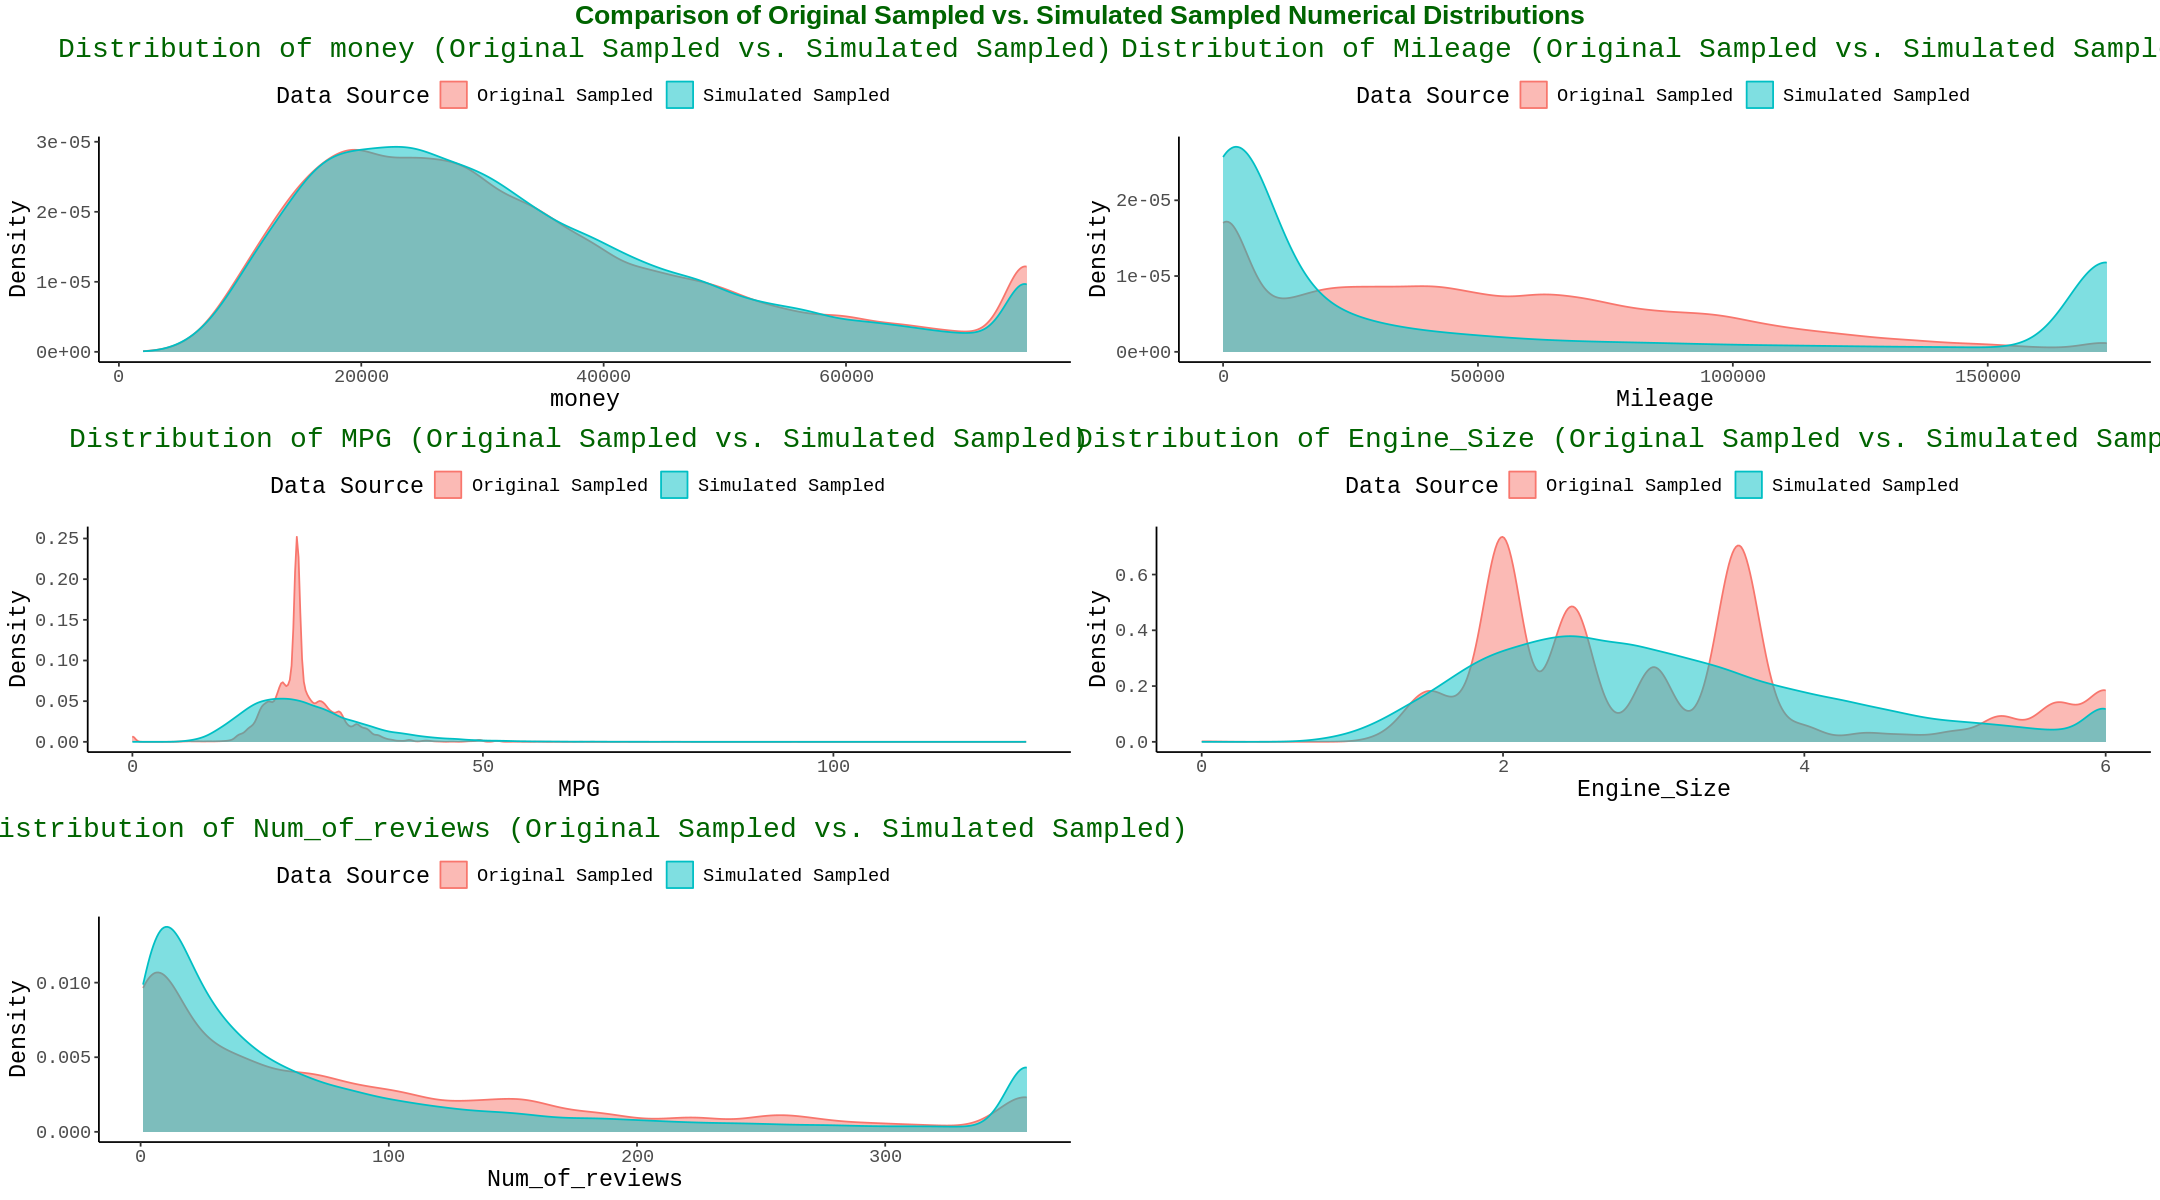

In [ ]:
if (!exists("theme_nito")) {
  theme_nito = theme(plot.title = element_text(hjust = 0.5, color = "blue"),
      text = element_text(family = "sans", size = 14),
      rect = element_blank(),
      panel.grid = element_blank(),
      axis.line = element_line(color = "black"))
}

key_cols_for_comparison_sampled = c('money', 'Mileage', 'MPG', 'Engine_Size', 'Num_of_reviews')

plot_list_sampled = list()

for (col_name in key_cols_for_comparison_sampled) {
  # Create a combined dataframe for plotting
  df_combined_sampled = data.frame(
    value = c(Car_df_sampled[[col_name]], Sim_Newmerc_Sampled[[col_name]]),
    source = factor(c(rep("Original Sampled", nrow(Car_df_sampled)), rep("Simulated Sampled", nrow(Sim_Newmerc_Sampled))))
  )

  # Generate density plot
  p_sampled = ggplot(df_combined_sampled, aes(x = value, fill = source, color = source)) +
    geom_density(alpha = 0.5) +
    labs(
      title = paste("Distribution of", col_name, "(Original Sampled vs. Simulated Sampled)"),
      x = col_name,
      y = "Density",
      fill = "Data Source",
      color = "Data Source"
    ) +
    theme_nito +
    theme(legend.position = "top")

  plot_list_sampled[[col_name]] = p_sampled
}

# Arrange plots in a grid
grid.arrange(grobs = plot_list_sampled, ncol = 2,
             top = textGrob("Comparison of Original Sampled vs. Simulated Sampled Numerical Distributions",
                            gp = gpar(fontsize = 16, col = "darkgreen", fontface = "bold")))

## Categorical simulation

In [ ]:
categorical_cols_for_simulation_sampled = c('new&used', 'Drivetrain', 'brand', 'Fuel_type', 'Transmission', 'Cylinder_Configuration')

Simulated_Categorical_Data_Sampled = data.frame(row.names = 1:nrow(Car_df_sampled))

for (col_name in categorical_cols_for_simulation_sampled) {
  cat(sprintf("\n--- Analysis and Simulation for: %s (Sampled Data) ---\n", col_name))

  # 1. Analyze Original Sampled Distribution (Frequency Table)
  cat("Original Sampled Frequency Table:\n")
  original_table_sampled = table(Car_df_sampled[[col_name]])
  print(original_table_sampled)
  cat("\nOriginal Sampled Proportion Table:\n")
  original_prop_table_sampled = prop.table(original_table_sampled)
  print(original_prop_table_sampled)

  # 2. Simulate New Data based on proportions from sampled data
  set.seed(42) # For reproducibility of simulation
  simulated_values_sampled = sample(
    x = names(original_prop_table_sampled),
    size = nrow(Car_df_sampled),
    replace = TRUE,
    prob = original_prop_table_sampled
  )
  Simulated_Categorical_Data_Sampled[[col_name]] = simulated_values_sampled

  # 3. Analyze Simulated Distribution (Frequency Table)
  cat("\nSimulated Sampled Frequency Table:\n")
  simulated_table_sampled = table(Simulated_Categorical_Data_Sampled[[col_name]])
  print(simulated_table_sampled)
  cat("\nSimulated Sampled Proportion Table:\n")
  simulated_prop_table_sampled = prop.table(simulated_table_sampled)
  print(simulated_prop_table_sampled)
  cat("\n") # Add a newline for better separation between columns
}

cat("\n--- First few rows of the complete Simulated_Categorical_Data_Sampled DataFrame ---\n")
print(head(Simulated_Categorical_Data_Sampled))

cat("\n--- Structure of the complete Simulated_Categorical_Data_Sampled DataFrame ---\n")
str(Simulated_Categorical_Data_Sampled)


--- Analysis and Simulation for: new&used (Sampled Data) ---
Original Sampled Frequency Table:

  New  Used 
 8277 41723 

Original Sampled Proportion Table:

    New    Used 
0.16554 0.83446 

Simulated Sampled Frequency Table:

  New  Used 
 8432 41568 

Simulated Sampled Proportion Table:

    New    Used 
0.16864 0.83136 


--- Analysis and Simulation for: Drivetrain (Sampled Data) ---
Original Sampled Frequency Table:

  4Wd   Awd   Fwd   Rwd 
10775 17903 15438  5884 

Original Sampled Proportion Table:

    4Wd     Awd     Fwd     Rwd 
0.21550 0.35806 0.30876 0.11768 

Simulated Sampled Frequency Table:

  4Wd   Awd   Fwd   Rwd 
10746 17820 15397  6037 

Simulated Sampled Proportion Table:

    4Wd     Awd     Fwd     Rwd 
0.21492 0.35640 0.30794 0.12074 


--- Analysis and Simulation for: brand (Sampled Data) ---
Original Sampled Frequency Table:

        Acura          Audi           BMW         Buick      Cadillac 
         1011          1744          2304          1529      

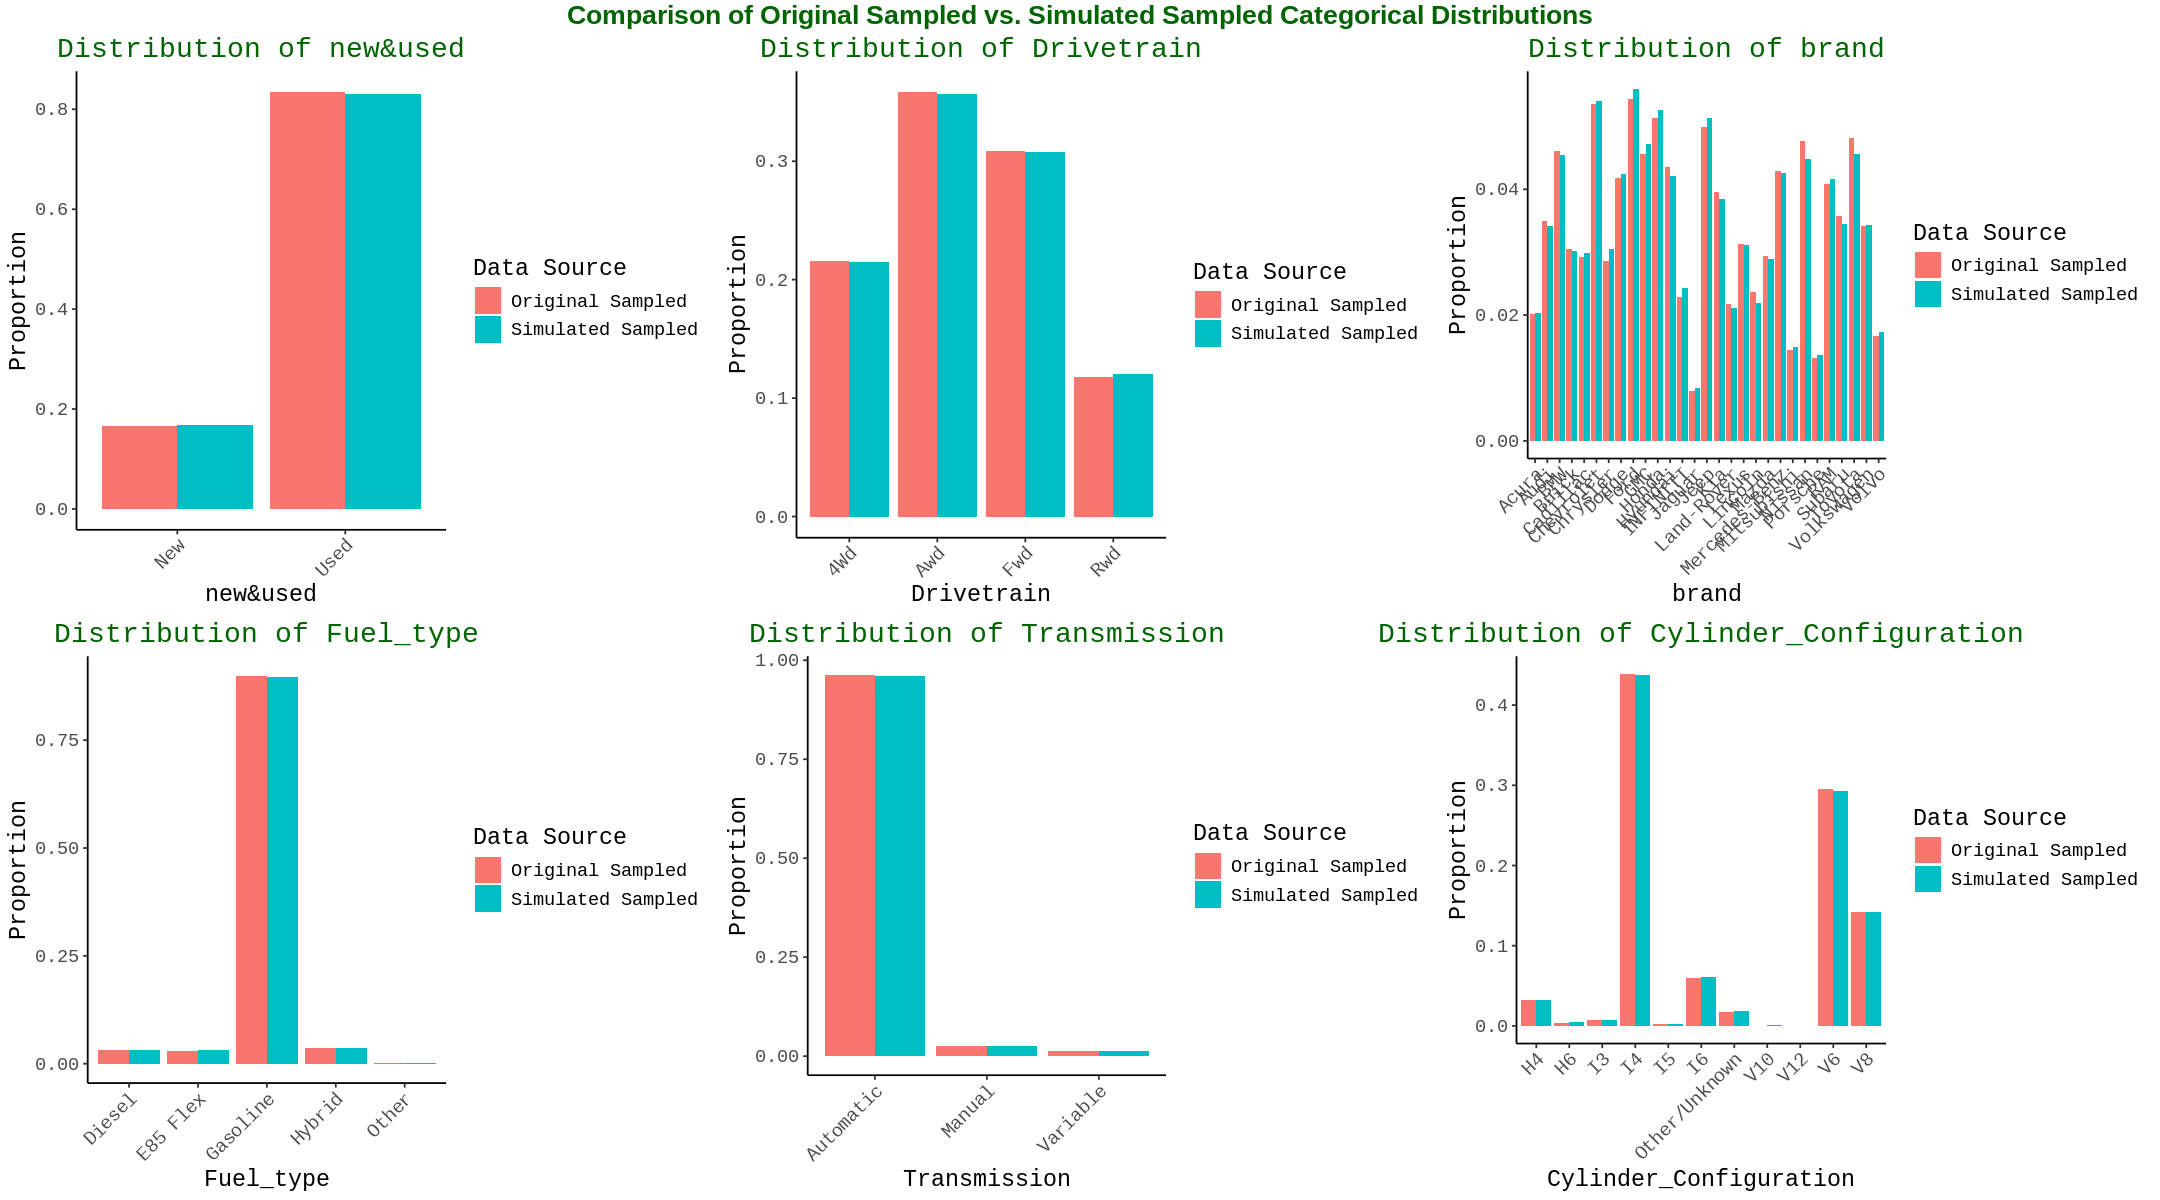

In [ ]:
if (!exists("theme_nito")) {
  theme_nito = theme(plot.title = element_text(hjust = 0.5, color = "blue"),
      text = element_text(family = "sans", size = 14),
      rect = element_blank(),
      panel.grid = element_blank(),
      axis.line = element_line(color = "black"))
}

categorical_cols_for_comparison_sampled = c('new&used', 'Drivetrain', 'brand', 'Fuel_type', 'Transmission', 'Cylinder_Configuration')

plot_list_sampled_categorical = list()

for (col_name in categorical_cols_for_comparison_sampled) {
  # Create combined dataframe for plotting
  df_combined_sampled_cat = bind_rows(
    Car_df_sampled %>% select(!!sym(col_name)) %>% mutate(source = "Original Sampled"),
    Simulated_Categorical_Data_Sampled %>% select(!!sym(col_name)) %>% mutate(source = "Simulated Sampled")
  ) %>%
  # Ensure the category column is a factor for consistent plotting
  mutate(!!sym(col_name) := as.factor(!!sym(col_name)))

  # Calculate proportions
  df_proportions_sampled_cat = df_combined_sampled_cat %>%
    group_by(source, !!sym(col_name)) %>%
    summarise(count = n(), .groups = 'drop') %>%
    group_by(source) %>%
    mutate(proportion = count / sum(count))

  # Generate bar plot
  p_sampled_cat = ggplot(df_proportions_sampled_cat, aes(x = !!sym(col_name), y = proportion, fill = source)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(
      title = paste("Distribution of", col_name),
      x = col_name,
      y = "Proportion",
      fill = "Data Source"
    ) +
    theme_nito +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

  plot_list_sampled_categorical[[col_name]] = p_sampled_cat
}

# Arrange plots in a grid
num_plots_cat = length(plot_list_sampled_categorical)
num_cols_cat = min(3, ceiling(num_plots_cat / 2)) # Max 3 columns

grid.arrange(grobs = plot_list_sampled_categorical, ncol = num_cols_cat,
             top = textGrob("Comparison of Original Sampled vs. Simulated Sampled Categorical Distributions",
                            gp = gpar(fontsize = 16, col = "darkgreen", fontface = "bold")))

In [ ]:
Simulated_Data_Sampled = cbind(Sim_Newmerc_Sampled, Simulated_Categorical_Data_Sampled)

cat("\n--- First few rows of the complete Simulated_Data_Sampled DataFrame ---\n")
print(head(Simulated_Data_Sampled))

cat("\n--- Structure of the complete Simulated_Data_Sampled DataFrame ---\n")
str(Simulated_Data_Sampled)


--- First few rows of the complete Simulated_Data_Sampled DataFrame ---
     money    Mileage Year      MPG Num_of_reviews General_rate Comfort
1 59187.05 65592.5988 2017 25.05950             17          4.2     5.0
2 21308.97   121.2019 2019 16.59309              5          4.5     4.8
3 34771.70 17304.2292 2013 13.06816            186          4.7     4.2
4 40091.34 13941.7402 2016 29.23238             98          4.5     4.4
5 35534.92  2767.6692 2018 41.58238             37          4.5     4.7
6 27143.78 10358.9283 2021 30.89017            116          4.7     5.0
  Interior.design Performance Value.for.the.money Exterior.styling Reliability
1             4.8         4.6                 4.8              4.7         4.7
2             4.2         4.7                 4.3              4.9         4.4
3             4.5         4.5                 4.5              4.8         4.1
4             4.4         4.7                 5.0              4.8         4.6
5             4.9         4.